In [1]:
setwd("./deseq_objects2")
list.files()

[1] "Astrocyte_deseq.rds"            "Astrocyte_top20.rds"           
 [3] "Chondrocytes_deseq.rds"         "Chondrocytes_top20.rds"        
 [5] "Epithelial_cells_deseq.rds"     "Epithelial_cells_top20.rds"    
 [7] "Erythroblast_deseq.rds"         "Erythroblast_top20.rds"        
 [9] "Neuroepithelial_cell_deseq.rds" "Neuroepithelial_cell_top20.rds"
[11] "Neurons_deseq.rds"              "Neurons_top20.rds"             
[13] "T_cell_deseq.rds"               "T_cell_top20.rds"              
[15] "Tissue_stem_cells_deseq.rds"    "Tissue_stem_cells_top20.rds"   
[17] "iPS_cells_deseq.rds"            "iPS_cells_top20.rds"           
[19] "res_astrocytes.rds"             "res_chondrocytes.rds"          
[21] "res_epithelial.rds"             "res_erythroblast.rds"          
[23] "res_ips.rds"                    "res_neuroepithelial.rds"       
[25] "res_neurons.rds"                "res_tissue.rds"

In [1]:
library(dplyr)
library(tibble)
library(tidyr)
library(Matrix)
library(readr)

library(Seurat)
library(SingleCellExperiment)
library(SingleR)
library(celldex)

library(gridExtra)
library(ggplot2)
library(cowplot)

library(DESeq2)
library(Matrix.utils)
library(magrittr)
library(pheatmap)

library(hexbin)
library(vsn)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Attaching SeuratObject

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,

In [2]:
set.seed(1)

## Differential Expression Analysis

### Tissue stem cells

In [4]:
Tissue_stem_cells <- readRDS(file = "Tissue_stem_cells_deseq.rds")
Tissue_stem_cells

res_tissue <- results(Tissue_stem_cells)
saveRDS(file = "res_tissue.rds")
head(res_tissue)

class: DESeqDataSet 
dim: 25072 1055 
metadata(1): version
assays(4): counts mu H cooks
rownames(25072): AL627309.1 AL669831.5 ... LINC02573 BX004987.1
rowData names(31): baseMean baseVar ... deviance maxCooks
colnames(1055): AAGTCGTTCTCCATAT-1_1 ACGGTTAAGGTCGACA-1_1 ...
  TTTCAGTCACATAGCT-1_7 TTTCCTCTCCTTATCA-1_7
colData names(11): orig.ident nCount_RNA ... cluster_id sizeFactor

log2 fold change (MLE): orig.ident pgp1 4 vs h1 1 
LRT p-value: '~ orig.ident' vs '~ 1' 
DataFrame with 6 rows and 6 columns
            baseMean log2FoldChange     lfcSE        stat    pvalue      padj
           <numeric>      <numeric> <numeric>   <numeric> <numeric> <numeric>
AL627309.1   1.00317    9.75034e-06  0.265612 7.11199e-05  1.000000        NA
AL669831.5   1.02504   -2.93838e-02  0.261983 4.70922e-01  0.998175        NA
FAM87B       1.00317    9.75034e-06  0.265612 7.11199e-05  1.000000        NA
LINC00115    1.00888    4.58245e-03  0.265574 5.07007e-02  0.999997        NA
FAM41C       1.00888    4.58249e-03  0.265574 5.00910e-02  0.999997        NA
AL645608.7   1.00317    9.75034e-06  0.265612 7.11199e-05  1.000000        NA

In [5]:
#Up and Down regulated genes
cat("Up-regulated Genes:")
row.names(res_tissue)[which(!is.na(res_tissue$log2FoldChange) & res_tissue$log2FoldChange > 1.0 & res_tissue$padj < 0.05)] 
cat("Down-regulated Genes:")
row.names(res_tissue)[which(!is.na(res_tissue$log2FoldChange) & res_tissue$log2FoldChange < -1.0 & res_tissue$pvalue < 0.05)]

# If you want to exctract them (replace x)
# write.table(x, file, append = FALSE, sep = " ", dec = ".", row.names = TRUE, col.names = TRUE)

Up-regulated Genes:

[1] "JUN"      "S100A10"  "S100A4"   "ATP1B1"   "FRZB"     "COL3A1"  
 [7] "COL5A2"   "FN1"      "SERPINE2" "COL6A3"   "SPON2"    "IGFBP7"  
[13] "VCAN"     "LOX"      "TGFBI"    "SPARC"    "PLAGL1"   "IGFBP3"  
[19] "COL1A2"   "PCOLCE"   "MEST"     "CALD1"    "CD99"     "EGFL6"   
[25] "TIMP1"    "BGN"      "CTHRC1"   "COL15A1"  "COL5A1"   "IFITM3"  
[31] "KCNQ1OT1" "AHNAK"    "NEAT1"    "SERPINH1" "TAGLN"    "PLAC9"   
[37] "ACTA2"    "CCND2"    "MGP"      "KRT18"    "LUM"      "DCN"     
[43] "CKAP4"    "POSTN"    "COL4A1"   "COL4A2"   "DLK1"     "CDH11"   
[49] "MFAP4"    "WSB1"     "COL1A1"   "P4HB"     "RRBP1"    "MYL9"    
[55] "HSPB6"    "FOSB"     "RPL13A"   "TIMP3"    "LGALS1"   "FBLN1"   
[61] "COL6A1"   "COL6A2"

Down-regulated Genes:

[1] "STMN1"      "PRDX1"      "UQCRH"      "PRDX6"      "TNNI1"     
 [6] "ACTA1"      "DBI"        "KLHL41"     "TTN"        "MYL1"      
[11] "IGFBP2"     "PTMA"       "TNNC1"      "H2AFZ"      "HSPB3"     
[16] "PRL"        "NDUFA4"     "CHCHD2"     "TPM2"       "TNNI2"     
[21] "TNNT3"      "PPP1R14B"   "LDHB"       "TUBA1A"     "MYL6B"     
[26] "TAC3"       "COX6A1"     "RAN"        "CKB"        "ACTC1"     
[31] "MYLPF"      "MYH3"       "MYL4"       "JPT1"       "NNAT"      
[36] "TNNC2"      "EMC10"      "AC020909.2" "RPS4Y1"

In [6]:
ntd_tissue <- normTransform(Tissue_stem_cells)
vsd_tissue <- varianceStabilizingTransformation(Tissue_stem_cells)
#head(assay(vsd_tissue), 3)

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.



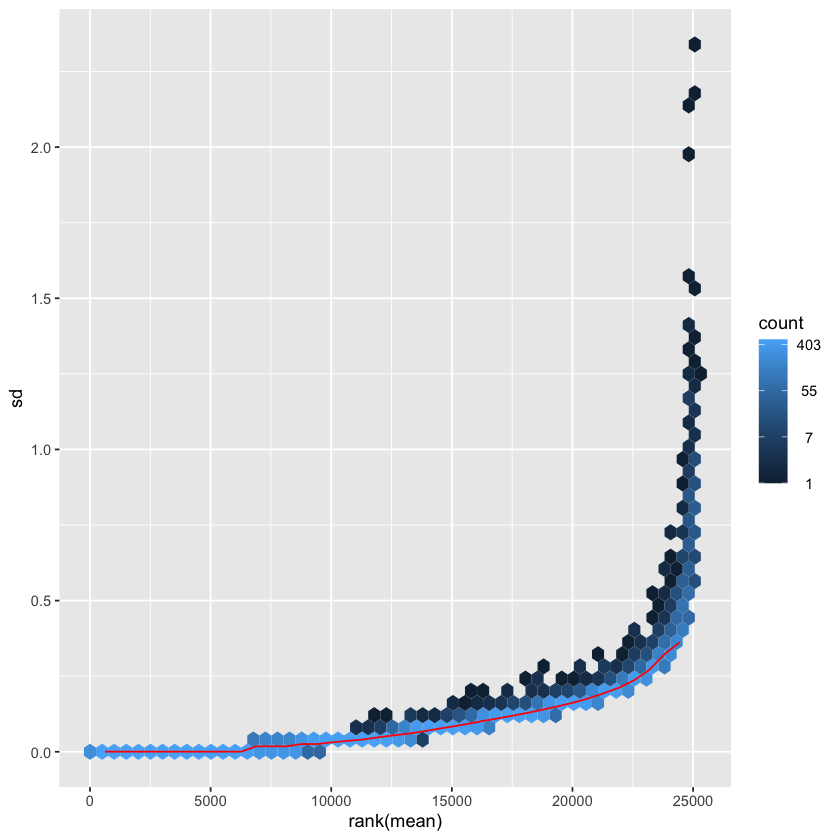

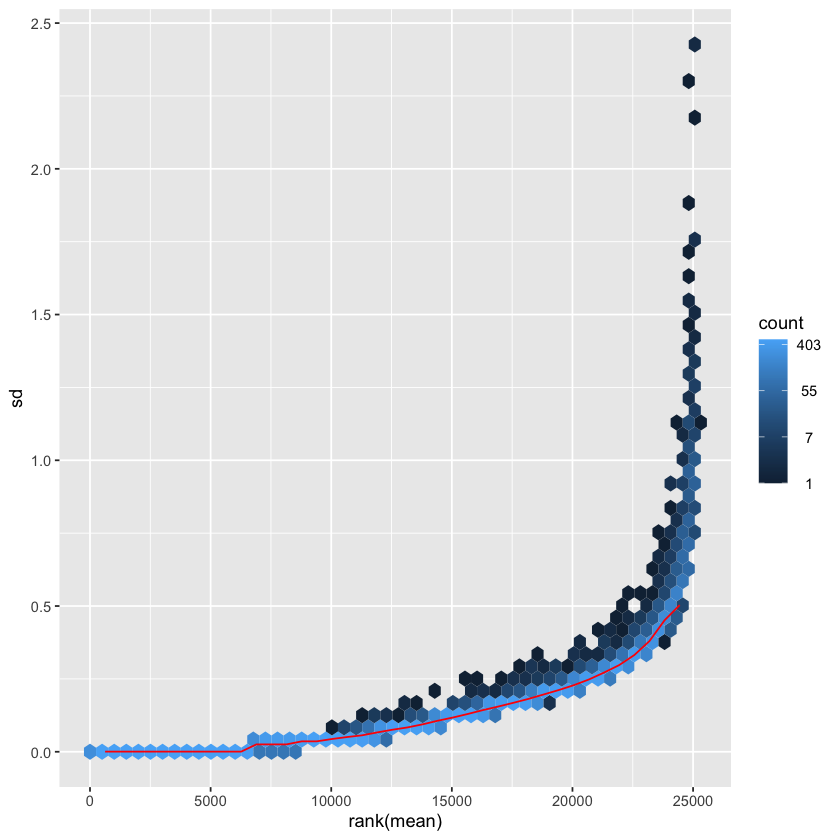

In [7]:
#Couldn't put them side by side (grid.arrange and par did not work I guess because they are not ggplot)
options(repr.plot.width = 7, repr.plot.height = 7)
meanSdPlot(assay(ntd_tissue))
meanSdPlot(assay(vsd_tissue))

In [8]:
#options(repr.plot.width=9, repr.plot.height=8)
#plotMA(res_tissue, ylim=c(-2,2), main = "Tissue Stem Cells")

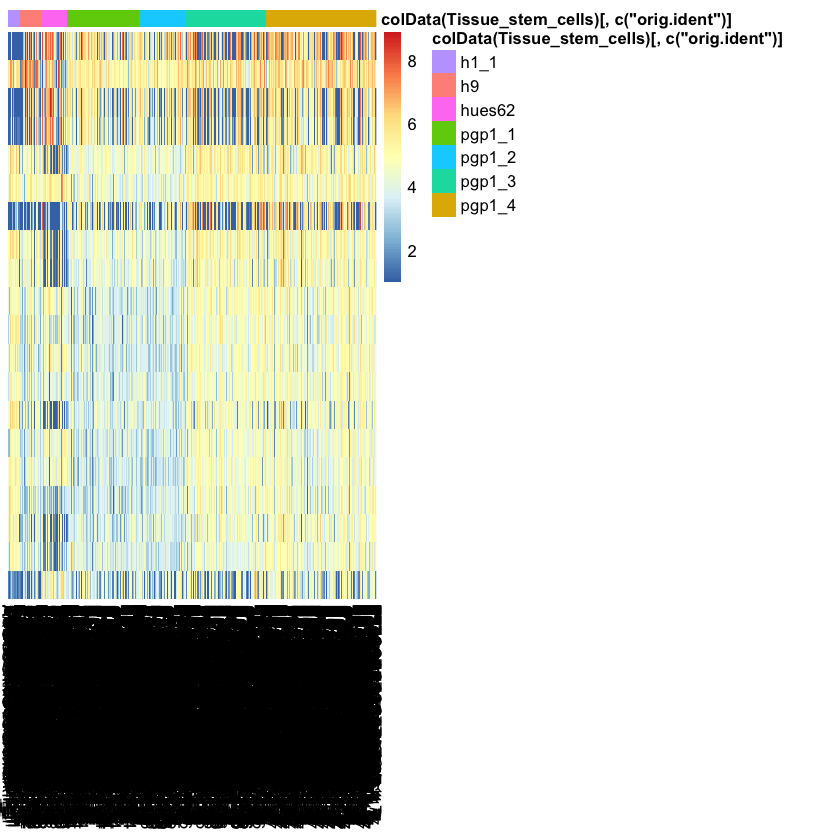

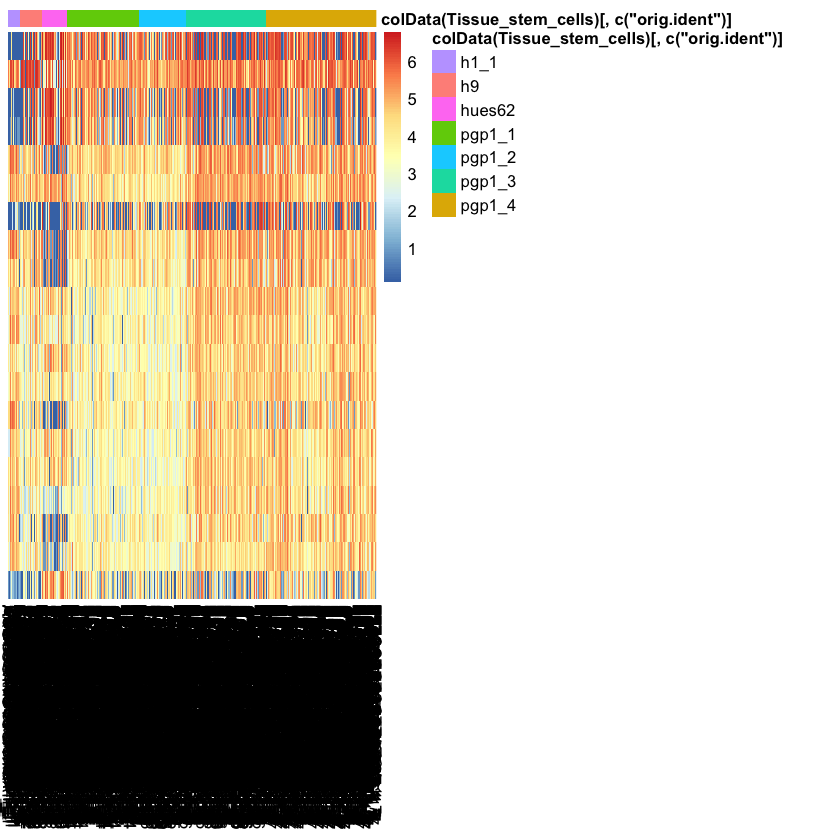

In [9]:
select_1 <- order(rowMeans(counts(Tissue_stem_cells,normalized=TRUE)), decreasing=TRUE)[1:20]
df_1 <- as.data.frame(colData(Tissue_stem_cells)[,c("orig.ident")])
row.names(df_1) <- colnames(ntd_tissue)

pheatmap(assay(ntd_tissue)[select_1,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df_1)

pheatmap(assay(vsd_tissue)[select_1,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df_1)

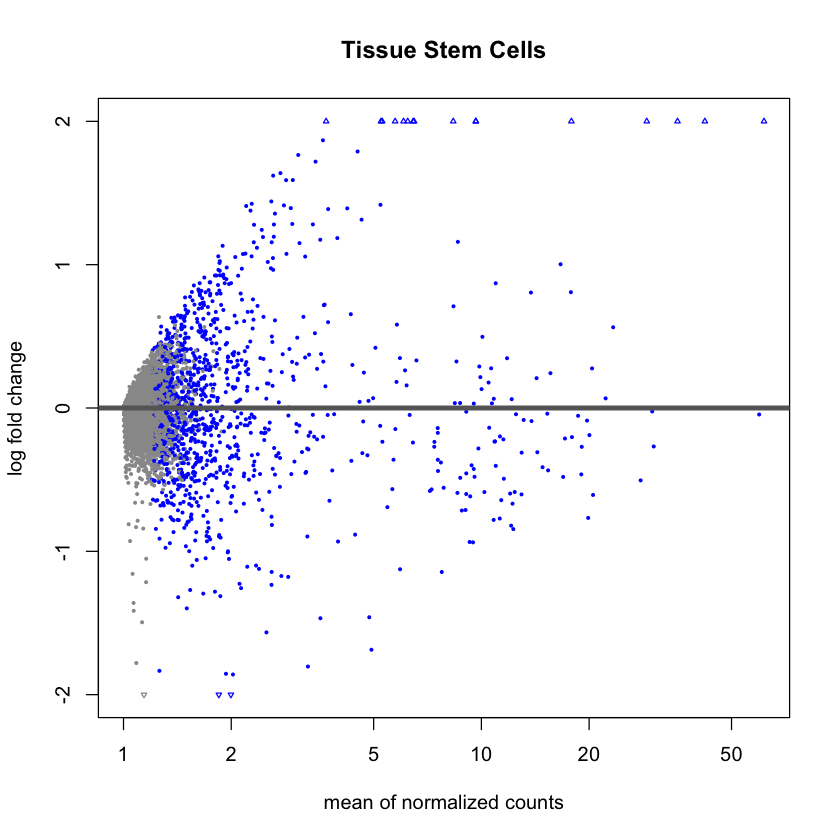

In [20]:
plotMA(res_tissue, ylim = c(-2,2), main = "Tissue Stem Cells")

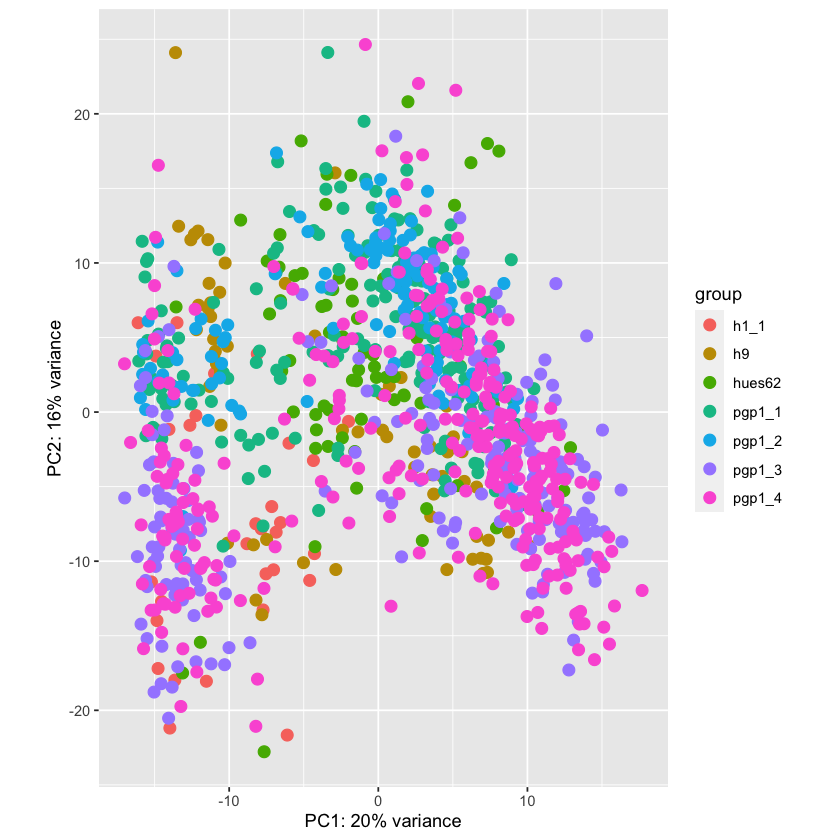

In [21]:
plotPCA(vsd_tissue, intgroup=c("orig.ident"))

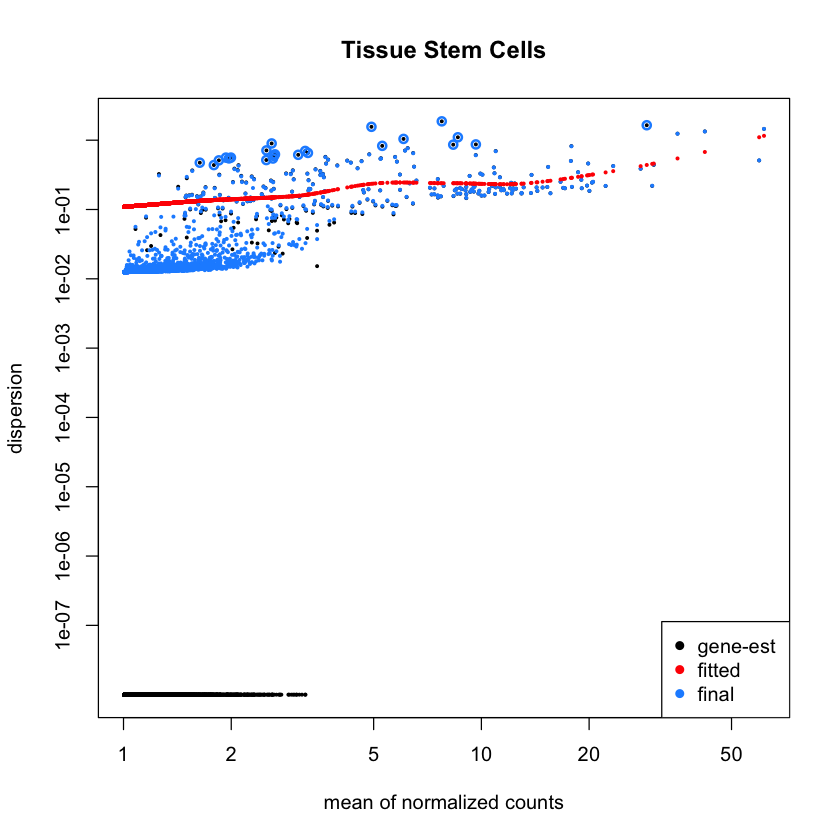

In [22]:
plotDispEsts(Tissue_stem_cells, main = "Tissue Stem Cells")

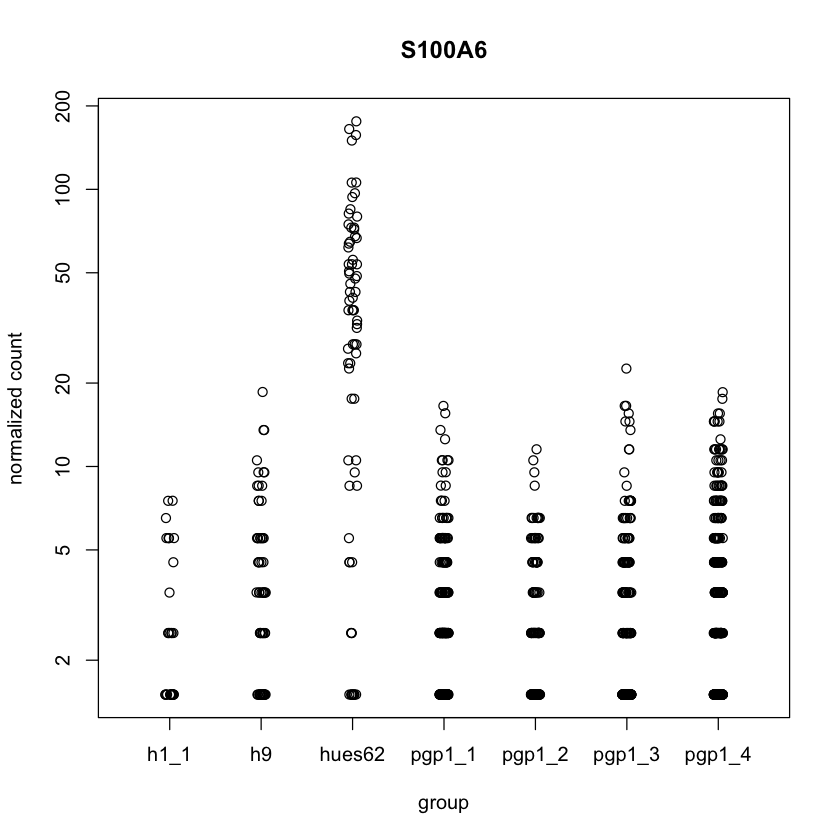

In [23]:
plotCounts(Tissue_stem_cells, gene=which.min(res_tissue$padj), intgroup="orig.ident")

### Astrocytes

In [11]:
Astrocytes <- readRDS(file = "Astrocyte_deseq.rds")
Astrocytes

res_astrocytes <- results(Astrocytes)
saveRDS(file = "res_astrocytes.rds")
head(res_astrocytes)

class: DESeqDataSet 
dim: 25072 1994 
metadata(1): version
assays(4): counts mu H cooks
rownames(25072): AL627309.1 AL669831.5 ... LINC02573 BX004987.1
rowData names(31): baseMean baseVar ... deviance maxCooks
colnames(1994): AAACGAACAACATACC-1_1 AAACGCTGTGACACGA-1_1 ...
  TTTGGTTTCGTGGCTG-1_7 TTTGTTGGTGTACATC-1_7
colData names(11): orig.ident nCount_RNA ... cluster_id sizeFactor

log2 fold change (MLE): orig.ident pgp1 4 vs h1 1 
LRT p-value: '~ orig.ident' vs '~ 1' 
DataFrame with 6 rows and 6 columns
            baseMean log2FoldChange     lfcSE        stat    pvalue      padj
           <numeric>      <numeric> <numeric>   <numeric> <numeric> <numeric>
AL627309.1   1.00323   -0.000593347  0.145178 0.000122261  1.000000        NA
AL669831.5   1.01782    0.010828304  0.143905 0.138564220  0.999947         1
FAM87B       1.00374   -0.001673608  0.145173 0.000669452  1.000000        NA
LINC00115    1.00927    0.005158527  0.144537 0.021021506  1.000000        NA
FAM41C       1.00675    0.008387156  0.144550 0.009745187  1.000000        NA
AL645608.7   1.00424   -0.002753070  0.145169 0.001705878  1.000000        NA

In [12]:
#Up and Down regulated genes
cat("Up-regulated Genes:")
row.names(res_astrocytes)[which(!is.na(res_astrocytes$log2FoldChange) & res_astrocytes$log2FoldChange > 1.0 & res_astrocytes$padj < 0.05)] 
cat("Down-regulated Genes:")
row.names(res_astrocytes)[which(!is.na(res_astrocytes$log2FoldChange) & res_astrocytes$log2FoldChange < -1.0 & res_astrocytes$pvalue < 0.05)]

#write.table(x, file, append = FALSE, sep = " ", dec = ".", row.names = TRUE, col.names = TRUE)

Up-regulated Genes:

[1] "NHLH1"    "COL3A1"   "HES6"     "TAGLN3"   "MARCKS"   "PTN"     
 [7] "KCNQ1OT1" "CRABP1"   "COL1A1"   "TTR"      "ID1"      "ELAVL3"  
[13] "FOSB"

Down-regulated Genes:

[1] "ENO1"     "RPL11"    "YBX1"     "UQCRH"    "CRABP2"   "RPS7"    
 [7] "RPS27A"   "HSPD1"    "IGFBP2"   "RPL32"    "RPL14"    "RPL29"   
[13] "RBP1"     "RPL35A"   "UCHL1"    "OCIAD2"   "RPS3A"    "BTF3"    
[19] "RPS23"    "HINT1"    "NPM1"     "RACK1"    "PRL"      "RPS18"   
[25] "RPL10A"   "CHCHD2"   "DLX6-AS1" "DLX5"     "TMSB4X"   "RPS4X"   
[31] "KCNE5"    "RPL8"     "RPL12"    "RPL7A"    "RPS13"    "LDHA"    
[37] "FTH1"     "PPP1R14B" "GSTP1"    "RPS3"     "PPA1"     "RPS24"   
[43] "GAPDH"    "LDHB"     "RPL41"    "MYL6"     "TAC3"     "ATP2B1"  
[49] "SLC25A3"  "RPL6"     "PEBP1"    "RPL36AL"  "SIX6"     "DLK1"    
[55] "CKB"      "NDN"      "SRP14"    "RPLP1"    "RPS2"     "RPS15A"  
[61] "COX4I1"   "CYBA"     "RPL13"    "C1QBP"    "RPL26"    "RPL23A"  
[67] "RPL19"    "ACTG1"    "NNAT"     "GNAS"     "ATP5F1E"  "EDN3"    
[73] "PRDX2"    "RPS19"    "RPL18"    "FTL"      "RPS9"     "RPS5"    
[79] "RPS4Y1"   "RPL3"

In [13]:
ntd_astrocytes <- normTransform(Astrocytes)
vsd_astrocytes <- varianceStabilizingTransformation(Astrocytes)

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.



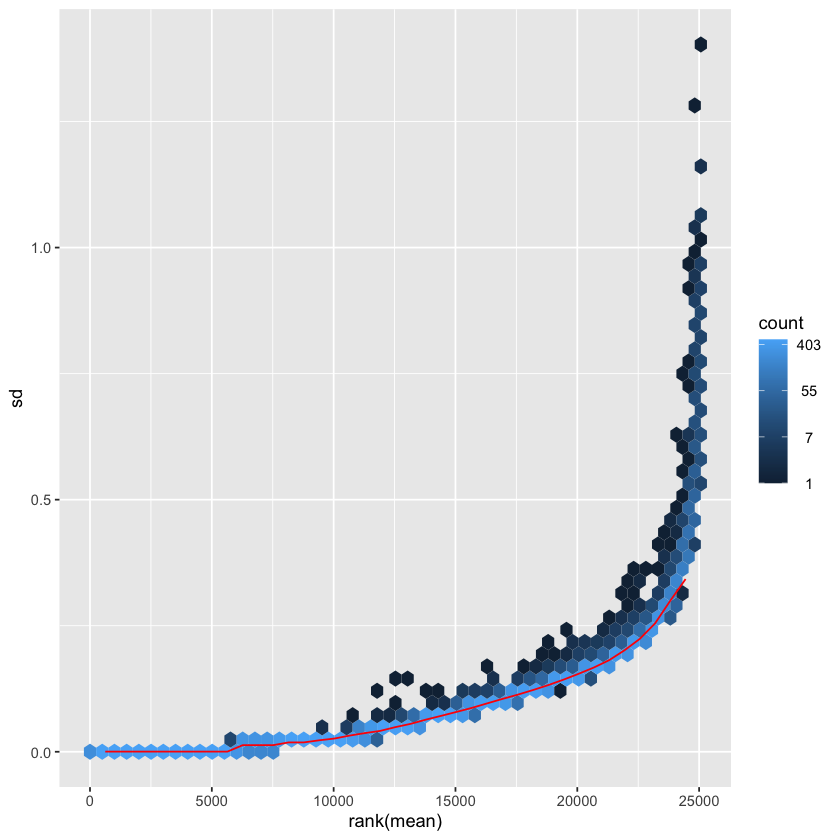

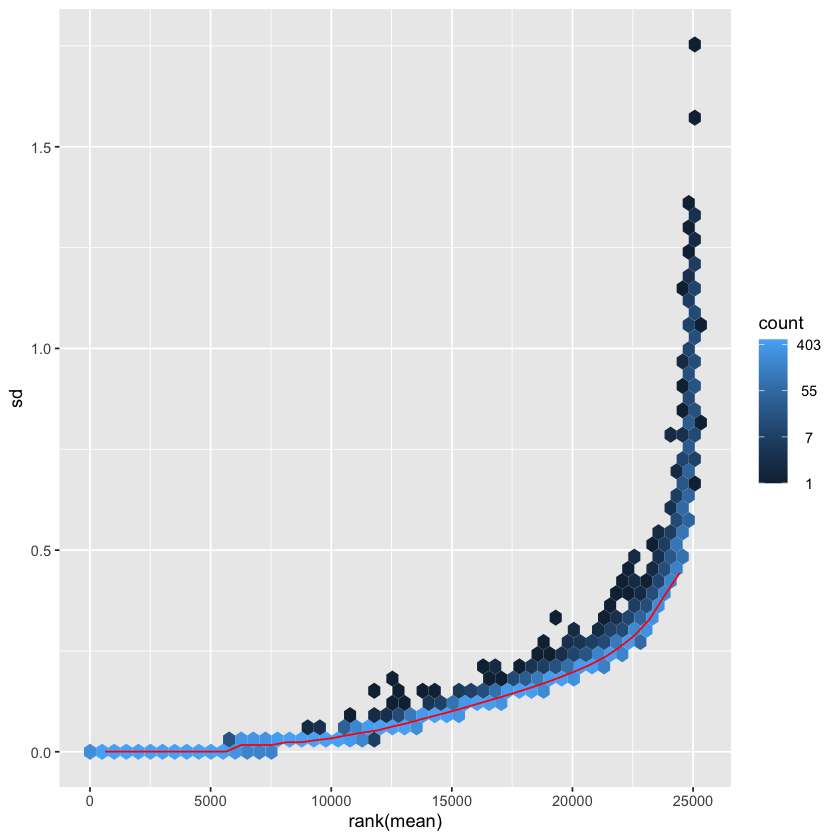

In [14]:
options(repr.plot.width = 7, repr.plot.height = 7)
meanSdPlot(assay(ntd_astrocytes))
meanSdPlot(assay(vsd_astrocytes))

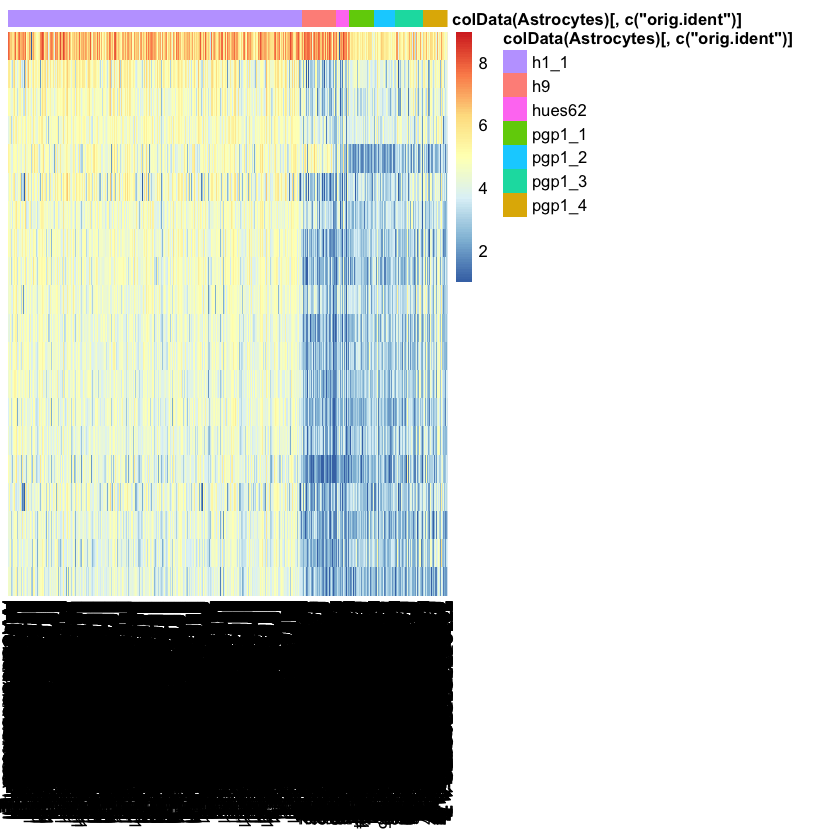

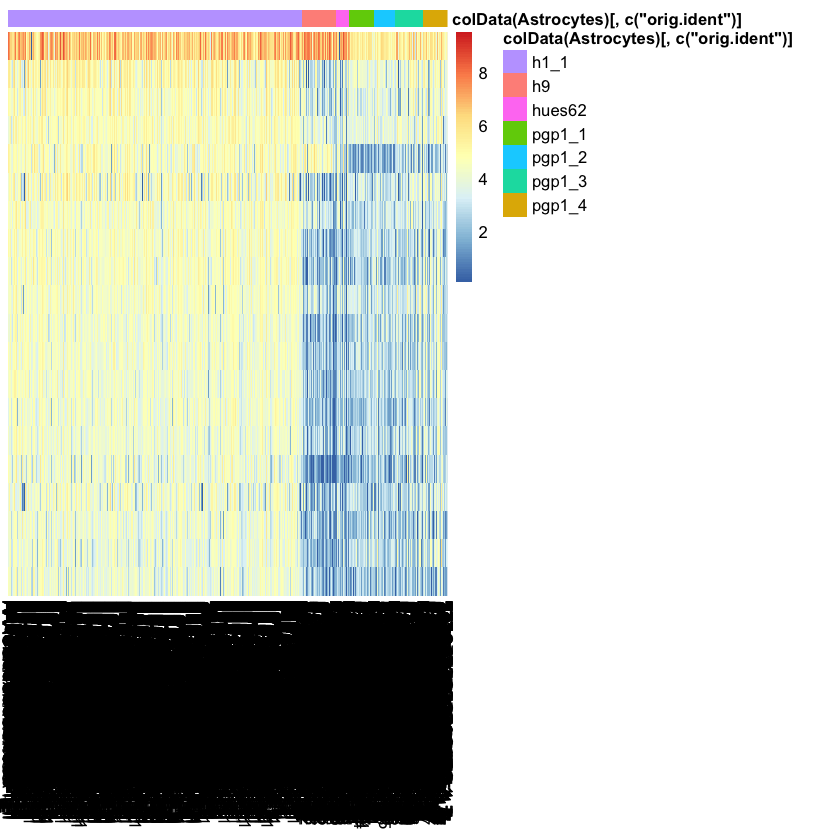

In [15]:
select_2 <- order(rowMeans(counts(Astrocytes,normalized=TRUE)), decreasing=TRUE)[1:20]
df_2 <- as.data.frame(colData(Astrocytes)[,c("orig.ident")])
row.names(df_2) <- colnames(ntd_astrocytes)

pheatmap(assay(ntd_astrocytes)[select_2,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df_2)

pheatmap(assay(vsd_astrocytes)[select_2,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df_2)

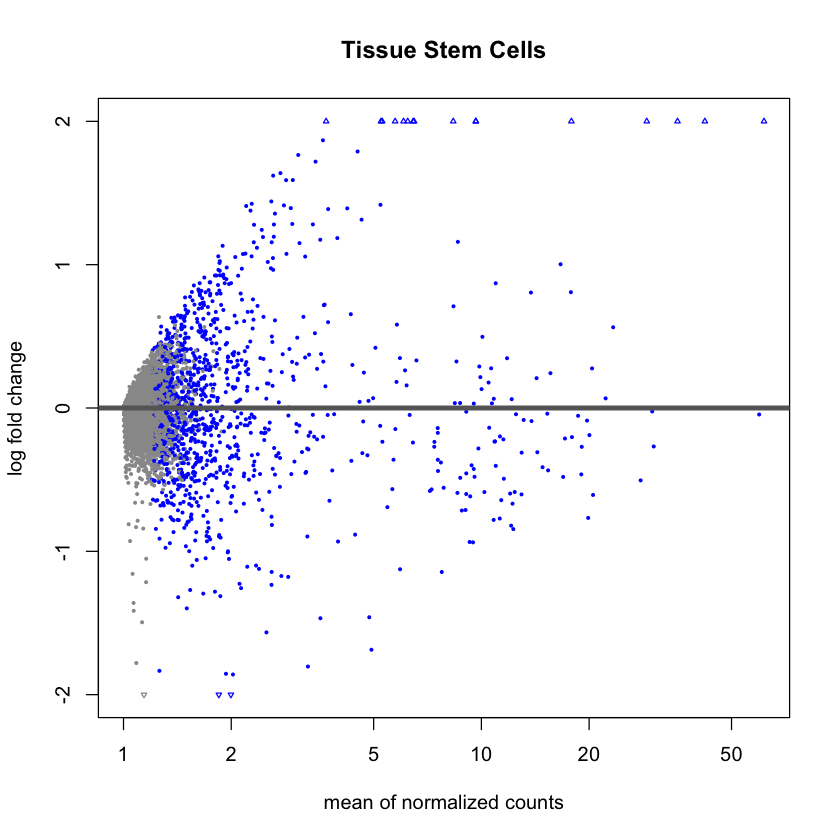

In [26]:
plotMA(res_tissue, ylim = c(-2,2), main = "Tissue Stem Cells")

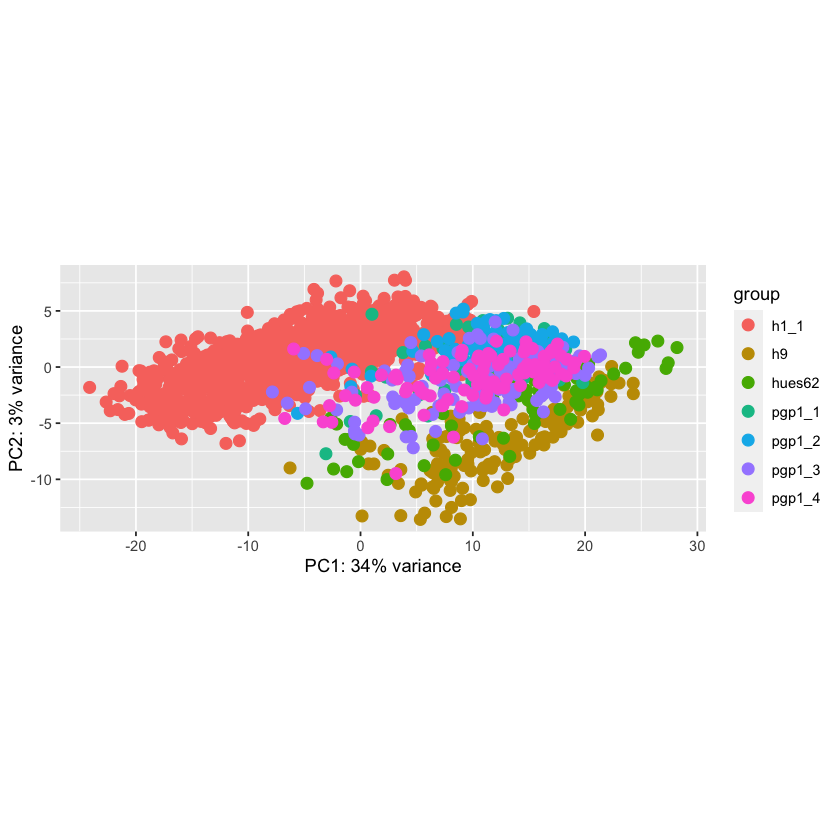

In [27]:
plotPCA(vsd_astrocytes, intgroup=c("orig.ident"))

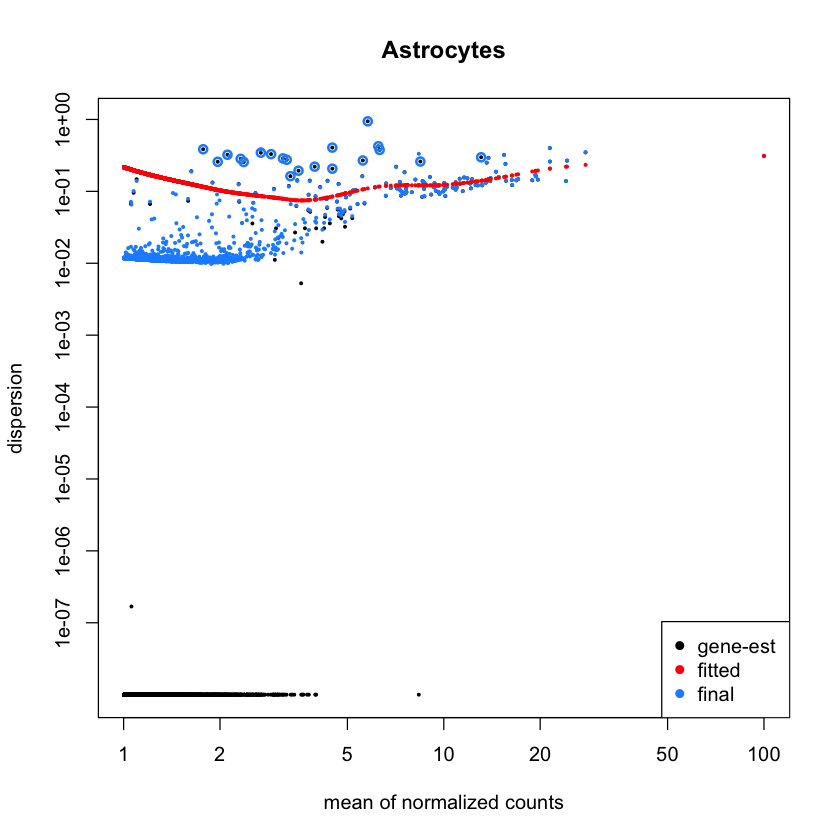

In [28]:
plotDispEsts(Astrocytes, main = "Astrocytes")

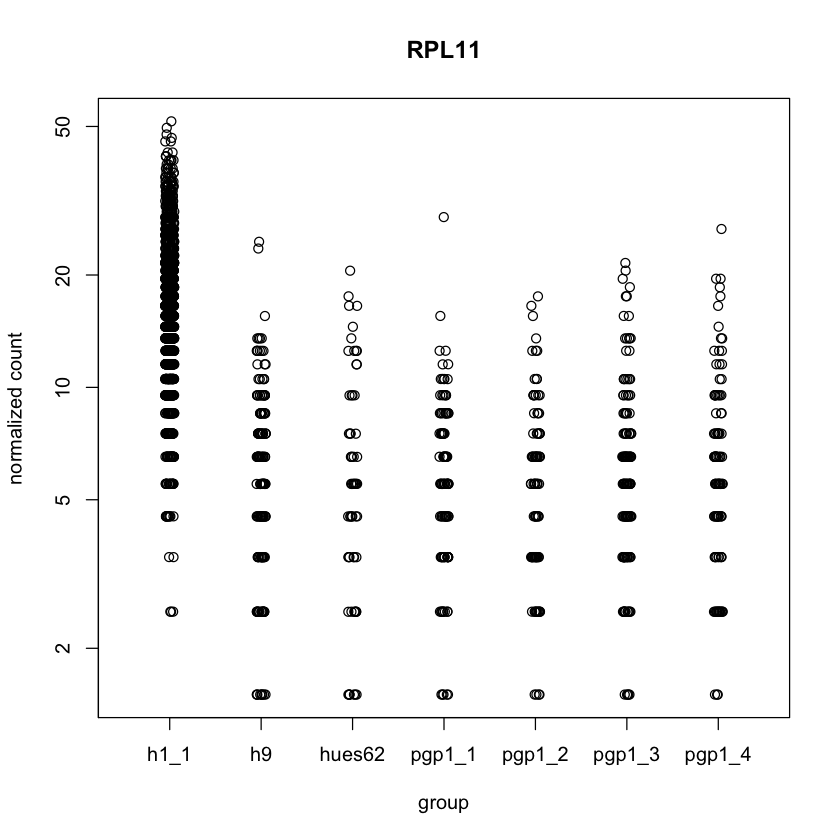

In [29]:
plotCounts(Astrocytes, gene=which.min(res_astrocytes$padj), intgroup="orig.ident")

### Chondrocytes

In [4]:
Chondrocytes <- readRDS(file = "Chondrocytes_deseq.rds")
Chondrocytes

res_chondrocytes <- results(Chondrocytes)
saveRDS(res_chondrocytes, file = "res_chondrocytes.rds")
head(res_chondrocytes)

class: DESeqDataSet 
dim: 25072 7536 
metadata(1): version
assays(4): counts mu H cooks
rownames(25072): AL627309.1 AL669831.5 ... LINC02573 BX004987.1
rowData names(31): baseMean baseVar ... deviance maxCooks
colnames(7536): AAACCCAAGTTAACAG-1_1 AAACGCTGTGTCTTCC-1_1 ...
  TTTGATCTCTAGGCCG-1_7 TTTGGTTTCTTCGATT-1_7
colData names(11): orig.ident nCount_RNA ... cluster_id sizeFactor

log2 fold change (MLE): orig.ident pgp1 4 vs h1 1 
LRT p-value: '~ orig.ident' vs '~ 1' 
DataFrame with 6 rows and 6 columns
            baseMean log2FoldChange     lfcSE        stat    pvalue      padj
           <numeric>      <numeric> <numeric>   <numeric> <numeric> <numeric>
AL627309.1   1.00405     0.00126405 0.0549048 0.002833525  1.000000        NA
AL669831.5   1.02202    -0.00234089 0.0545154 0.265019492  0.999649         1
FAM87B       1.00498    -0.00490923 0.0548353 0.010820245  1.000000        NA
LINC00115    1.00631    -0.00029603 0.0548232 0.007306386  1.000000        NA
FAM41C       1.00578    -0.00529482 0.0548150 0.018293445  1.000000        NA
AL645608.7   1.00351     0.00041765 0.0549113 0.000602676  1.000000        NA

In [7]:
#Up and Down regulated genes
cat("Up-regulated Genes:")
row.names(res_chondrocytes)[which(!is.na(res_chondrocytes$log2FoldChange) & res_chondrocytes$log2FoldChange > 1.0 & res_chondrocytes$padj < 0.05)] 
cat("Down-regulated Genes:")
row.names(res_chondrocytes)[which(!is.na(res_chondrocytes$log2FoldChange) & res_chondrocytes$log2FoldChange < -1.0 & res_chondrocytes$pvalue < 0.05)]

#write.table(x, file, append = FALSE, sep = " ", dec = ".", row.names = TRUE, col.names = TRUE)

Up-regulated Genes:

[1] "JUN"      "S100A11"  "COL3A1"   "COL5A2"   "FN1"      "CCDC80"  
 [7] "SFRP2"    "IRF1"     "SPARC"    "AKAP12"   "IGFBP3"   "COL1A2"  
[13] "PTN"      "ITM2A"    "GPC3"     "SFRP1"    "OGN"      "COL5A1"  
[19] "IFITM3"   "KCNQ1OT1" "CCND2"    "MGP"      "LUM"      "DCN"     
[25] "POSTN"    "FOS"      "CRABP1"   "IGFBP4"   "COL1A1"   "TTR"     
[31] "RRBP1"    "ID1"      "JUNB"     "FOSB"     "LGALS1"   "COL6A1"  
[37] "COL6A2"

Down-regulated Genes:

[1] "ENO1"     "STMN1"    "HMGN2"    "ATP5IF1"  "NDUFS5"   "YBX1"    
 [7] "PRDX1"    "UQCRH"    "H3F3A"    "TOMM20"   "ODC1"     "HSPD1"   
[13] "IGFBP2"   "PTMA"     "RPL29"    "OCIAD2"   "H2AFZ"    "HINT1"   
[19] "NPM1"     "PRL"      "HMGA1"    "CHCHD2"   "DLX6-AS1" "DLX5"    
[25] "TMSB4X"   "PGK1"     "RPL12"    "RPL7A"    "LDHA"     "PPP1R14B"
[31] "GSTP1"    "PPA1"     "DDIT4"    "PGAM1"    "BNIP3"    "GAPDH"   
[37] "LDHB"     "TUBA1A"   "TAC3"     "ATP2B1"   "PEBP1"    "RAN"     
[43] "RPL36AL"  "SIX6"     "CKB"      "SRP14"    "C1QBP"    "JPT1"    
[49] "NNAT"     "PRDX2"    "RPS4Y1"

In [11]:
ntd_chondrocytes <- normTransform(Chondrocytes)
# vsd_chondrocytes <- varianceStabilizingTransformation(Chondrocytes) — Memory issues

ERROR: Error: vector memory exhausted (limit reached?)


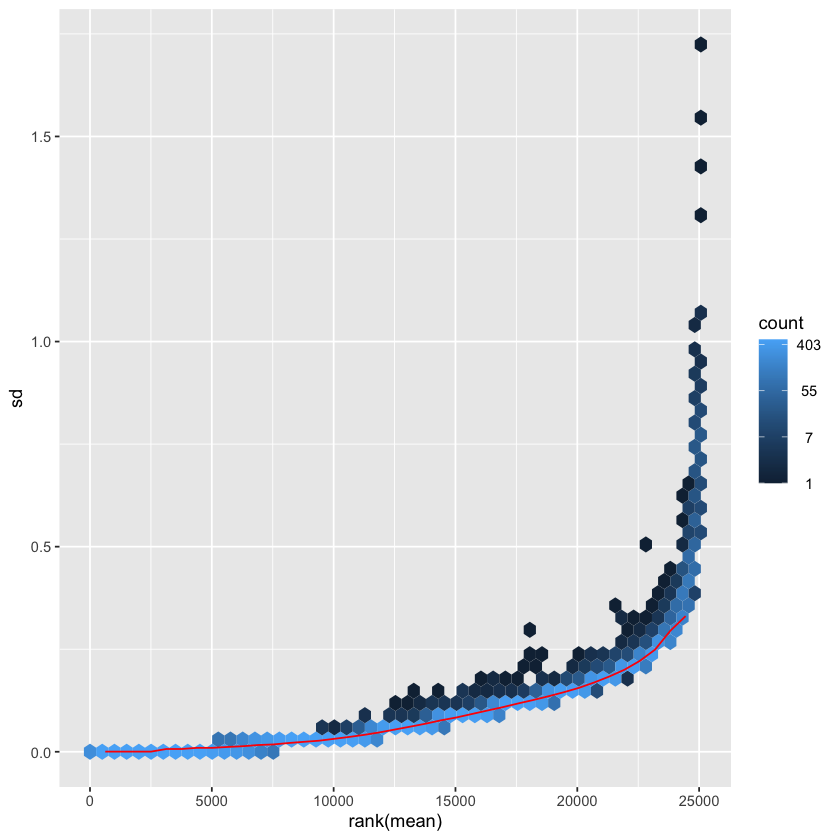

In [12]:
options(repr.plot.width = 7, repr.plot.height = 7)
meanSdPlot(assay(ntd_chondrocytes))
# meanSdPlot(assay(vsd_chondrocytes))

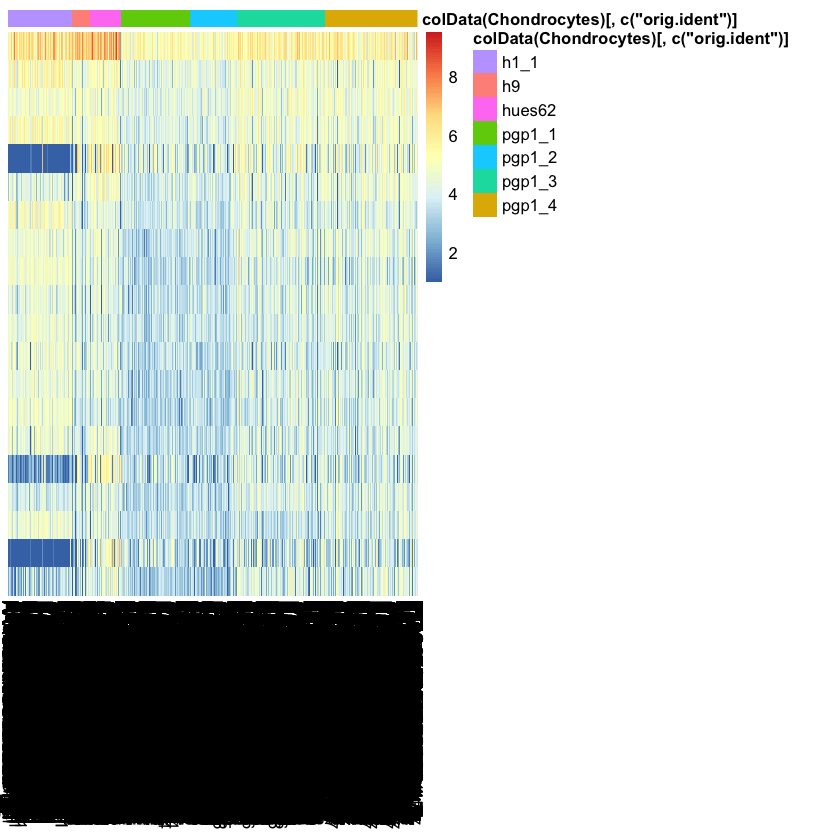

In [13]:
select_3 <- order(rowMeans(counts(Chondrocytes,normalized=TRUE)), decreasing=TRUE)[1:20]
df_3 <- as.data.frame(colData(Chondrocytes)[,c("orig.ident")])
row.names(df_3) <- colnames(ntd_chondrocytes)

pheatmap(assay(ntd_chondrocytes)[select_3,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df_3)

# pheatmap(assay(vsd_chondrocytes)[select_3,], cluster_rows=FALSE, show_rownames=FALSE,cluster_cols=FALSE, annotation_col=df_3)

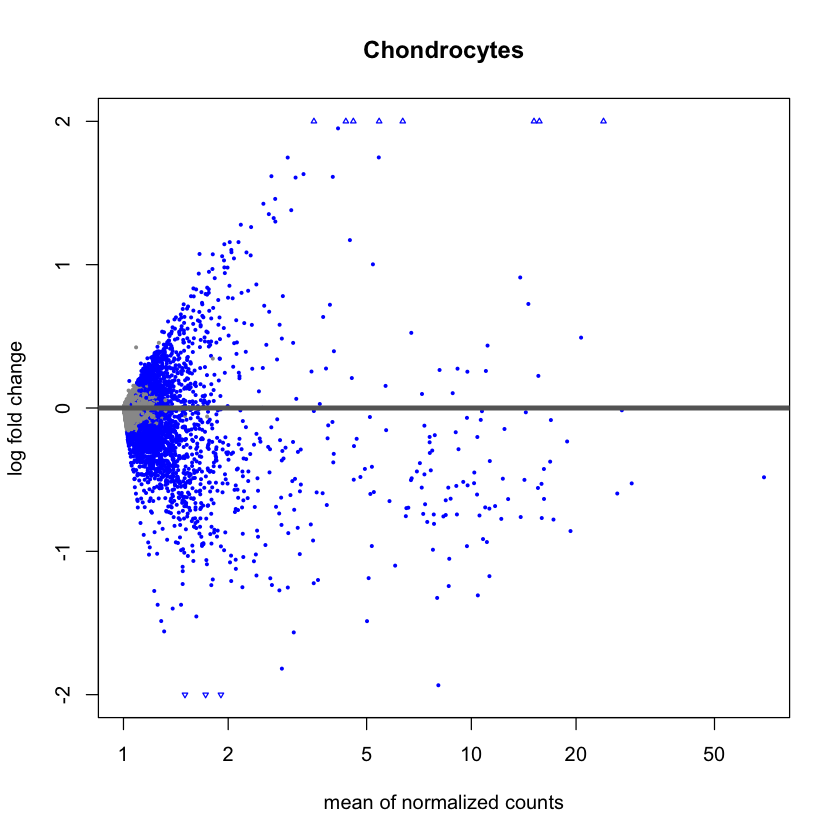

In [14]:
plotMA(res_chondrocytes, ylim = c(-2,2), main = "Chondrocytes")

In [ ]:
# plotPCA(vsd_chondrocytes, intgroup=c("orig.ident"))

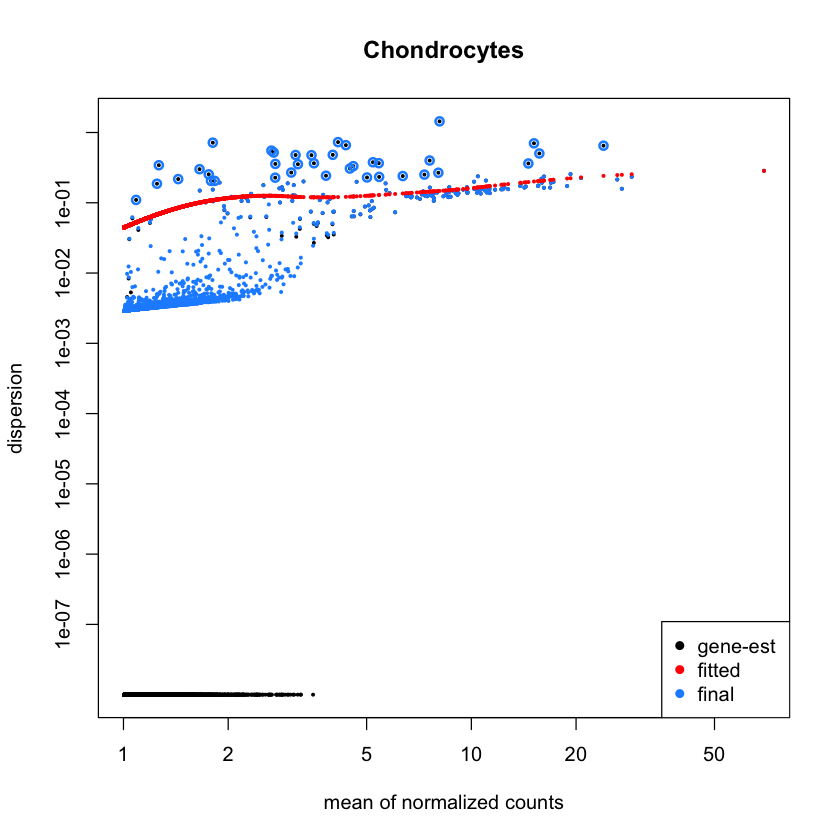

In [15]:
plotDispEsts(Chondrocytes, main = "Chondrocytes")

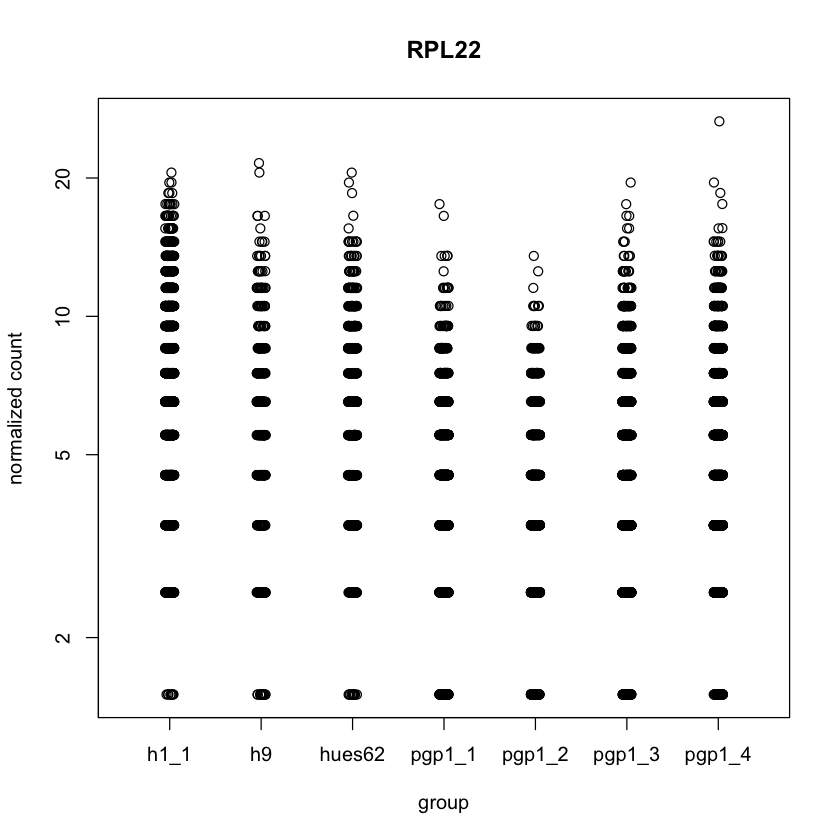

In [16]:
plotCounts(Chondrocytes, gene=which.min(res_chondrocytes$padj), intgroup="orig.ident")

### Epithelial Cells

In [17]:
Epithelial_cells <- readRDS(file = "Epithelial_cells_deseq.rds")
Epithelial_cells

res_epithelial <- results(Epithelial_cells)
saveRDS(res_epithelial, file = "res_epithelial.rds")
head(res_epithelial)

class: DESeqDataSet 
dim: 25072 2511 
metadata(1): version
assays(4): counts mu H cooks
rownames(25072): AL627309.1 AL669831.5 ... LINC02573 BX004987.1
rowData names(31): baseMean baseVar ... deviance maxCooks
colnames(2511): AAAGAACTCGCGTCGA-1_1 AAAGTGAGTTGCACGC-1_1 ...
  TTTGACTCAAATACAG-1_7 TTTGTTGTCAGTGTTG-1_7
colData names(11): orig.ident nCount_RNA ... cluster_id sizeFactor

log2 fold change (MLE): orig.ident pgp1 4 vs h1 1 
LRT p-value: '~ orig.ident' vs '~ 1' 
DataFrame with 6 rows and 6 columns
            baseMean log2FoldChange     lfcSE        stat    pvalue      padj
           <numeric>      <numeric> <numeric>   <numeric> <numeric> <numeric>
AL627309.1   1.00510    0.000242701 0.0925952 2.44541e-03  1.000000        NA
AL669831.5   1.02630   -0.018699484 0.0917815 1.54307e-01  0.999928        NA
FAM87B       1.00670   -0.001986310 0.0924478 6.92472e-03  1.000000        NA
LINC00115    1.01030    0.007515138 0.0921861 4.26703e-02  0.999998        NA
FAM41C       1.01991    0.001661227 0.0922444 2.58502e-01  0.999673        NA
AL645608.7   1.00470    0.000242701 0.0925951 6.55781e-05  1.000000        NA

In [19]:
#Up and Down regulated genes
cat("Up-regulated Genes:")
row.names(res_epithelial)[which(!is.na(res_epithelial$log2FoldChange) & res_epithelial$log2FoldChange > 1.0 & res_epithelial$padj < 0.05)] 
cat("Down-regulated Genes:")
row.names(res_epithelial)[which(!is.na(res_epithelial$log2FoldChange) & res_epithelial$log2FoldChange < -1.0 & res_epithelial$pvalue < 0.05)]

#If you want to exctract them (replace x)
#write.table(x, file, append = FALSE, sep = " ", dec = ".", row.names = TRUE, col.names = TRUE)

Up-regulated Genes:

[1] "S100A10"  "S100A11"  "COL3A1"   "FN1"      "IGFBP7"   "SPARC"   
 [7] "IGFBP3"   "COL1A2"   "PTN"      "TIMP1"    "IFITM3"   "KCNQ1OT1"
[13] "MGP"      "KRT18"    "LUM"      "DCN"      "TPM1"     "KRT19"   
[19] "COL1A1"   "TTR"      "ID1"      "RPL13A"   "LGALS1"   "COL6A1"  
[25] "COL6A2"

Down-regulated Genes:

[1] "HMGN2"    "YBX1"     "UQCRH"    "IGFBP2"   "PTMA"     "RPL29"   
 [7] "FAM162A"  "NPM1"     "PRL"      "HMGA1"    "CHCHD2"   "DLX6-AS1"
[13] "DLX5"     "TMSB4X"   "RPL7A"    "LDHA"     "PPA1"     "DDIT4"   
[19] "BNIP3"    "LDHB"     "TUBA1A"   "TAC3"     "SIX6"     "NDN"     
[25] "SRP14"    "C1QBP"    "NNAT"     "PRDX2"    "RPS4Y1"

In [20]:
ntd_epithelial <- normTransform(Epithelial_cells)
vsd_epithelial <- varianceStabilizingTransformation(Epithelial_cells)

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.



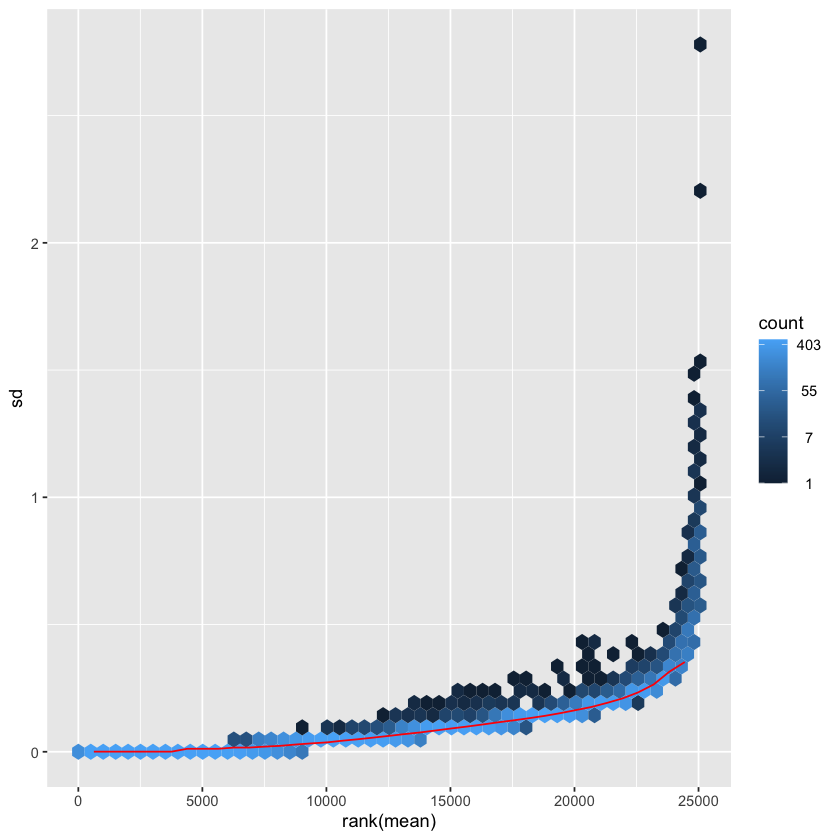

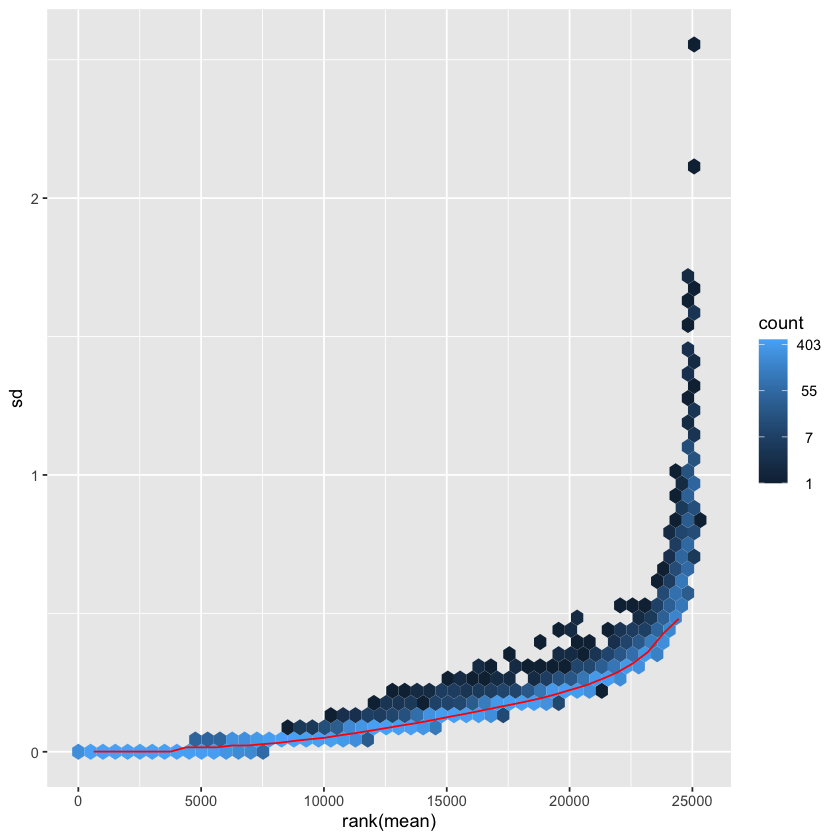

In [21]:
options(repr.plot.width = 7, repr.plot.height = 7)
meanSdPlot(assay(ntd_epithelial))
meanSdPlot(assay(vsd_epithelial))

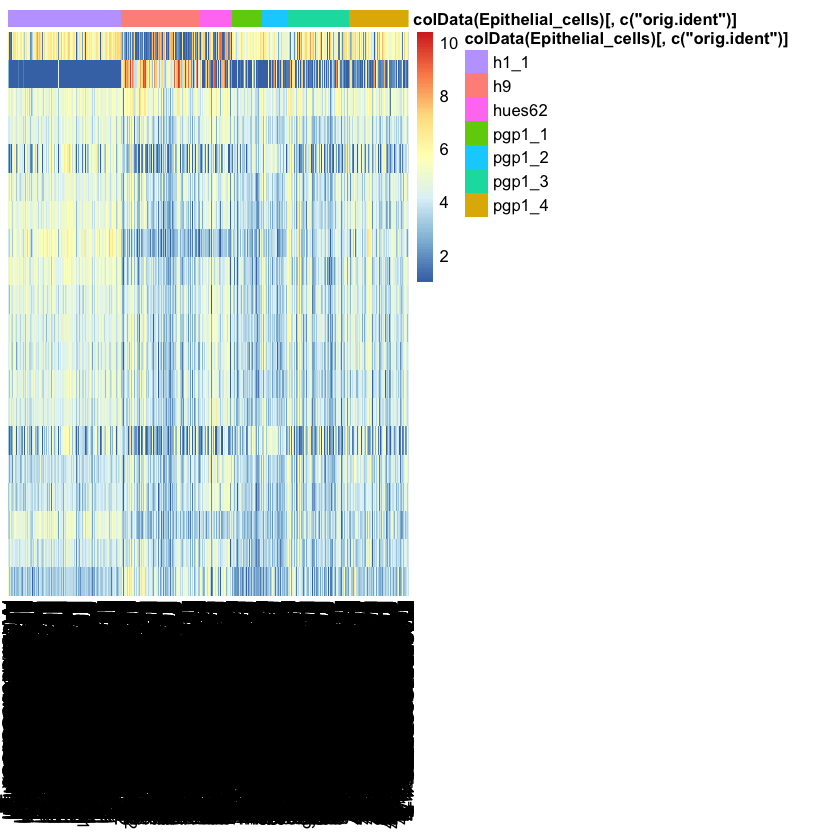

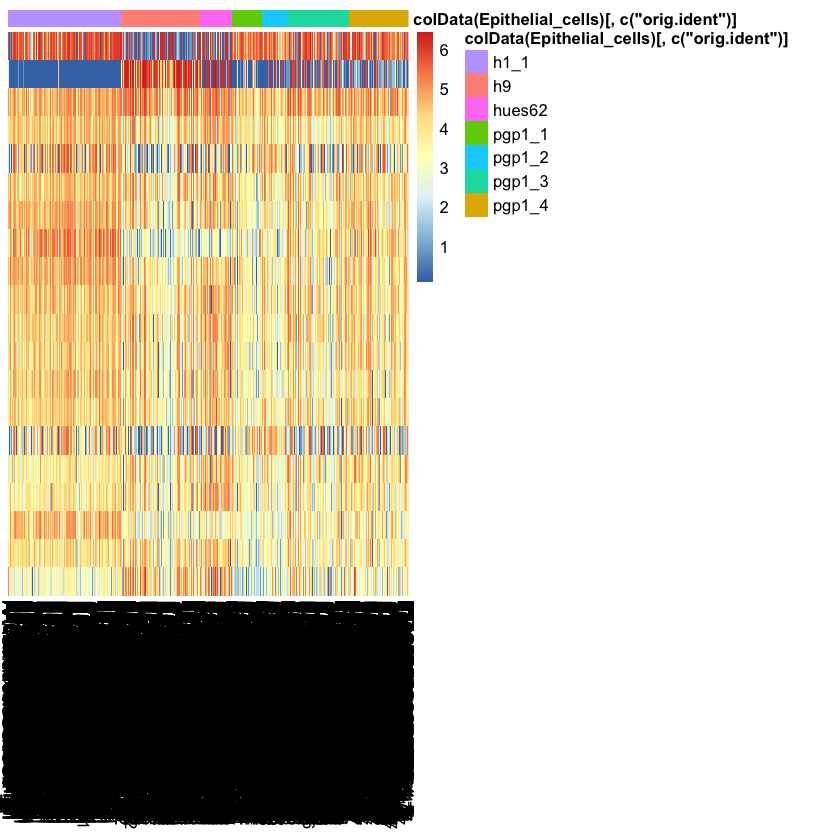

In [22]:
select_4 <- order(rowMeans(counts(Epithelial_cells,normalized=TRUE)), decreasing=TRUE)[1:20]
df_4 <- as.data.frame(colData(Epithelial_cells)[,c("orig.ident")])
row.names(df_4) <- colnames(ntd_epithelial)

pheatmap(assay(ntd_epithelial)[select_4,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df_4)

pheatmap(assay(vsd_epithelial)[select_4,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df_4)

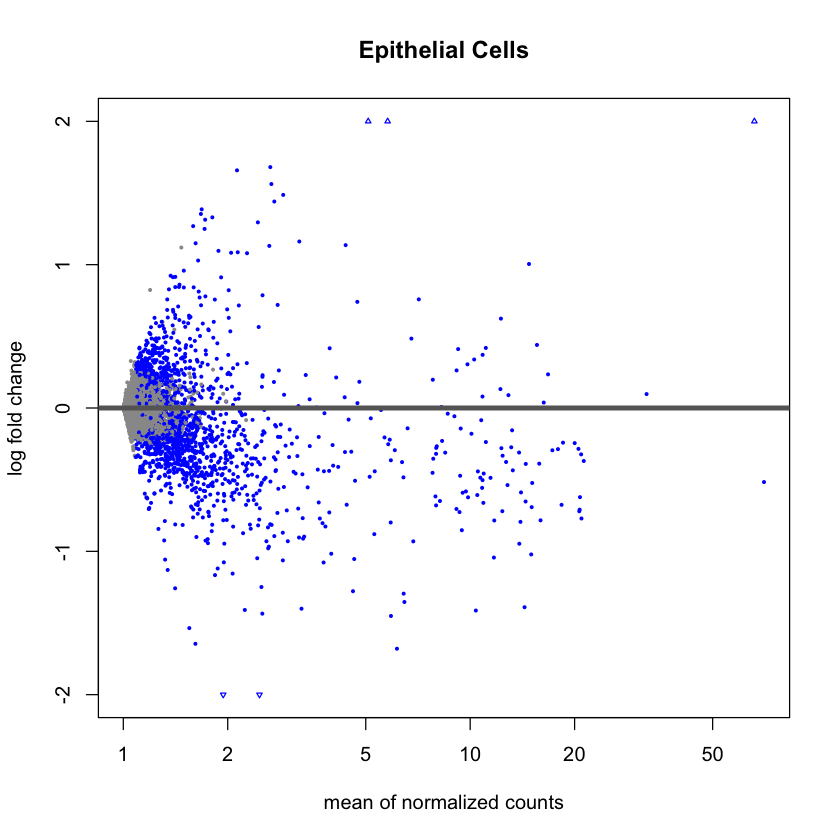

In [23]:
plotMA(res_epithelial, ylim = c(-2,2), main = "Epithelial Cells")

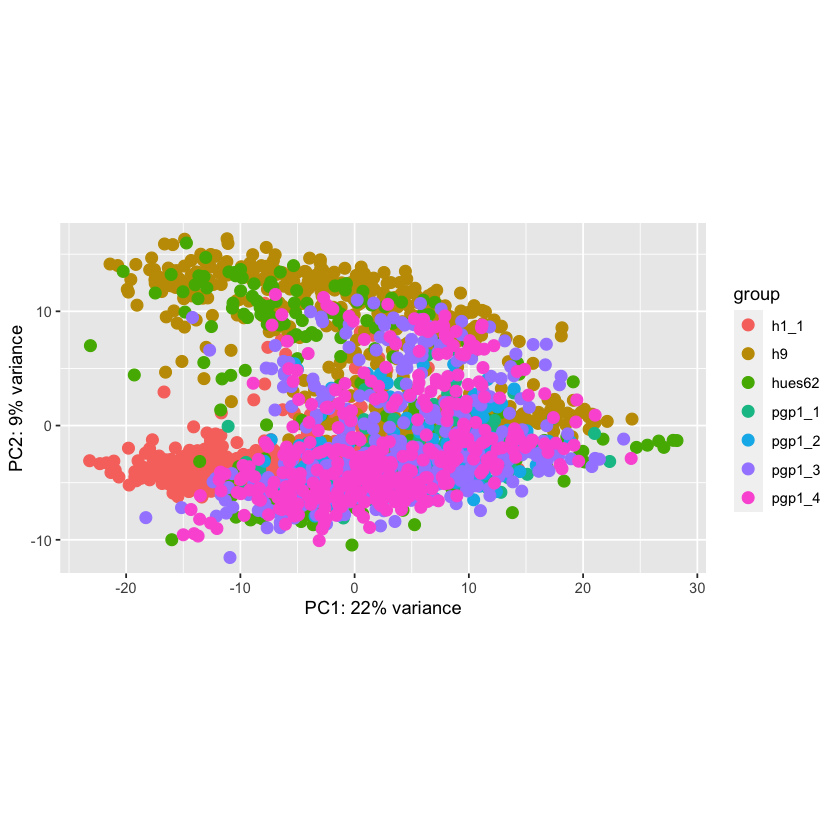

In [24]:
plotPCA(vsd_epithelial, intgroup=c("orig.ident"))

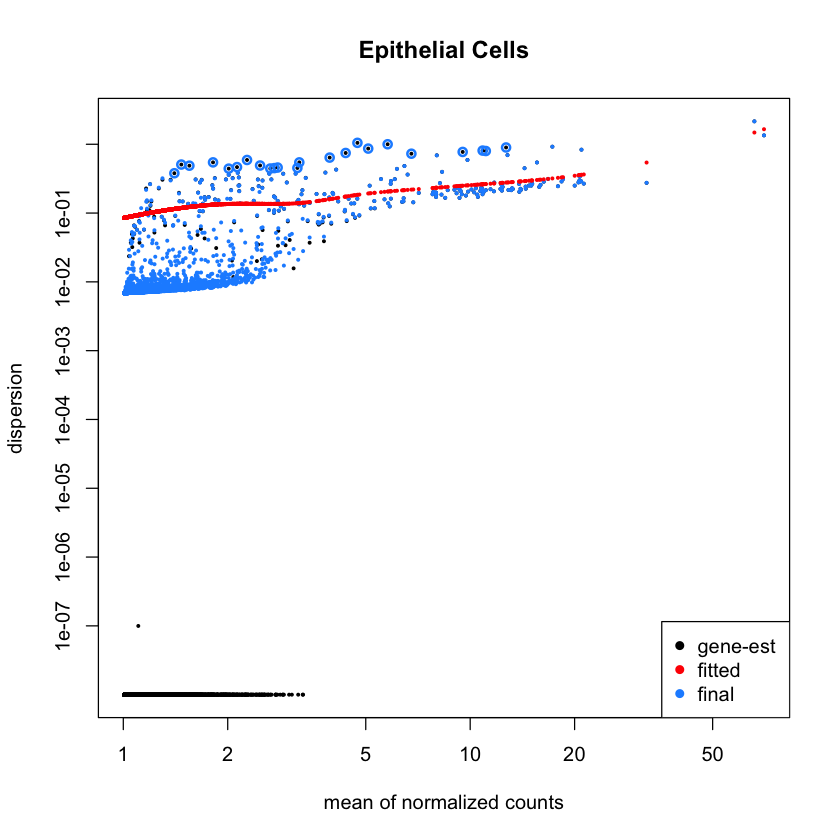

In [25]:
plotDispEsts(Epithelial_cells, main = "Epithelial Cells")

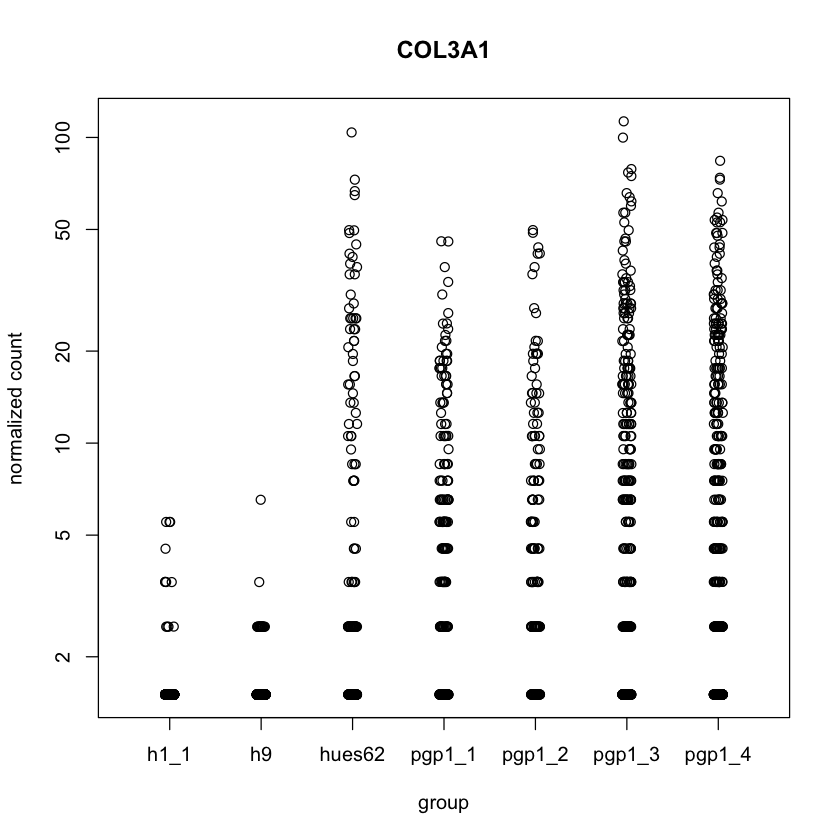

In [26]:
plotCounts(Epithelial_cells, gene=which.min(res_epithelial$padj), intgroup="orig.ident")

### Erythroblasts

In [3]:
Erythroblasts <- readRDS(file = "Erythroblast_deseq.rds")
Erythroblasts

res_erythroblast <- results(Erythroblasts)
saveRDS(res_erythroblast, file = "res_erythroblast.rds")
head(res_erythroblast)

class: DESeqDataSet 
dim: 25072 7190 
metadata(1): version
assays(4): counts mu H cooks
rownames(25072): AL627309.1 AL669831.5 ... LINC02573 BX004987.1
rowData names(31): baseMean baseVar ... deviance maxCooks
colnames(7190): AAACCCAAGAGAGAAC-1_1 AAACCCAGTCCCACGA-1_1 ...
  TTTGGTTTCGTGGACC-1_7 TTTGTTGCAACATCGT-1_7
colData names(11): orig.ident nCount_RNA ... cluster_id sizeFactor

log2 fold change (MLE): orig.ident pgp1 4 vs h1 1 
LRT p-value: '~ orig.ident' vs '~ 1' 
DataFrame with 6 rows and 6 columns
            baseMean log2FoldChange     lfcSE       stat    pvalue      padj
           <numeric>      <numeric> <numeric>  <numeric> <numeric> <numeric>
AL627309.1   1.00415    0.001156168 0.0556770 0.00400371  1.000000        NA
AL669831.5   1.01699   -0.000848160 0.0553483 0.09371076  0.999983        NA
FAM87B       1.00583   -0.006488768 0.0556779 0.02894158  1.000000        NA
LINC00115    1.00834   -0.003734057 0.0555923 0.06395160  0.999995        NA
FAM41C       1.00820   -0.008463353 0.0556374 0.07992908  0.999990        NA
AL645608.7   1.00388    0.000393226 0.0557062 0.00687141  1.000000        NA

In [4]:
#Up and Down regulated genes
cat("Up-regulated Genes:")
row.names(res_erythroblast)[which(!is.na(res_erythroblast$log2FoldChange) & res_erythroblast$log2FoldChange > 1.0 & res_erythroblast$padj < 0.05)] 
cat("Down-regulated Genes:")
row.names(res_erythroblast)[which(!is.na(res_erythroblast$log2FoldChange) & res_erythroblast$log2FoldChange < -1.0 & res_erythroblast$pvalue < 0.05)]
#write.table(x, file, append = FALSE, sep = " ", dec = ".", row.names = TRUE, col.names = TRUE)

Up-regulated Genes:

[1] "JUN"      "COL3A1"   "HIST1H4C" "COL1A2"   "PTN"      "KCNQ1OT1"
 [7] "DCN"      "FOS"      "COL1A1"   "TTR"      "ID1"      "JUNB"    
[13] "FOSB"     "LGALS1"

Down-regulated Genes:

[1] "SRM"      "NDUFS5"   "PRDX1"    "UQCRH"    "ATP5MC3"  "HSPD1"   
 [7] "HSPE1"    "PTMA"     "RPL22L1"  "H2AFZ"    "NPM1"     "CHCHD2"  
[13] "TMSB4X"   "FABP5"    "LDHA"     "PPP1R14B" "PPA1"     "PGAM1"   
[19] "RPS26"    "TAC3"     "RAN"      "RPL36AL"  "SIX6"     "DLK1"    
[25] "NDUFAB1"  "C1QBP"    "NME1"     "JPT1"     "TIMM13"   "UBE2S"   
[31] "RPS4Y1"   "RANBP1"

In [5]:
ntd_erythroblast <- normTransform(Erythroblasts)
# vsd_erythroblast <- varianceStabilizingTransformation(Erythroblasts) — Memory Issues

ERROR: Error: vector memory exhausted (limit reached?)


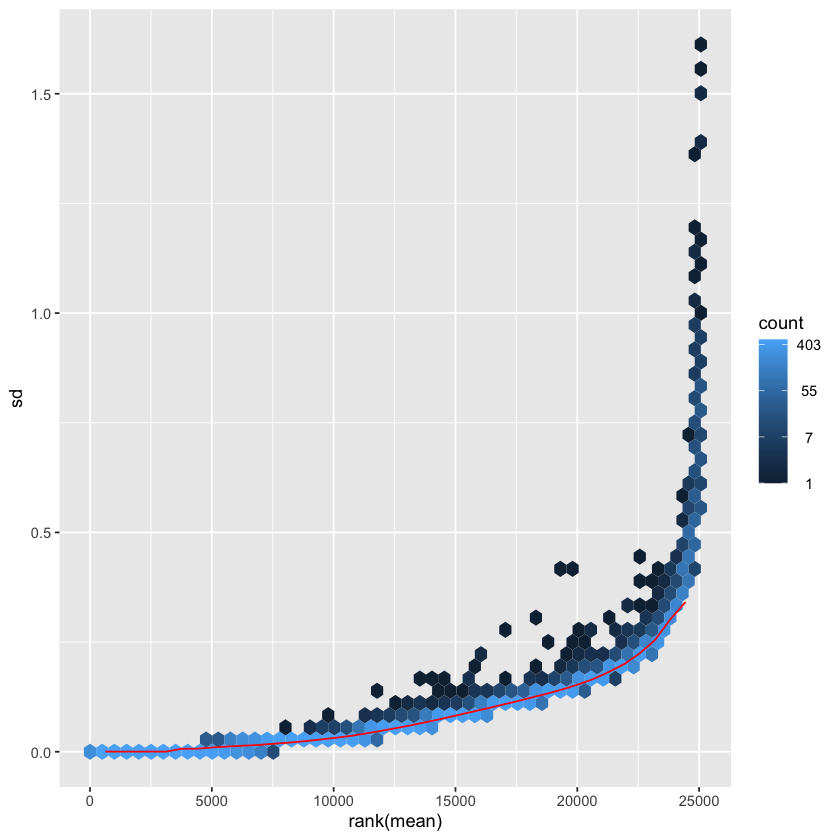

In [7]:
options(repr.plot.width = 7, repr.plot.height = 7)
meanSdPlot(assay(ntd_erythroblast))
# meanSdPlot(assay(vsd_erythroblast))

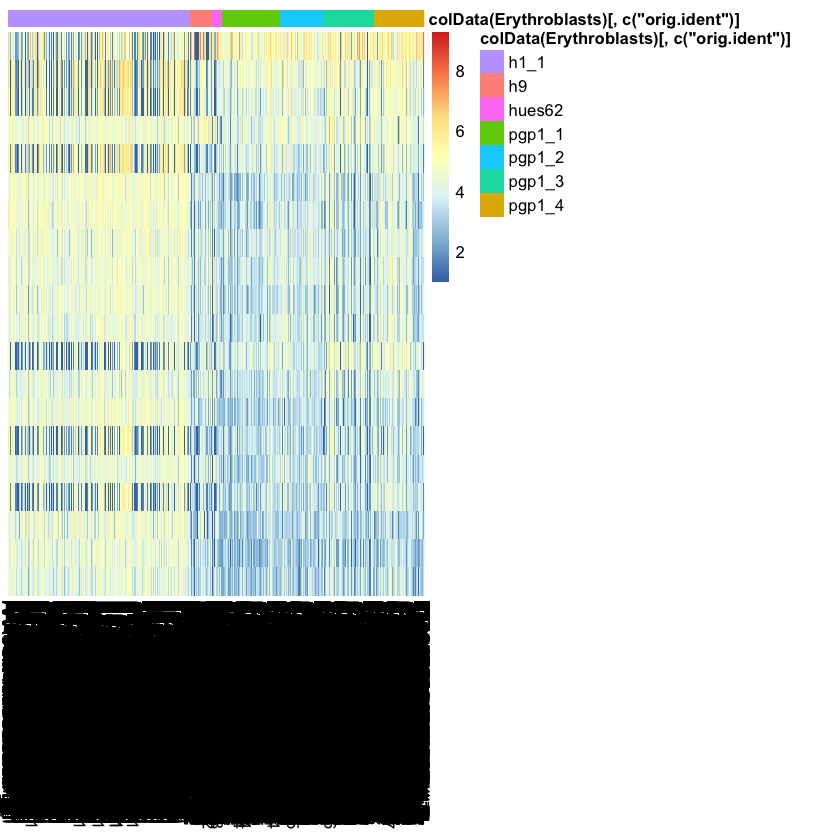

In [8]:
select_5 <- order(rowMeans(counts(Erythroblasts,normalized=TRUE)), decreasing=TRUE)[1:20]
df_5 <- as.data.frame(colData(Erythroblasts)[,c("orig.ident")])
row.names(df_5) <- colnames(ntd_erythroblast)

pheatmap(assay(ntd_erythroblast)[select_5,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df_5)

# pheatmap(assay(vsd_erythroblast)[select_5,], cluster_rows=FALSE, show_rownames=FALSE, cluster_cols=FALSE, annotation_col=df_5)

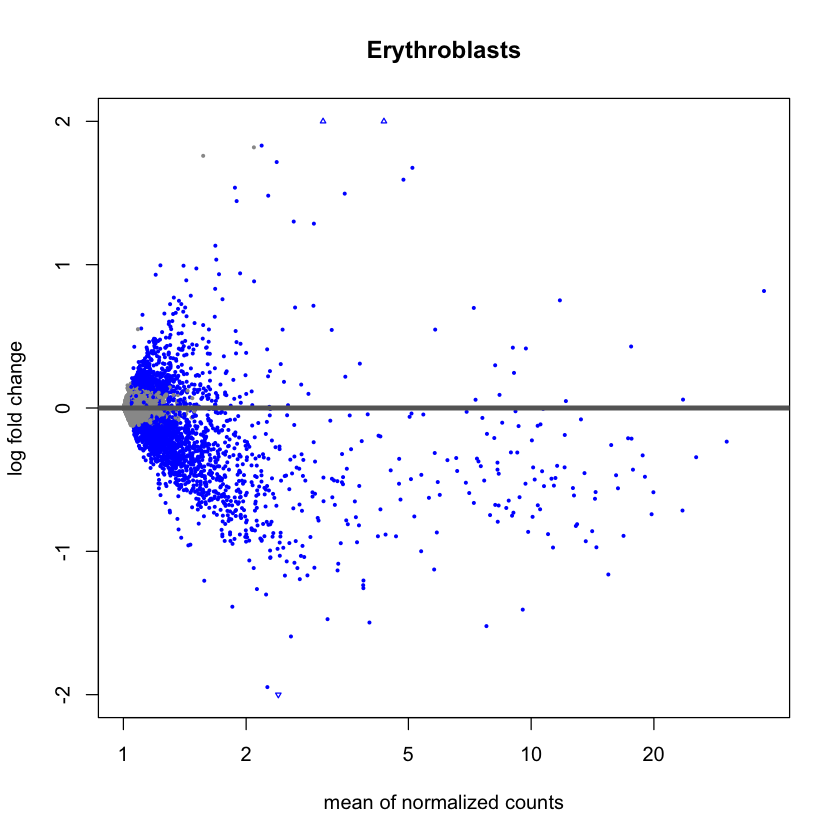

In [9]:
plotMA(res_erythroblast, ylim = c(-2,2), main = "Erythroblasts")

In [ ]:
# plotPCA(vsd_erythroblast, intgroup=c("orig.ident"))

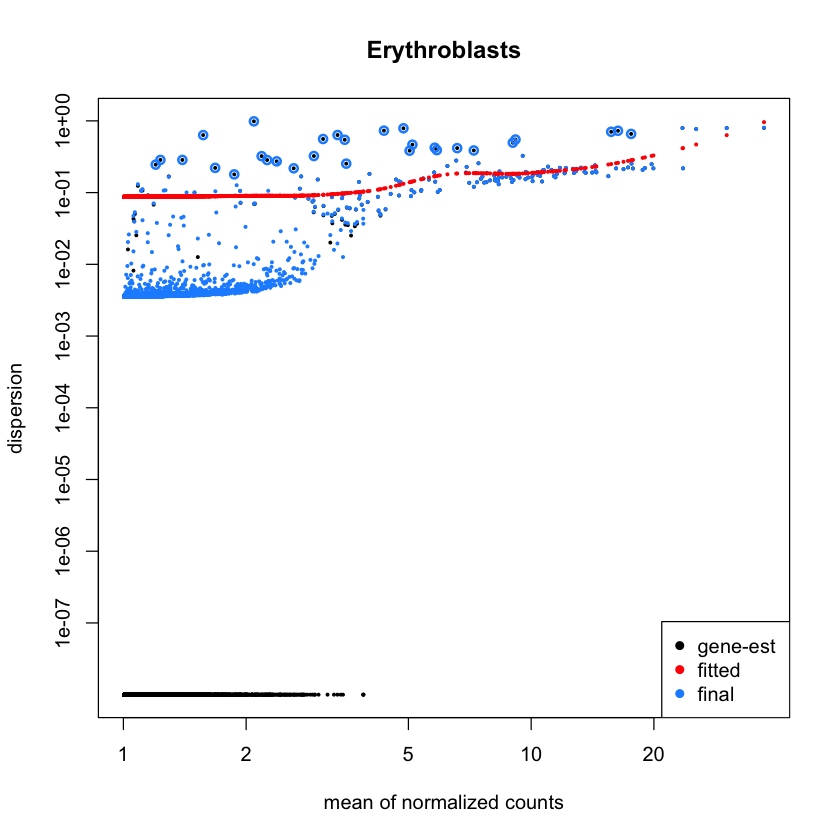

In [10]:
plotDispEsts(Erythroblasts, main = "Erythroblasts")

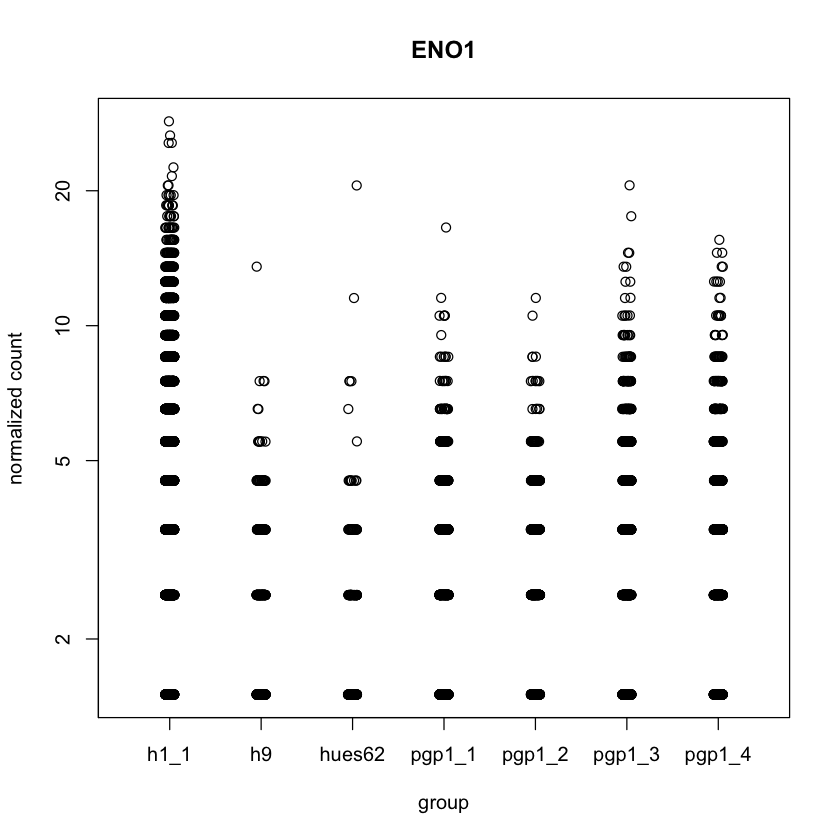

In [11]:
plotCounts(Erythroblasts, gene=which.min(res_erythroblast$padj), intgroup="orig.ident")

### iPS Cells

In [12]:
ips_cells <- readRDS(file = "iPS_cells_deseq.rds")
ips_cells

res_ips <- results(ips_cells)
saveRDS(res_ips, file = "res_ips.rds")
head(res_ips)

class: DESeqDataSet 
dim: 25072 1966 
metadata(1): version
assays(4): counts mu H cooks
rownames(25072): AL627309.1 AL669831.5 ... LINC02573 BX004987.1
rowData names(31): baseMean baseVar ... deviance maxCooks
colnames(1966): AAACGAACACGGTGTC-1_1 AAACGAACACTCACTC-1_1 ...
  TTTGATCCATCGCTAA-1_7 TTTGGTTTCTCGTCGT-1_7
colData names(11): orig.ident nCount_RNA ... cluster_id sizeFactor

log2 fold change (MLE): orig.ident pgp1 4 vs h1 1 
LRT p-value: '~ orig.ident' vs '~ 1' 
DataFrame with 6 rows and 6 columns
            baseMean log2FoldChange     lfcSE        stat    pvalue      padj
           <numeric>      <numeric> <numeric>   <numeric> <numeric> <numeric>
AL627309.1   1.00237    1.55710e-04  0.123110 2.44825e-05  1.000000        NA
AL669831.5   1.01512   -4.04228e-03  0.122190 4.87285e-02  0.999998        NA
FAM87B       1.00339   -3.39335e-03  0.123059 5.87165e-03  1.000000        NA
LINC00115    1.00441   -8.00287e-05  0.122817 9.97590e-03  1.000000        NA
FAM41C       1.00594   -1.04654e-02  0.122958 3.37119e-02  0.999999        NA
AL645608.7   1.00237    1.55710e-04  0.123110 2.44825e-05  1.000000        NA

In [13]:
#Up and Down regulated genes
cat("Up-regulated Genes:")
row.names(res_ips)[which(!is.na(res_ips$log2FoldChange) & res_ips$log2FoldChange > 1.0 & res_ips$padj < 0.05)] 
cat("Down-regulated Genes:")
row.names(res_ips)[which(!is.na(res_ips$log2FoldChange) & res_ips$log2FoldChange < -1.0 & res_ips$pvalue < 0.05)]
#write.table(x, file, append = FALSE, sep = " ", dec = ".", row.names = TRUE, col.names = TRUE)

Up-regulated Genes:

[1] "COL3A1"   "COL5A2"   "FN1"      "SPARC"    "COL1A2"   "PTN"     
 [7] "ITM2A"    "GPC3"     "COL5A1"   "KCNQ1OT1" "MGP"      "LUM"     
[13] "DCN"      "POSTN"    "COL1A1"   "TTR"      "RRBP1"    "ID1"     
[19] "JUNB"     "FOSB"     "TIMP3"    "LGALS1"   "COL6A1"   "COL6A2"

Down-regulated Genes:

[1] "ENO1"   "STMN1"  "HMGN2"  "NDUFS5" "UQCRH"  "HSPD1"  "HSPE1"  "IGFBP2"
 [9] "PTMA"   "RPL29"  "HINT1"  "NPM1"   "PRL"    "HMGA1"  "CHCHD2" "TMSB4X"
[17] "RPL7A"  "LDHA"   "PPA1"   "PGAM1"  "GAPDH"  "LDHB"   "RPS26"  "TAC3"  
[25] "PEBP1"  "RAN"    "SIX6"   "CKB"    "SRP14"  "C1QBP"  "JPT1"   "NNAT"  
[33] "RPS4Y1" "RANBP1"

In [14]:
ntd_ips <- normTransform(ips_cells)
vsd_ips <- varianceStabilizingTransformation(ips_cells)

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.



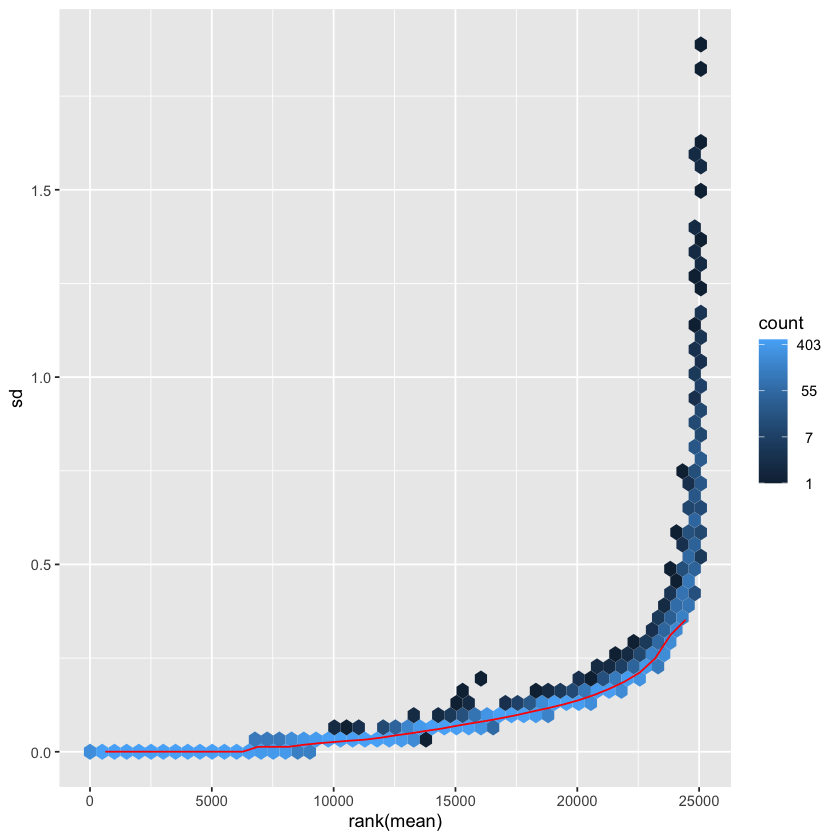

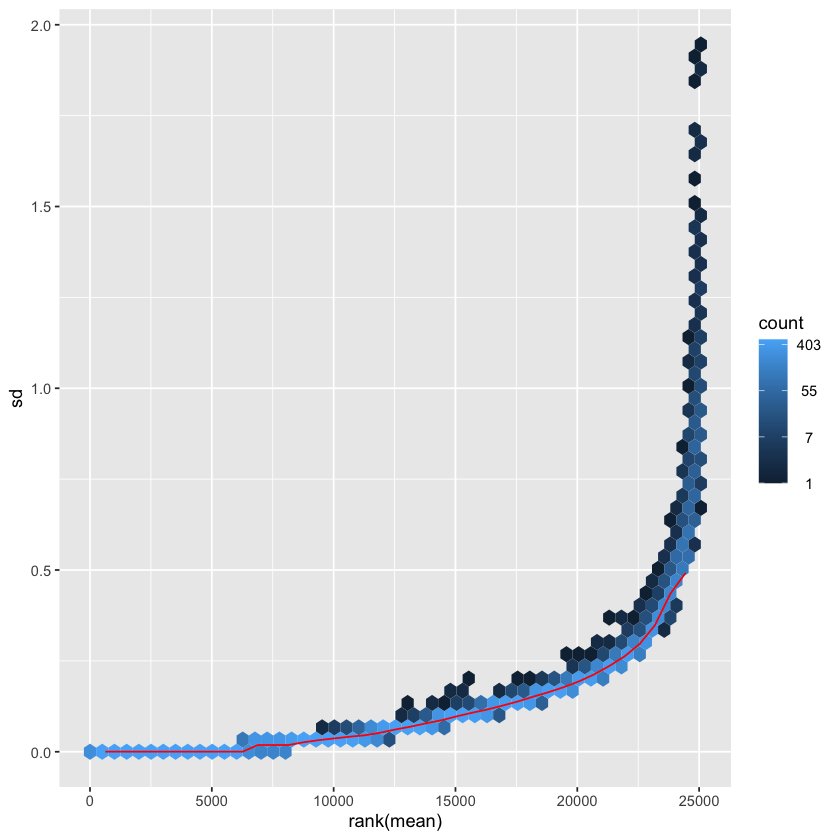

In [15]:
options(repr.plot.width = 7, repr.plot.height = 7)
meanSdPlot(assay(ntd_ips))
meanSdPlot(assay(vsd_ips))

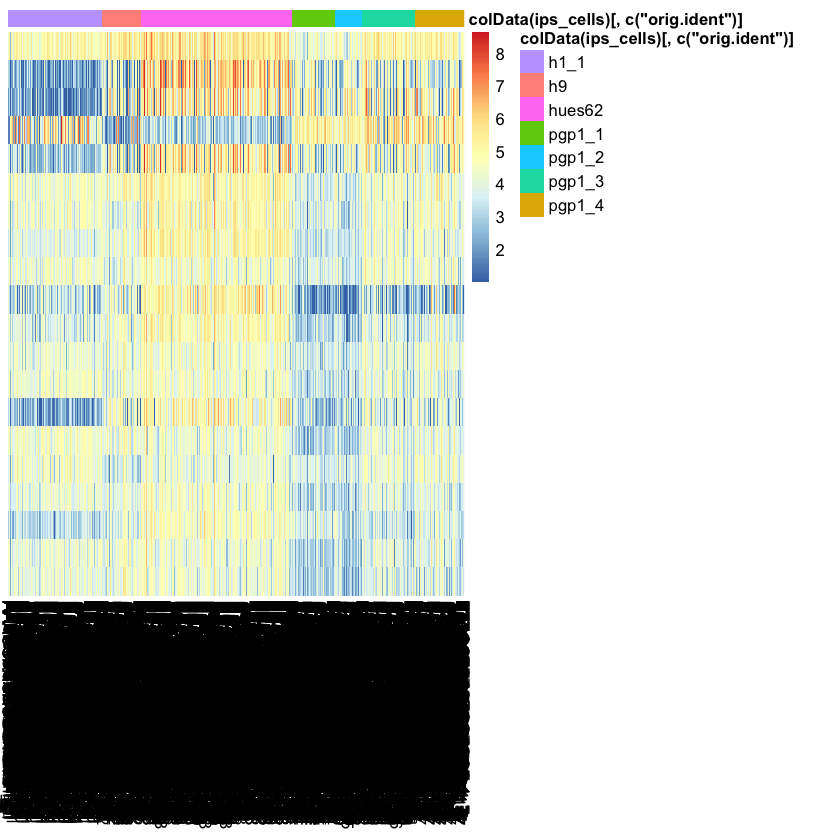

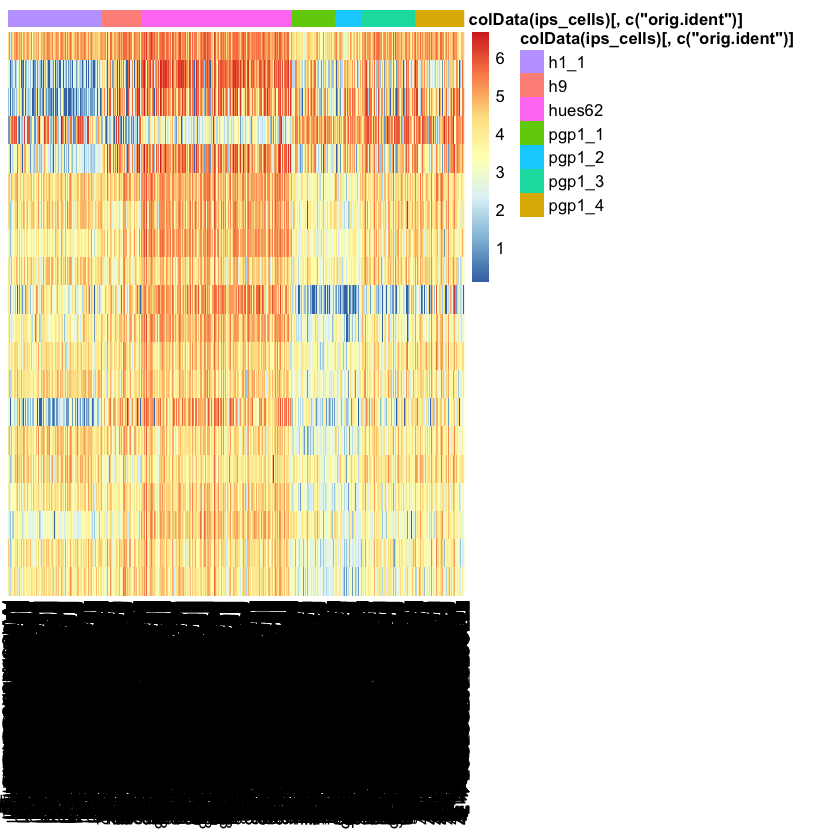

In [16]:
select_6 <- order(rowMeans(counts(ips_cells,normalized=TRUE)), decreasing=TRUE)[1:20]
df_6 <- as.data.frame(colData(ips_cells)[,c("orig.ident")])
row.names(df_6) <- colnames(ntd_ips)

pheatmap(assay(ntd_ips)[select_6,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df_6)

pheatmap(assay(vsd_ips)[select_6,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df_6)

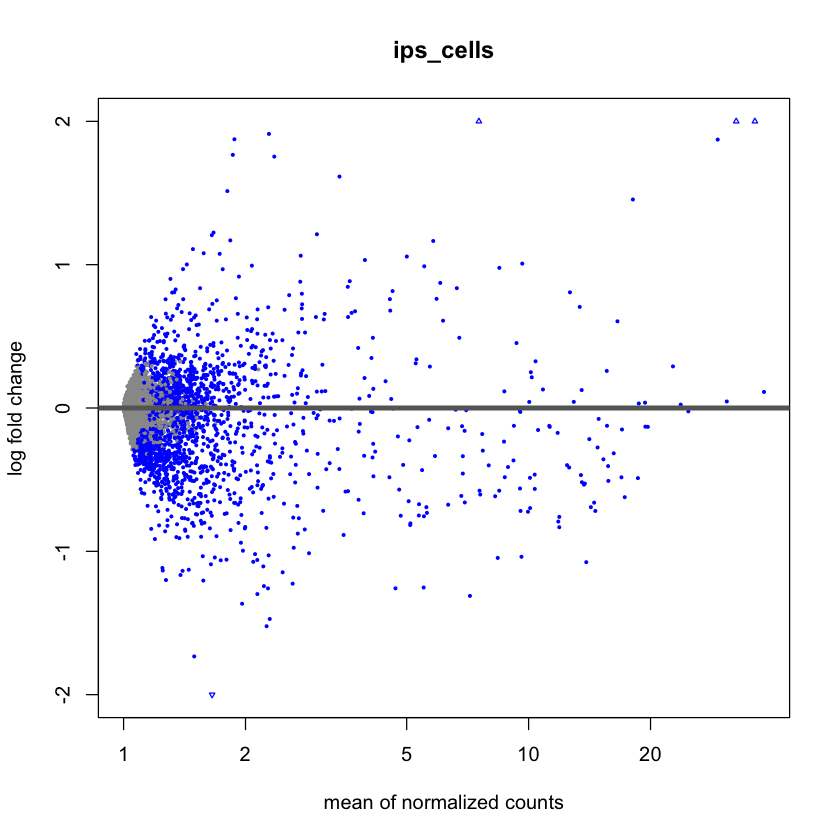

In [17]:
plotMA(ips_cells, ylim = c(-2,2), main = "ips_cells")

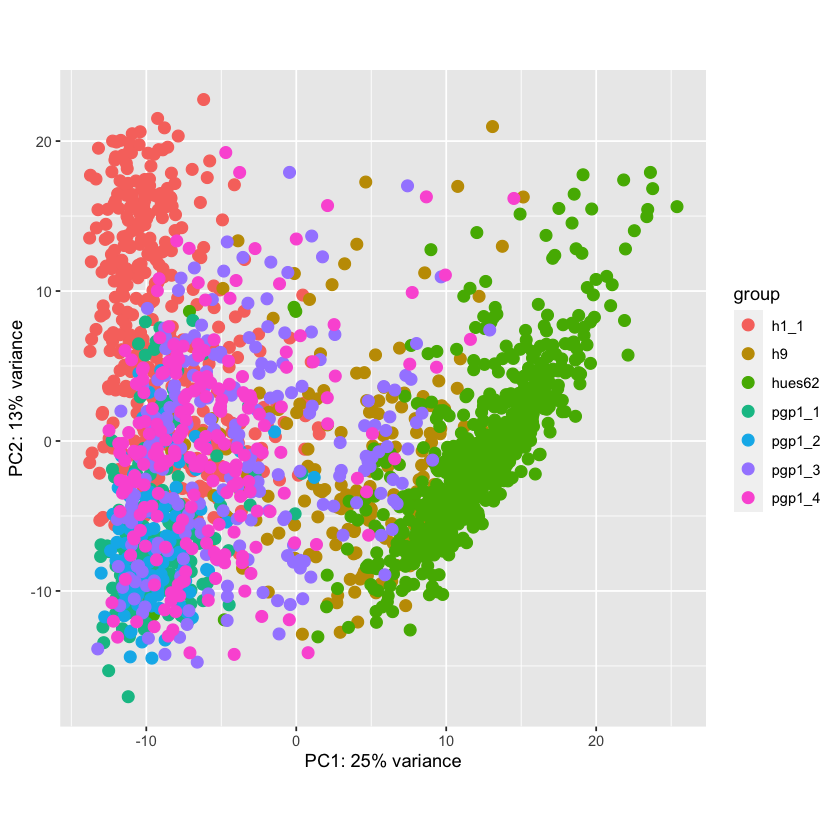

In [19]:
plotPCA(vsd_ips, intgroup=c("orig.ident"))

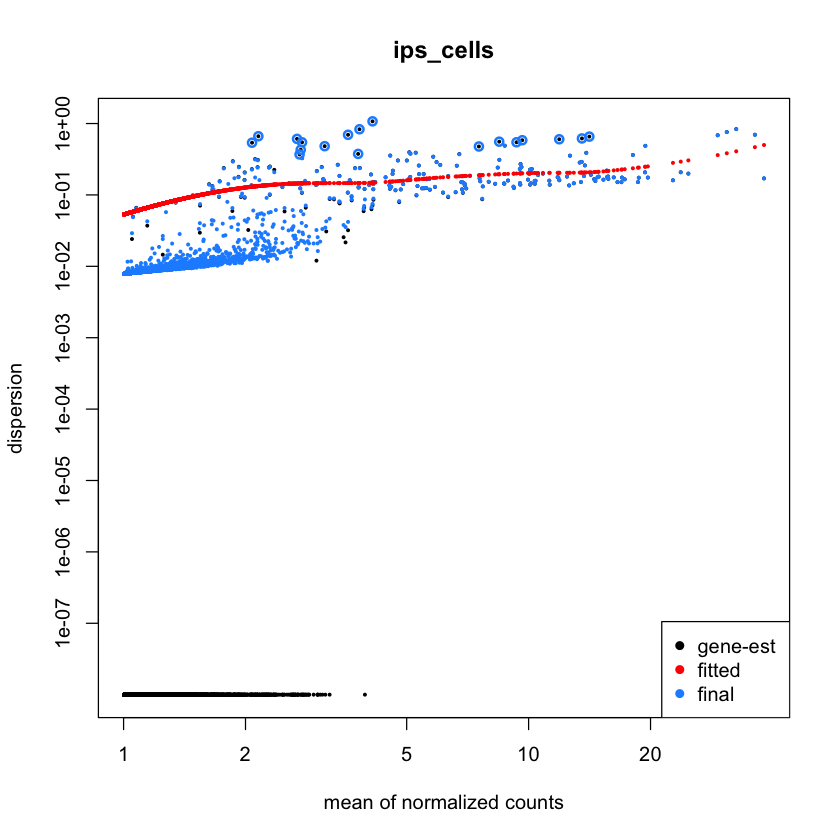

In [20]:
plotDispEsts(ips_cells, main = "ips_cells")

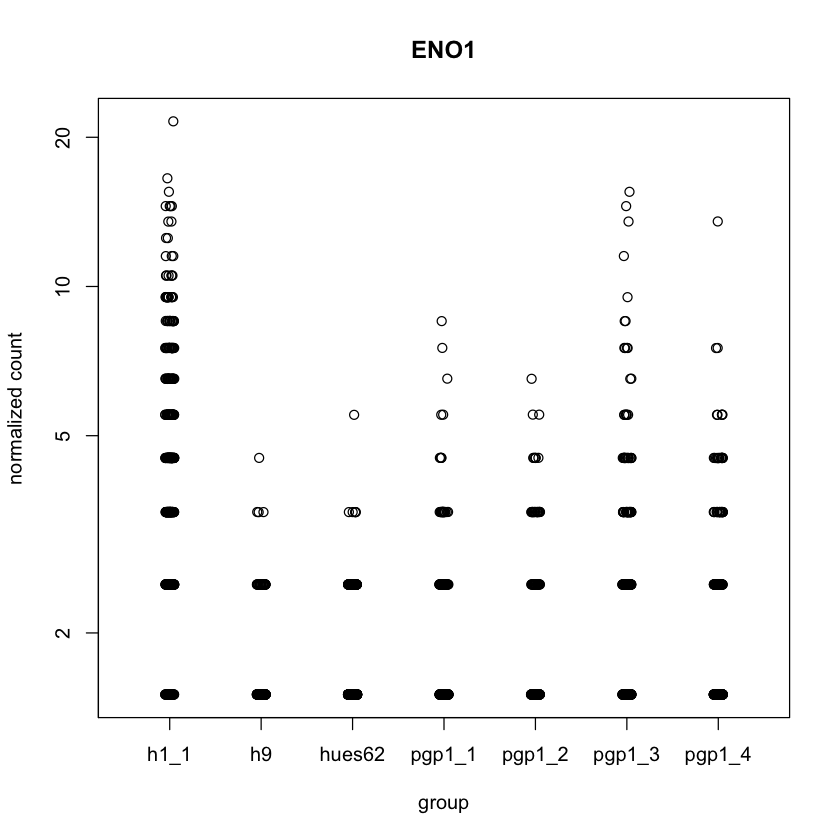

In [21]:
plotCounts(ips_cells, gene=which.min(res_erythroblast$padj), intgroup="orig.ident")

### Neuroepithelial cells

In [24]:
Neuroepithelial_cells <- readRDS(file = "Neuroepithelial_cell_deseq.rds")
Neuroepithelial_cells

res_neuroepithelial <- results(Neuroepithelial_cells)
saveRDS(res_neuroepithelial, file = "res_neuroepithelial.rds")
head(res_neuroepithelial)

class: DESeqDataSet 
dim: 25072 2256 
metadata(1): version
assays(4): counts mu H cooks
rownames(25072): AL627309.1 AL669831.5 ... LINC02573 BX004987.1
rowData names(31): baseMean baseVar ... deviance maxCooks
colnames(2256): AAACGAACATGAATAG-1_1 AAACGCTCAGACAAGC-1_1 ...
  TTTGGAGGTGGCCACT-1_7 TTTGTTGTCATTTGCT-1_7
colData names(11): orig.ident nCount_RNA ... cluster_id sizeFactor

log2 fold change (MLE): orig.ident pgp1 4 vs h1 1 
LRT p-value: '~ orig.ident' vs '~ 1' 
DataFrame with 6 rows and 6 columns
            baseMean log2FoldChange     lfcSE        stat    pvalue      padj
           <numeric>      <numeric> <numeric>   <numeric> <numeric> <numeric>
AL627309.1   1.00420    0.000653245 0.0905544 0.004215541  1.000000        NA
AL669831.5   1.01621    0.015033499 0.0899156 0.057967461  0.999996        NA
FAM87B       1.00375    0.000653245 0.0905543 0.000126557  1.000000        NA
LINC00115    1.01131   -0.008676600 0.0902332 0.079804805  0.999990        NA
FAM41C       1.01087   -0.016830352 0.0902123 0.089028727  0.999986        NA
AL645608.7   1.00420    0.003706585 0.0905029 0.002076018  1.000000        NA

In [25]:
#Up and Down regulated genes
cat("Up-regulated Genes:")
row.names(res_neuroepithelial)[which(!is.na(res_neuroepithelial$log2FoldChange) & res_neuroepithelial$log2FoldChange > 1.0 & res_neuroepithelial$padj < 0.05)] 
cat("Down-regulated Genes:")
row.names(res_neuroepithelial)[which(!is.na(res_neuroepithelial$log2FoldChange) & res_neuroepithelial$log2FoldChange < -1.0 & res_neuroepithelial$pvalue < 0.05)]
#write.table(x, file, append = FALSE, sep = " ", dec = ".", row.names = TRUE, col.names = TRUE)

Up-regulated Genes:

[1] "C1orf61" "COL3A1"  "PTN"     "COL1A1"  "ID1"

Down-regulated Genes:

[1] "RPL11"   "UQCRH"   "RPS7"    "CALM2"   "RPS27A"  "DAPL1"   "ATP5MC3"
 [8] "HSPD1"   "HSPE1"   "PTMA"    "RPL32"   "RPL14"   "RPL29"   "RPL24"  
[15] "RPL22L1" "H2AFZ"   "TBCA"    "RPS23"   "NPM1"    "RPS18"   "CHCHD2" 
[22] "TMSB4X"  "RPL8"    "ANXA1"   "TXN"     "RPL12"   "RPL7A"   "LDHA"   
[29] "FTH1"    "NEAT1"   "GSTP1"   "RPS3"    "PPA1"    "RPS24"   "TUBA1C" 
[36] "RPL41"   "NACA"    "TAC3"    "PEBP1"   "RAN"     "RPL36AL" "DLK1"   
[43] "CKB"     "RPS2"    "NDUFAB1" "C1QBP"   "RPL26"   "RPL19"   "RPS19"  
[50] "RPL18"   "FTL"     "RPS9"    "RPS4Y1"

In [26]:
ntd_neuroepithelial <- normTransform(Neuroepithelial_cells)
vsd_neuroepithelial <- varianceStabilizingTransformation(Neuroepithelial_cells)

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.



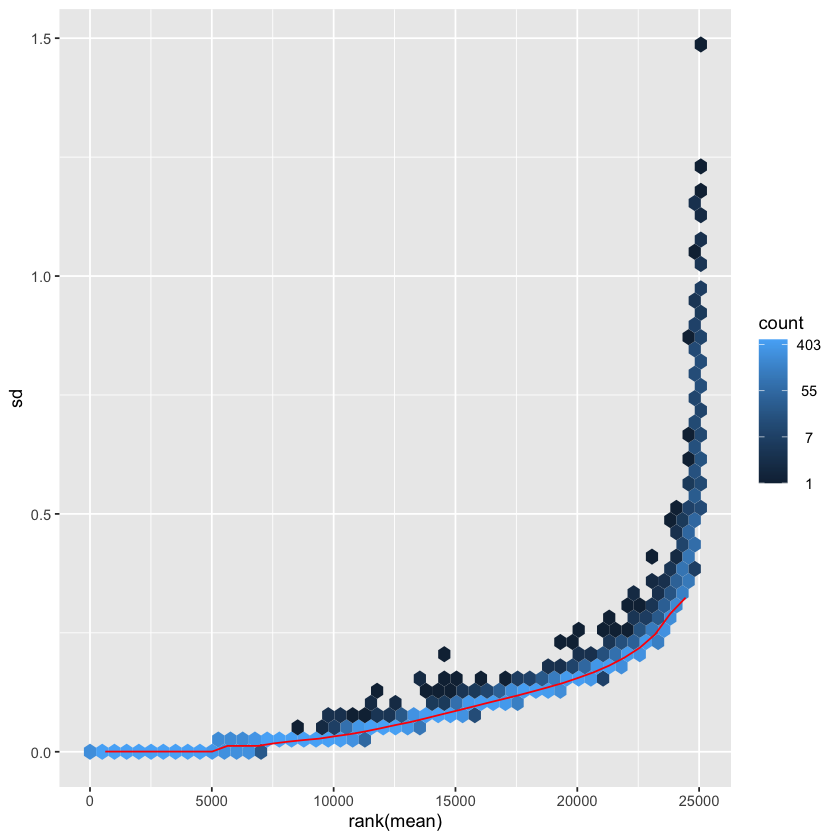

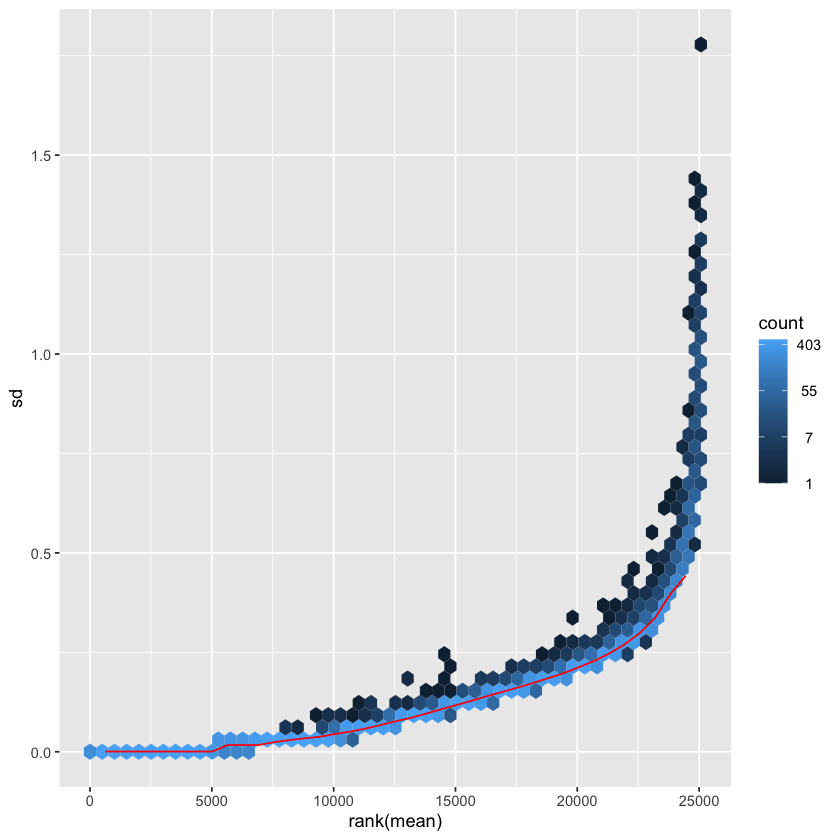

In [27]:
options(repr.plot.width = 7, repr.plot.height = 7)
meanSdPlot(assay(ntd_neuroepithelial))
meanSdPlot(assay(vsd_neuroepithelial))

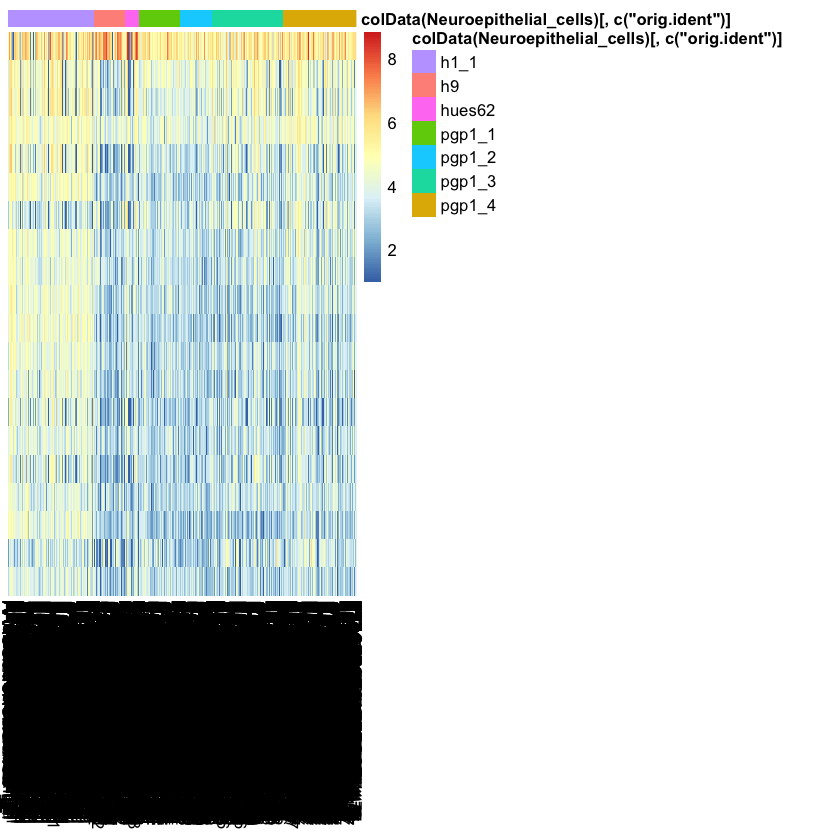

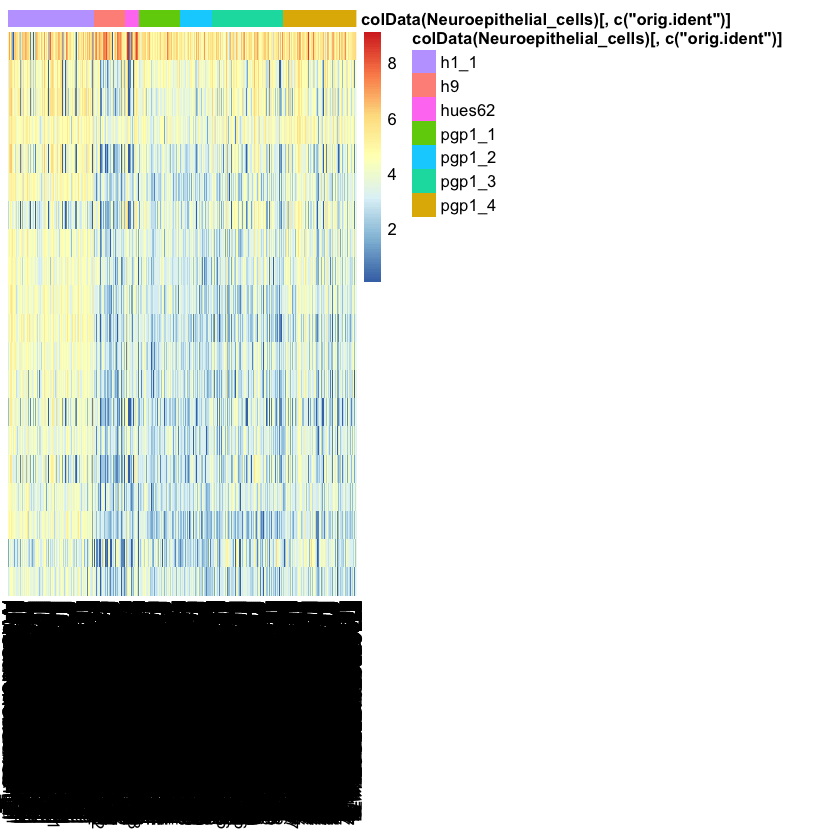

In [28]:
select_7 <- order(rowMeans(counts(Neuroepithelial_cells,normalized=TRUE)), decreasing=TRUE)[1:20]
df_7 <- as.data.frame(colData(Neuroepithelial_cells)[,c("orig.ident")])
row.names(df_7) <- colnames(ntd_neuroepithelial)

pheatmap(assay(ntd_neuroepithelial)[select_7,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df_7)

pheatmap(assay(vsd_neuroepithelial)[select_7,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df_7)

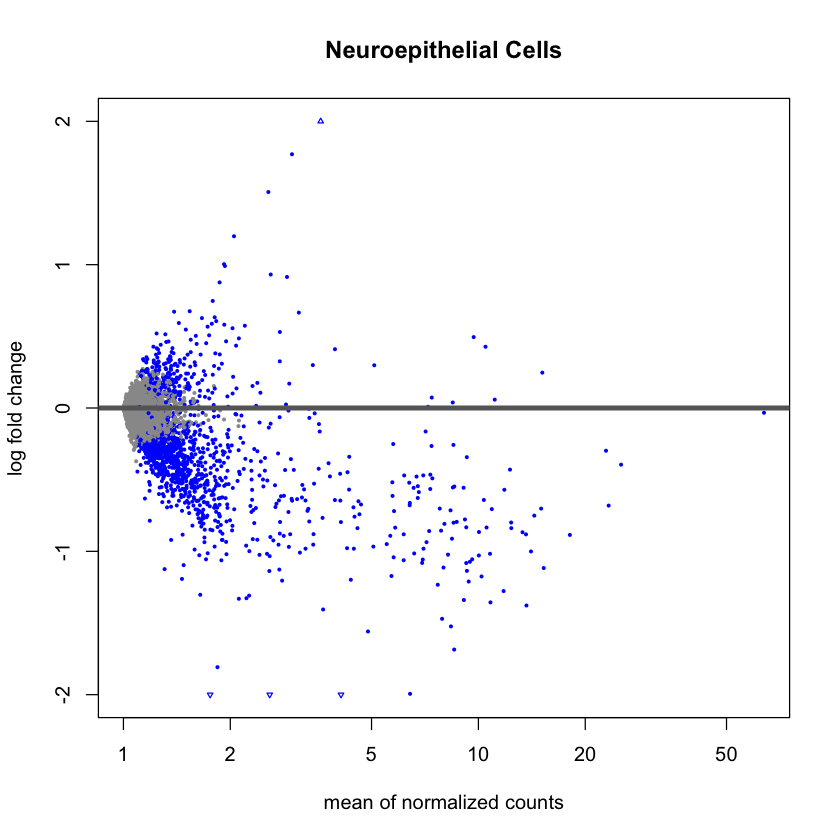

In [29]:
plotMA(res_neuroepithelial, ylim = c(-2,2), main = "Neuroepithelial Cells")

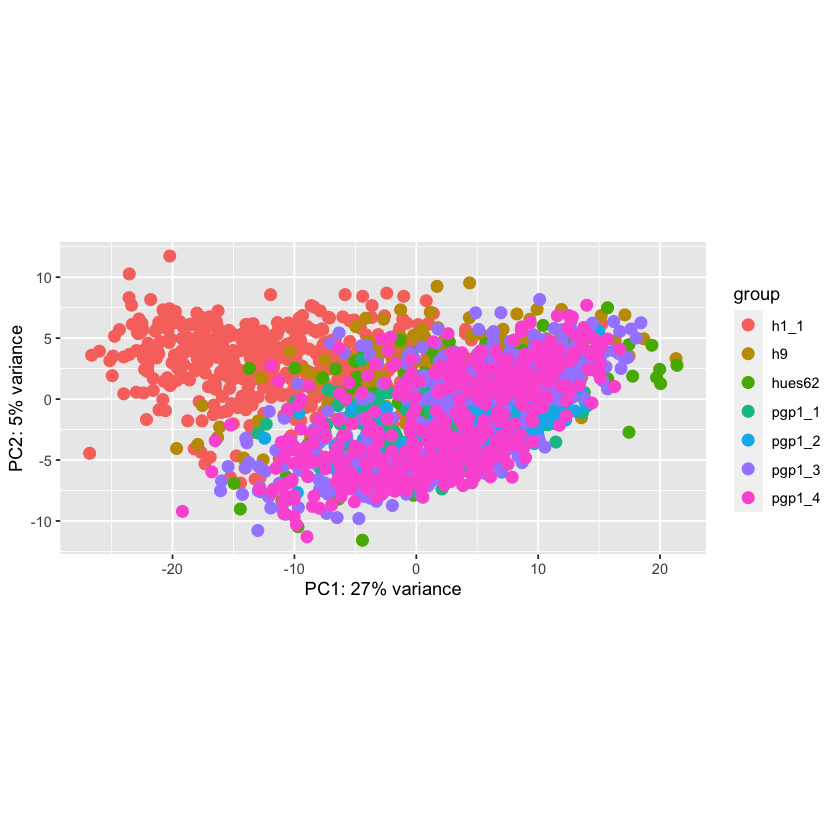

In [30]:
plotPCA(vsd_neuroepithelial, intgroup=c("orig.ident"))

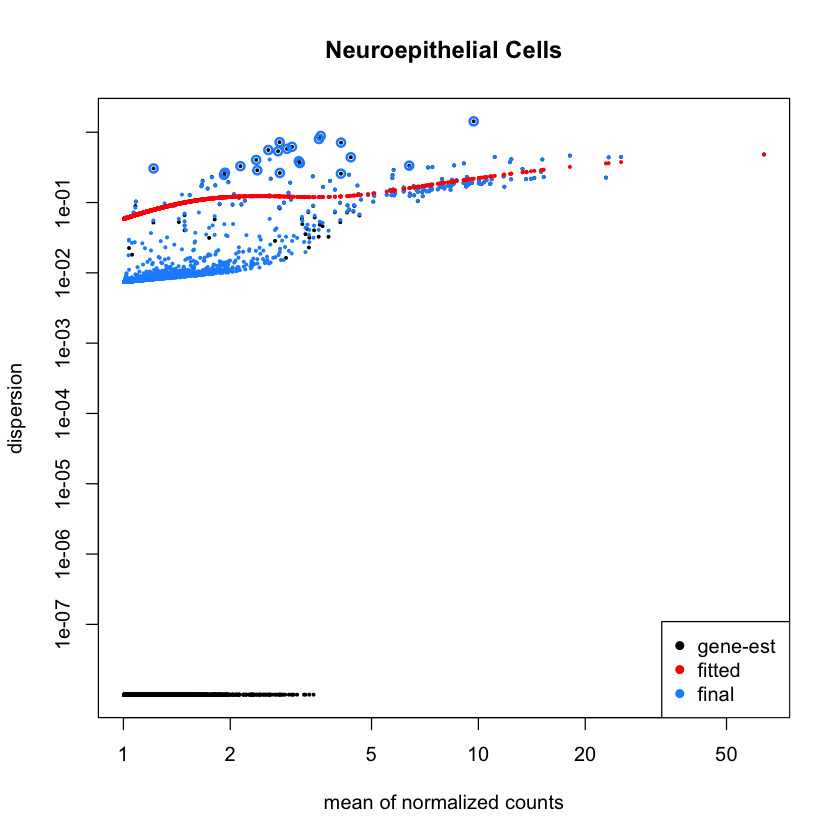

In [31]:
plotDispEsts(Neuroepithelial_cells, main = "Neuroepithelial Cells")

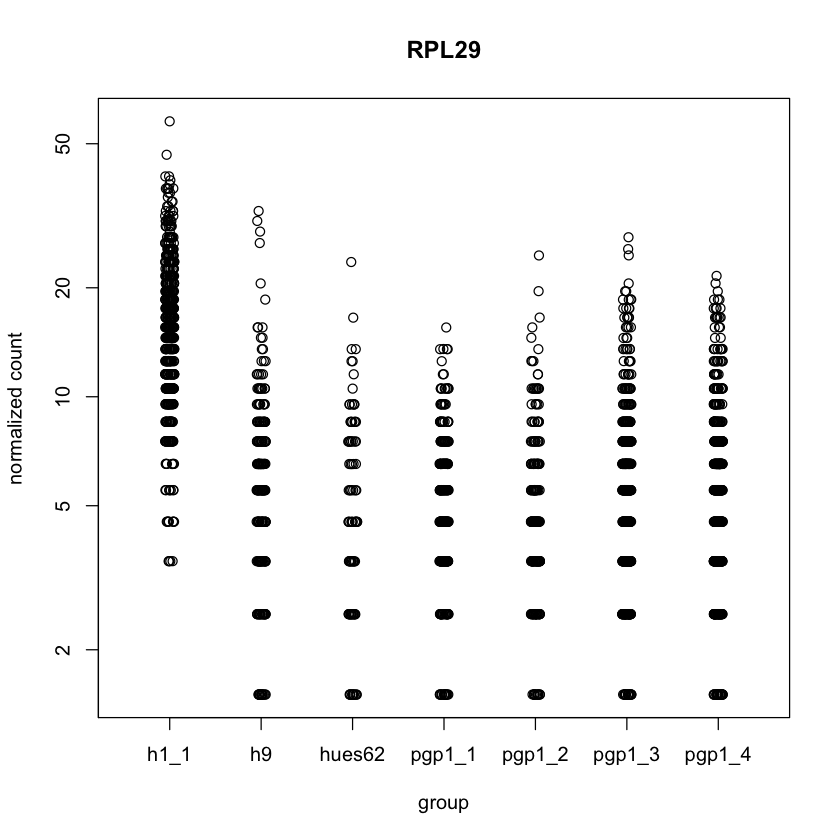

In [35]:
plotCounts(Neuroepithelial_cells, gene=which.min(res_neuroepithelial$padj), intgroup="orig.ident")

### Neurons

In [4]:
Neurons <- readRDS(file = "Neurons_deseq.rds")
Neurons

res_neurons <- results(Neurons)
saveRDS(res_neurons, file = "res_neurons.rds")
head(res_neurons)

class: DESeqDataSet 
dim: 25072 3110 
metadata(1): version
assays(4): counts mu H cooks
rownames(25072): AL627309.1 AL669831.5 ... LINC02573 BX004987.1
rowData names(31): baseMean baseVar ... deviance maxCooks
colnames(3110): AAACCCAAGCACCTGC-1_1 AAACGAAAGAATCGTA-1_1 ...
  TTTCGATTCCCTATTA-1_7 TTTGATCAGCCATTGT-1_7
colData names(11): orig.ident nCount_RNA ... cluster_id sizeFactor

log2 fold change (MLE): orig.ident pgp1 4 vs h1 1 
LRT p-value: '~ orig.ident' vs '~ 1' 
DataFrame with 6 rows and 6 columns
            baseMean log2FoldChange     lfcSE        stat    pvalue      padj
           <numeric>      <numeric> <numeric>   <numeric> <numeric> <numeric>
AL627309.1   1.00430    0.000275276  0.106382 0.012871030  1.000000        NA
AL669831.5   1.02397   -0.014922796  0.105669 0.687809771  0.994750        NA
FAM87B       1.00301    0.000275276  0.106382 0.000390591  1.000000        NA
LINC00115    1.00817   -0.003247785  0.106325 0.041790801  0.999999        NA
FAM41C       1.00946    0.005263705  0.106155 0.022862682  1.000000        NA
AL645608.7   1.00301    0.000275276  0.106382 0.000390591  1.000000        NA

In [5]:
#Up and Down regulated genes
cat("Up-regulated Genes:")
row.names(res_neurons)[which(!is.na(res_neurons$log2FoldChange) & res_neurons$log2FoldChange > 1.0 & res_neurons$padj < 0.05)] 
cat("Down-regulated Genes:")
row.names(res_neurons)[which(!is.na(res_neurons$log2FoldChange) & res_neurons$log2FoldChange < -1.0 & res_neurons$pvalue < 0.05)]
#write.table(x, file, append = FALSE, sep = " ", dec = ".", row.names = TRUE, col.names = TRUE)

Up-regulated Genes:

[1] "CNTN2"    "COL3A1"   "GAP43"    "STMN2"    "KCNQ1OT1" "CRABP1"   "COL1A1"  
[8] "ELAVL3"

Down-regulated Genes:

[1] "RPL11"    "HMGN2"    "UQCRH"    "RPL5"     "RPS7"     "RPS27A"  
 [7] "IGFBP2"   "RPL32"    "RPL15"    "RPL14"    "RPL29"    "RPL24"   
[13] "RBP1"     "RPL35A"   "RPS3A"    "BTF3"     "RPS23"    "RPS14"   
[19] "NPM1"     "RACK1"    "RPS18"    "RPL10A"   "RPS12"    "CHCHD2"  
[25] "DLX6-AS1" "DLX5"     "TMSB4X"   "RPS4X"    "RPL8"     "RPL12"   
[31] "RPL7A"    "RPS13"    "MDK"      "GSTP1"    "RPS3"     "RPS24"   
[37] "LDHB"     "RPL41"    "NACA"     "TAC3"     "RPL6"     "SIX6"    
[43] "DLK1"     "NDN"      "RPLP1"    "RPS2"     "RPS15A"   "RPL13"   
[49] "RPL26"    "RPL23A"   "RPL19"    "NNAT"     "GNAS"     "RPL36"   
[55] "RPS19"    "RPL18"    "FTL"      "RPS9"     "RPL28"    "RPS5"    
[61] "RPS4Y1"   "RPL3"

In [6]:
ntd_neurons <- normTransform(Neurons)
vsd_neurons <- varianceStabilizingTransformation(Neurons)

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.



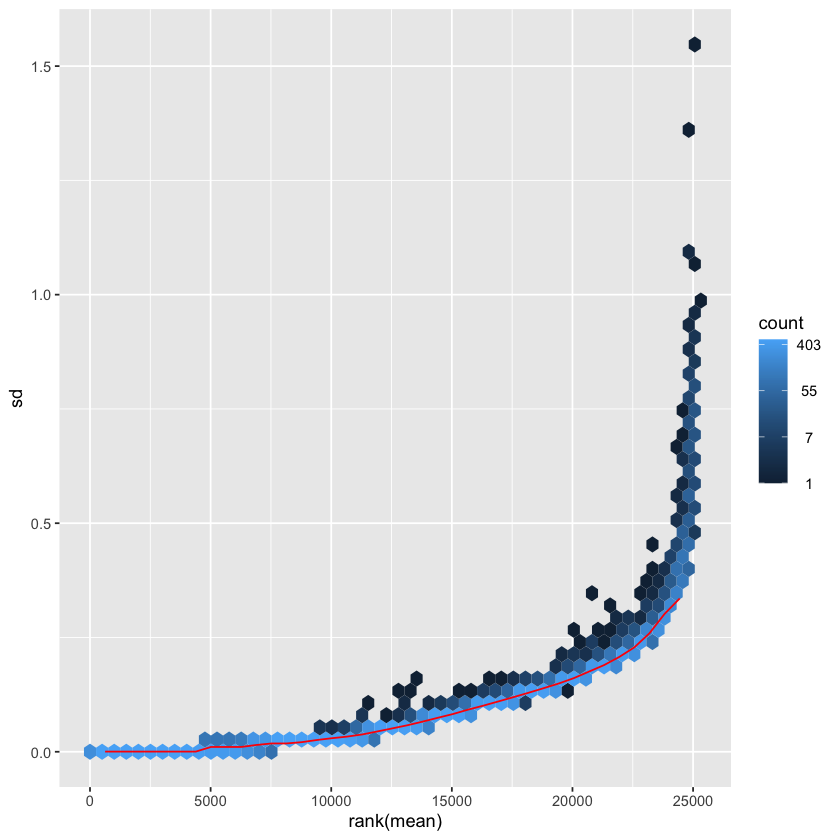

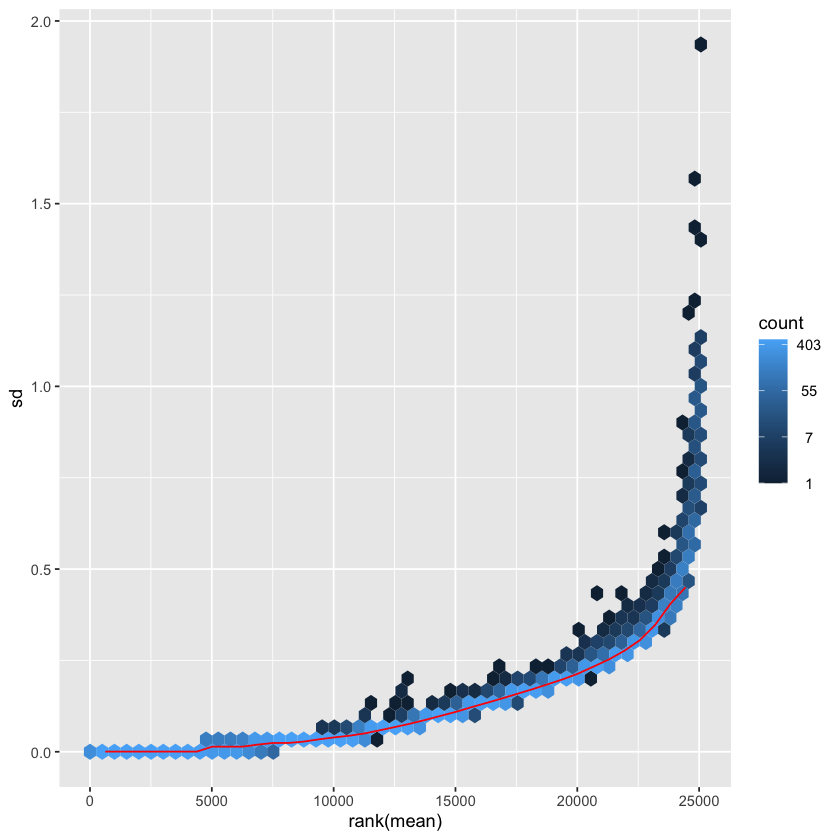

In [7]:
options(repr.plot.width = 7, repr.plot.height = 7)
meanSdPlot(assay(ntd_neurons))
meanSdPlot(assay(vsd_neurons))

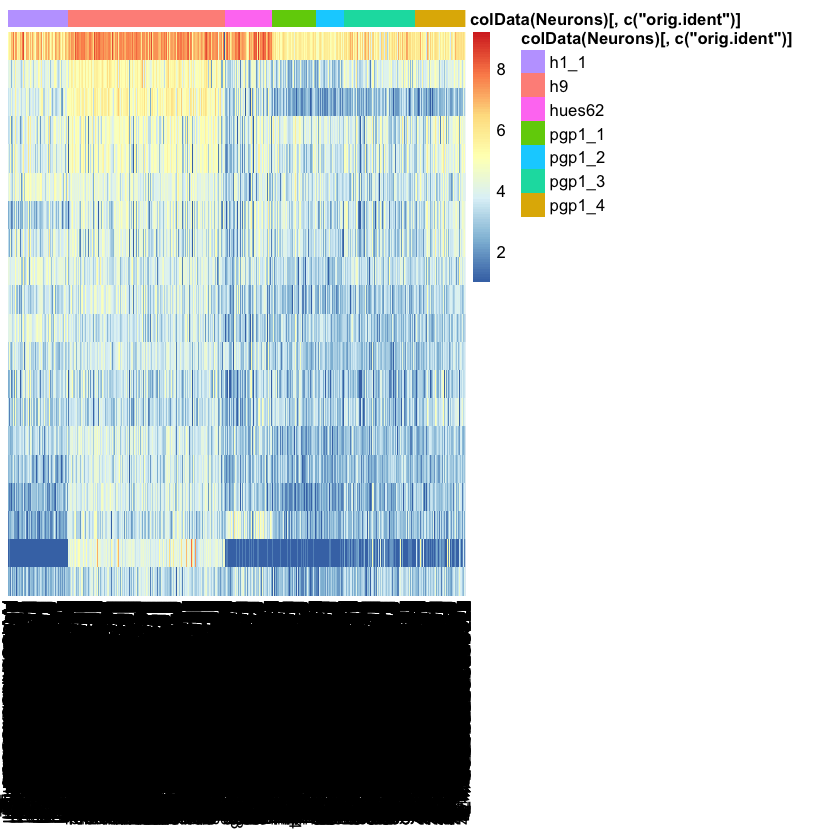

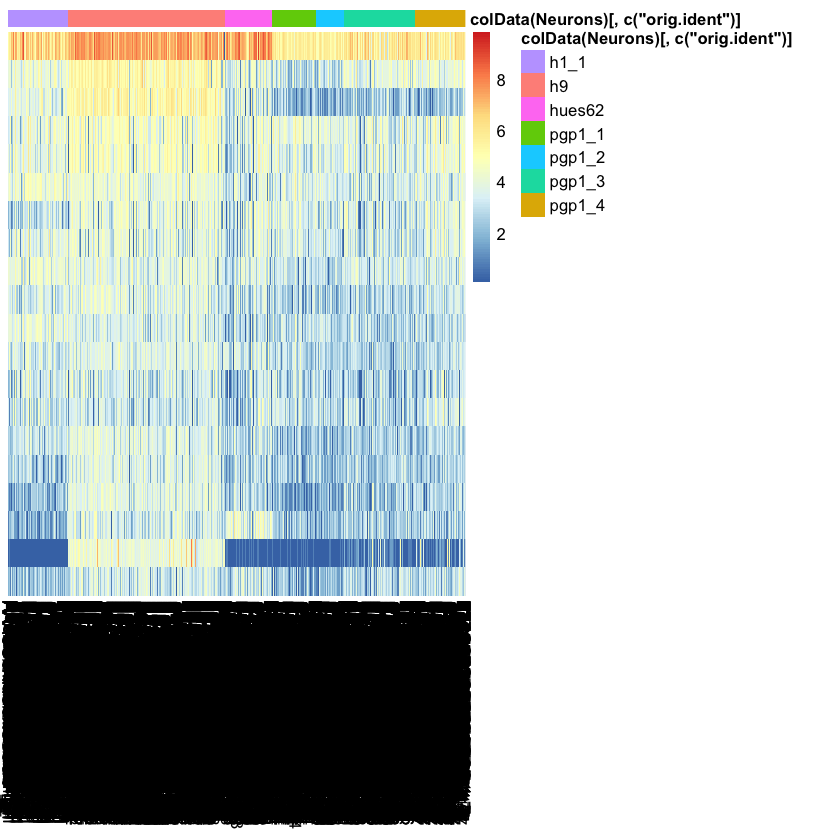

In [8]:
select_8 <- order(rowMeans(counts(Neurons,normalized=TRUE)), decreasing=TRUE)[1:20]
df_8 <- as.data.frame(colData(Neurons)[,c("orig.ident")])
row.names(df_8) <- colnames(ntd_neurons)

pheatmap(assay(ntd_neurons)[select_8,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df_8)

pheatmap(assay(vsd_neurons)[select_8,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df_8)

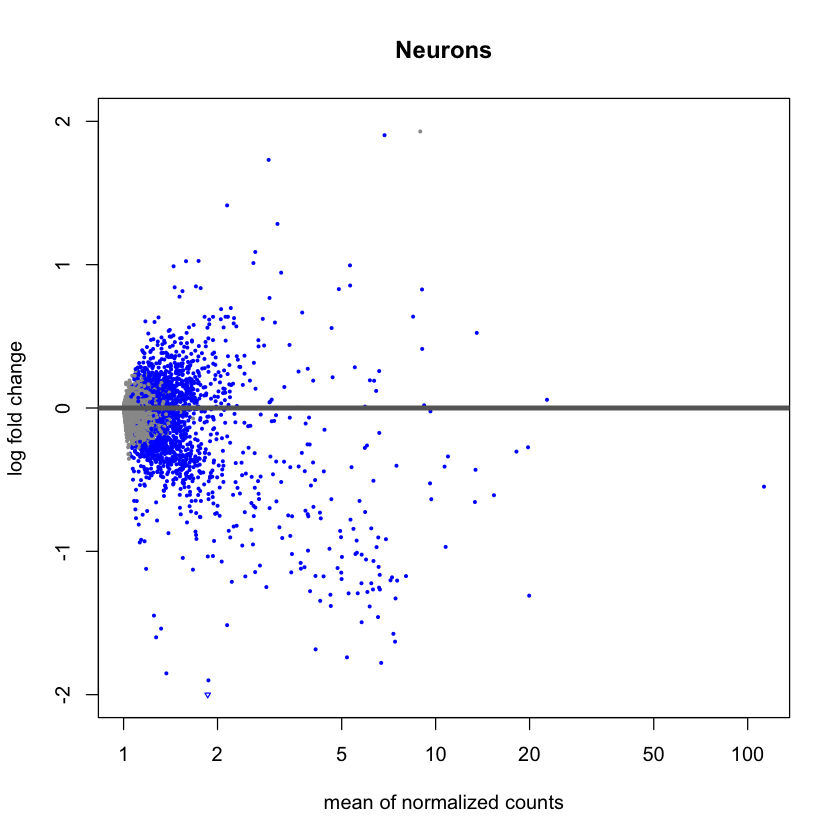

In [9]:
plotMA(res_neurons, ylim = c(-2,2), main = "Neurons")

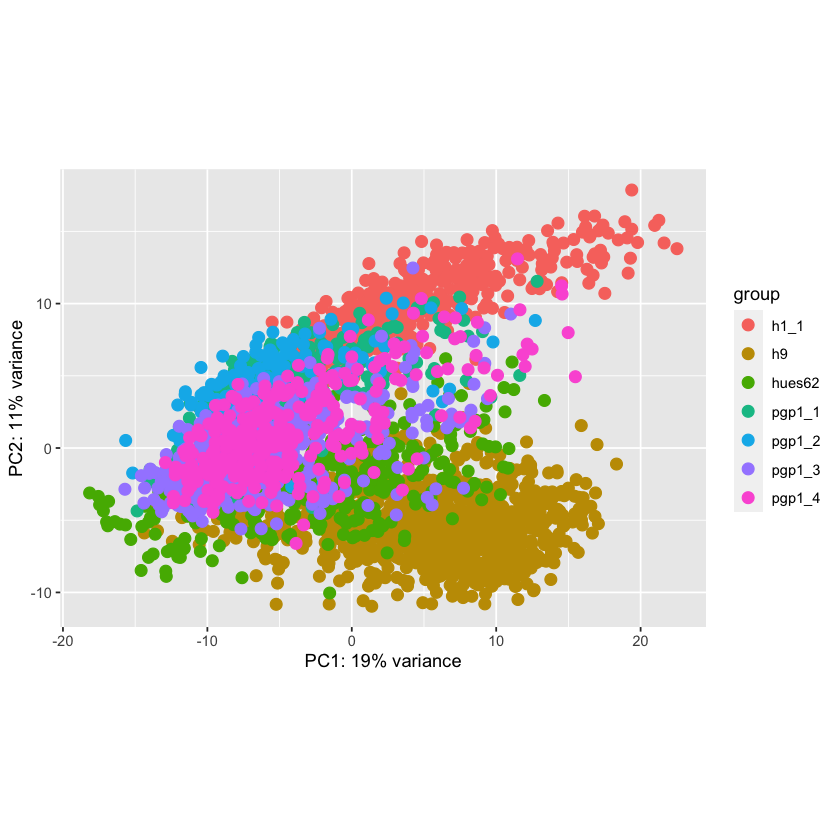

In [10]:
plotPCA(vsd_neurons, intgroup=c("orig.ident"))

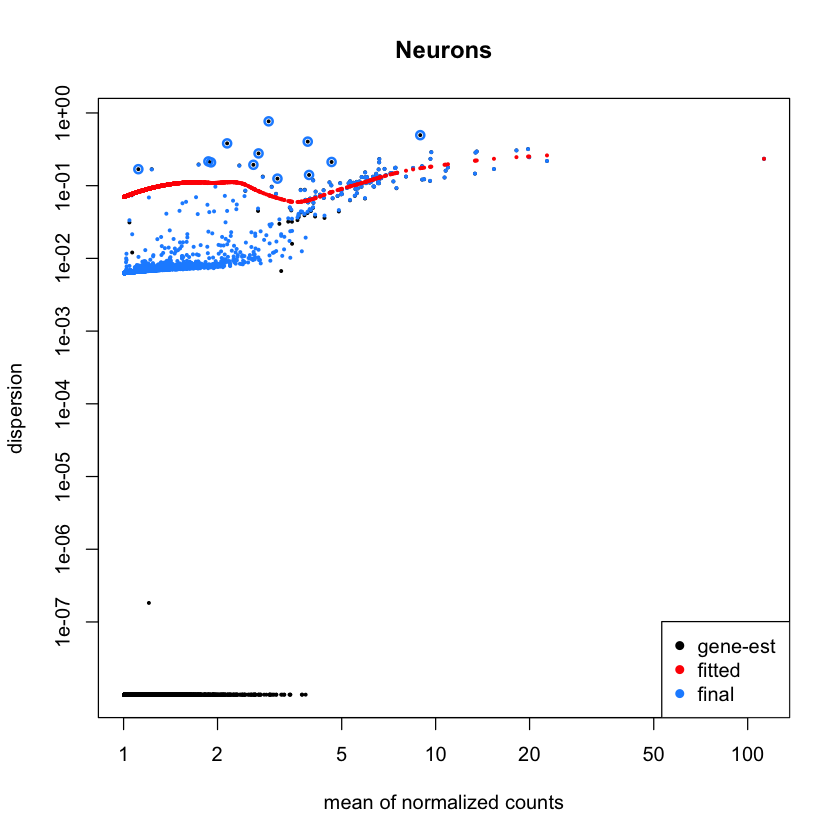

In [11]:
plotDispEsts(Neurons, main = "Neurons")

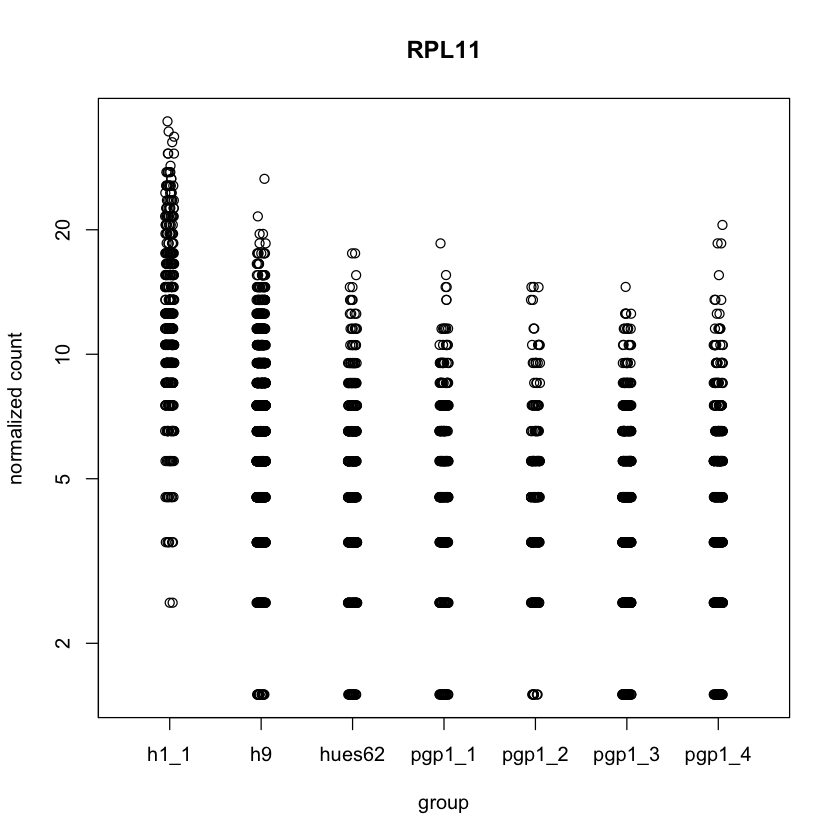

In [12]:
plotCounts(Neurons, gene=which.min(res_neurons$padj), intgroup="orig.ident")

### T cells

In [13]:
T_cells <- readRDS(file = "T_cell_deseq.rds")
T_cells

res_t <- results(T_cells)
saveRDS(res_t, file = "res_t.rds")
head(res_t)

class: DESeqDataSet 
dim: 25072 2270 
metadata(1): version
assays(4): counts mu H cooks
rownames(25072): AL627309.1 AL669831.5 ... LINC02573 BX004987.1
rowData names(31): baseMean baseVar ... deviance maxCooks
colnames(2270): AAACGAACAGCTTCGG-1_1 AAACGCTAGACTGAGC-1_1 ...
  TTTCAGTGTGGCATCC-1_7 TTTGTTGAGATGCAGC-1_7
colData names(11): orig.ident nCount_RNA ... cluster_id sizeFactor

log2 fold change (MLE): orig.ident pgp1 4 vs h1 1 
LRT p-value: '~ orig.ident' vs '~ 1' 
DataFrame with 6 rows and 6 columns
            baseMean log2FoldChange     lfcSE        stat    pvalue      padj
           <numeric>      <numeric> <numeric>   <numeric> <numeric> <numeric>
AL627309.1   1.00406   -0.003088654 0.0945732 0.002065494  1.000000        NA
AL669831.5   1.01820   -0.006836907 0.0941209 0.108173231  0.999975        NA
FAM87B       1.00362   -0.001235473 0.0945914 0.000330897  1.000000        NA
LINC00115    1.00936    0.000505036 0.0941925 0.031255914  0.999999        NA
FAM41C       1.00892   -0.008031628 0.0943858 0.035295767  0.999999        NA
AL645608.7   1.00362   -0.001235478 0.0945914 0.000330900  1.000000        NA

In [14]:
#Up and Down regulated genes
cat("Up-regulated Genes:")
row.names(res_t)[which(!is.na(res_t$log2FoldChange) & res_t$log2FoldChange > 1.0 & res_t$padj < 0.05)] 
cat("Down-regulated Genes:")
row.names(res_t)[which(!is.na(res_t$log2FoldChange) & res_t$log2FoldChange < -1.0 & res_t$pvalue < 0.05)]
#write.table(x, file, append = FALSE, sep = " ", dec = ".", row.names = TRUE, col.names = TRUE)

Up-regulated Genes:

[1] "ID3"      "JUN"      "COL3A1"   "SPARC"    "HIST1H4C" "MARCKS"  
 [7] "COL1A2"   "PTN"      "KCNQ1OT1" "LUM"      "DCN"      "FOS"     
[13] "COL1A1"   "TTR"      "ID1"      "FOSB"     "LGALS1"

Down-regulated Genes:

[1] "ENO1"     "SRM"      "RPL11"    "NDUFS5"   "YBX1"     "PRDX1"   
 [7] "UQCRH"    "TOMM20"   "RPS7"     "ODC1"     "RPS27A"   "SNRPG"   
[13] "ATP5MC3"  "HSPD1"    "HSPE1"    "PTMA"     "RPL14"    "RPL29"   
[19] "RPL22L1"  "H2AFZ"    "BTF3"     "RPS23"    "HINT1"    "NPM1"    
[25] "RPS18"    "HMGA1"    "HSP90AB1" "CHCHD2"   "DLX5"     "TMSB4X"  
[31] "FABP5"    "RPL12"    "RPL7A"    "LDHA"     "GSTP1"    "RPS3"    
[37] "PPA1"     "PGAM1"    "RPS26"    "TAC3"     "PEBP1"    "RAN"     
[43] "RPL36AL"  "SIX6"     "DLK1"     "SRP14"    "COX5A"    "NDUFB10" 
[49] "NDUFAB1"  "GCSH"     "APRT"     "C1QBP"    "EIF5A"    "RPL26"   
[55] "LHX1"     "RPL19"    "NME1"     "SNRPD1"   "NNAT"     "TIMM13"  
[61] "PDCD5"    "RPS4Y1"   "RANBP1"   "MT-CO2"   "MT-CYB"

In [15]:
ntd_t <- normTransform(T_cells)
vsd_t <- varianceStabilizingTransformation(T_cells)

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.



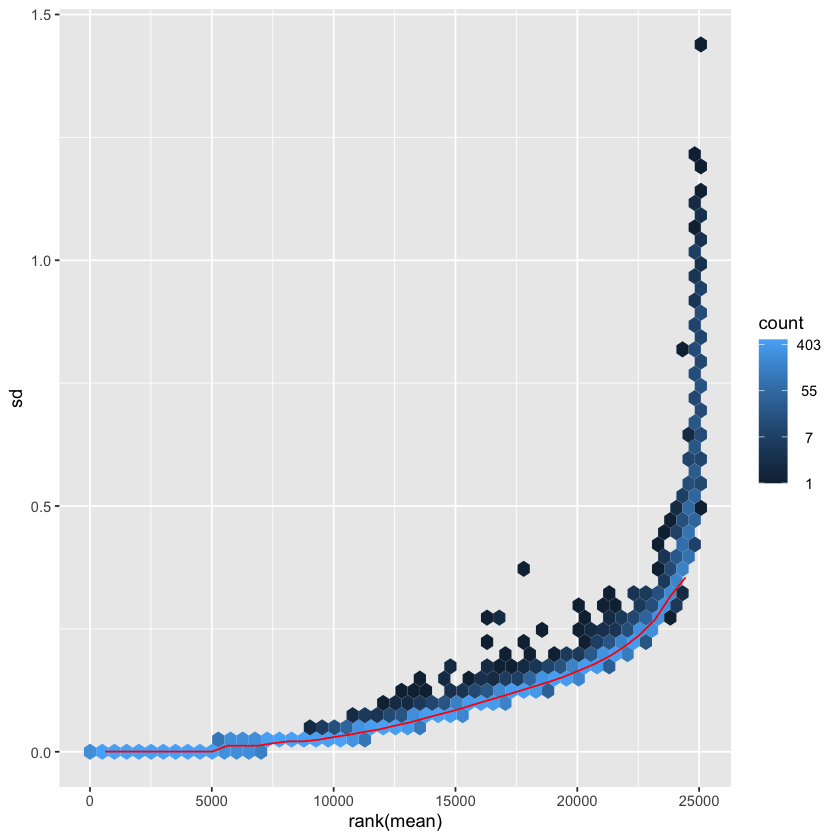

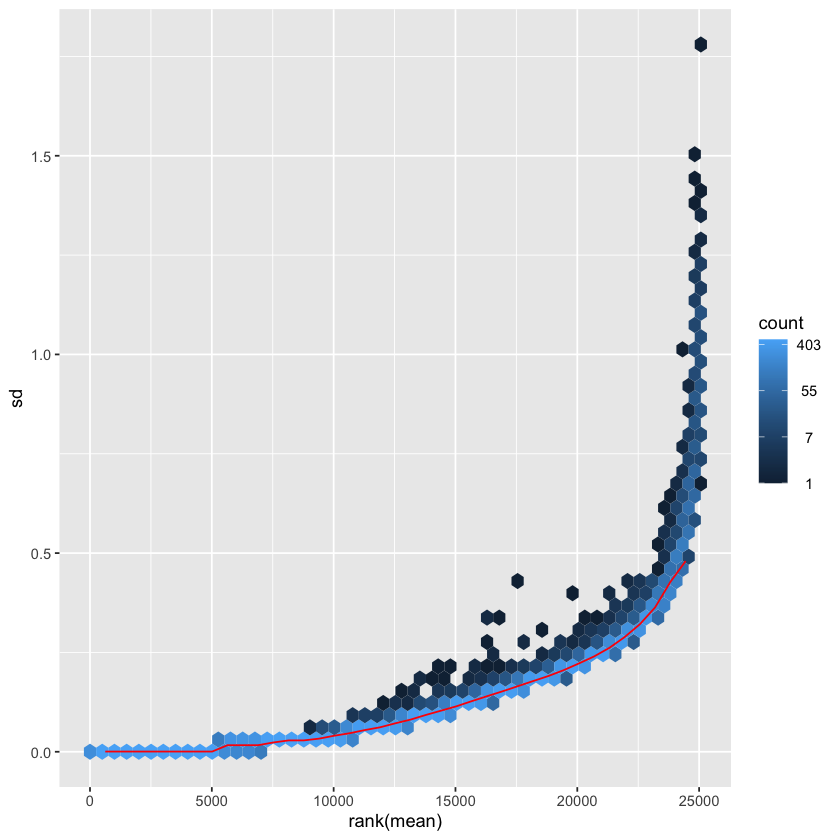

In [16]:
options(repr.plot.width = 7, repr.plot.height = 7)
meanSdPlot(assay(ntd_t))
meanSdPlot(assay(vsd_t))

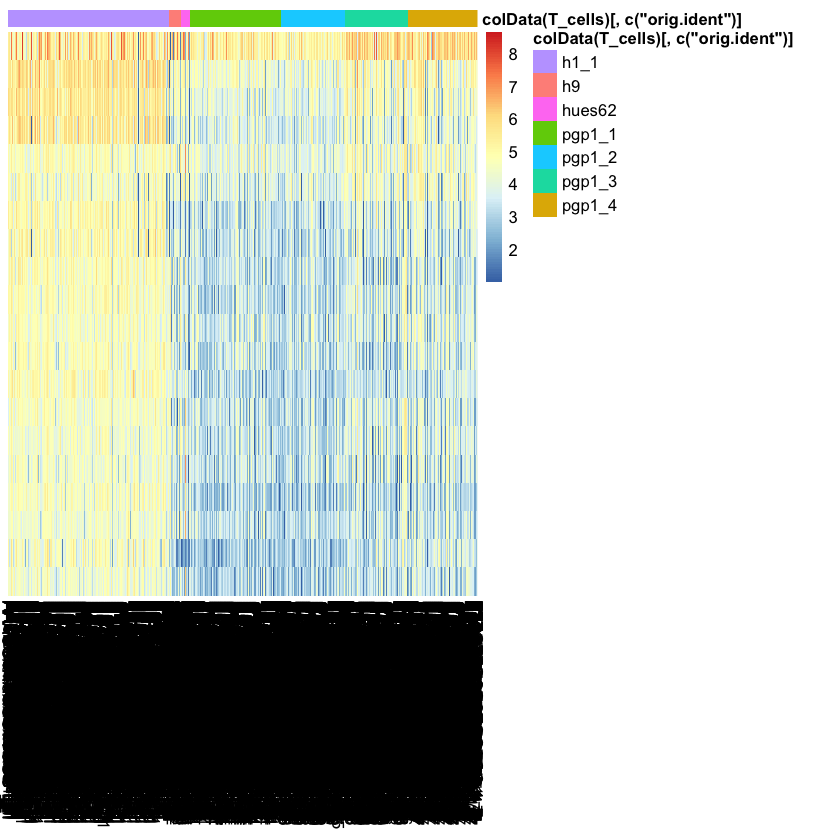

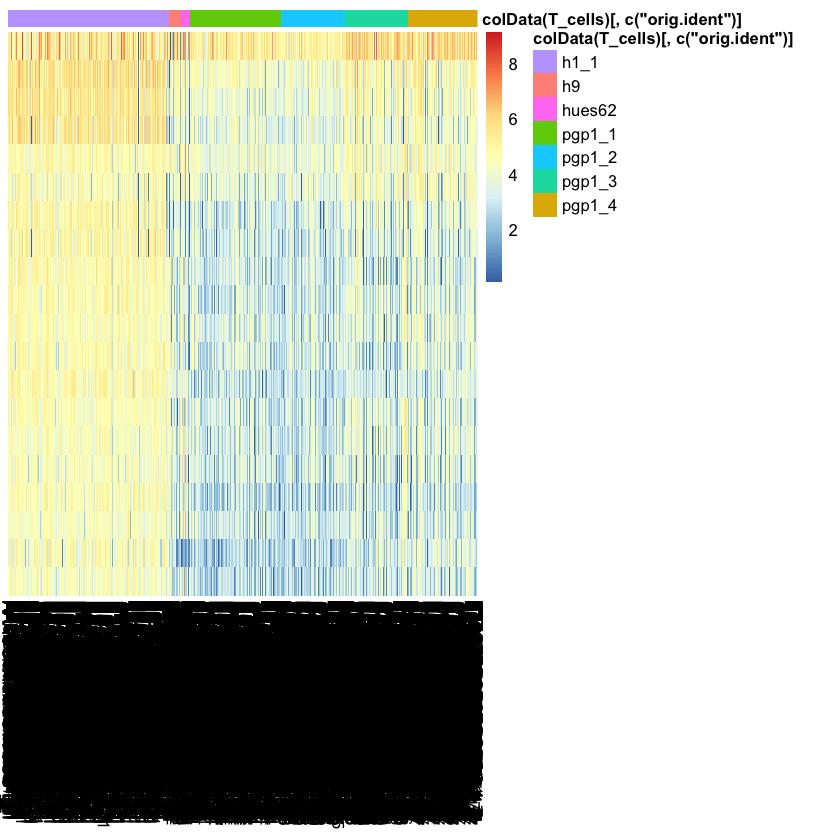

In [17]:
select_9 <- order(rowMeans(counts(T_cells,normalized=TRUE)), decreasing=TRUE)[1:20]
df_9 <- as.data.frame(colData(T_cells)[,c("orig.ident")])
row.names(df_9) <- colnames(ntd_t)

pheatmap(assay(ntd_t)[select_9,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df_9)

pheatmap(assay(vsd_t)[select_9,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df_9)

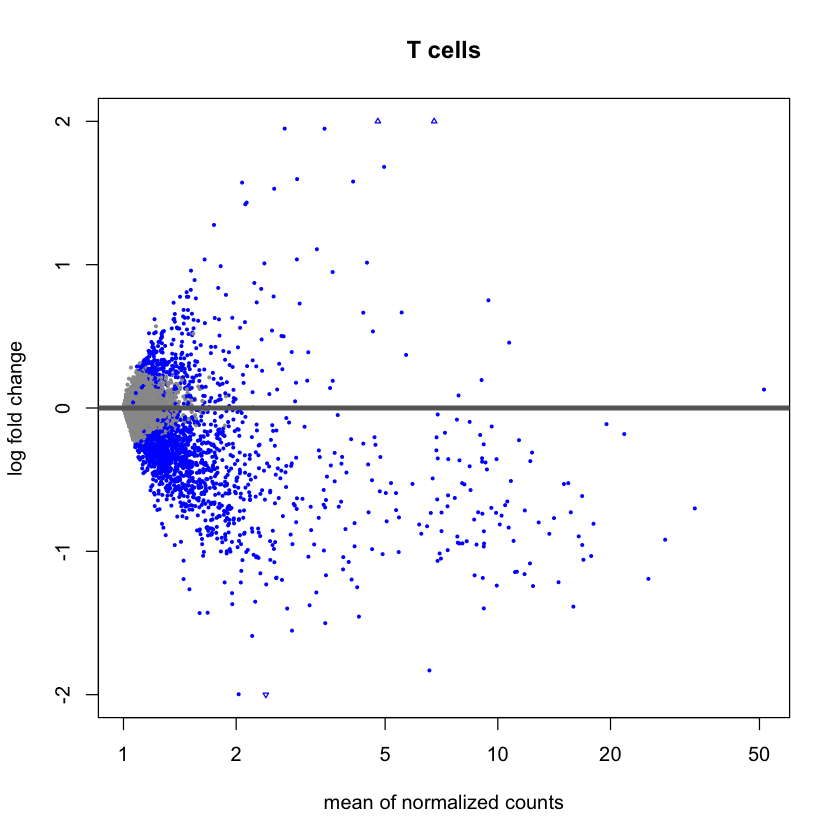

In [18]:
plotMA(res_t, ylim = c(-2,2), main = "T cells")

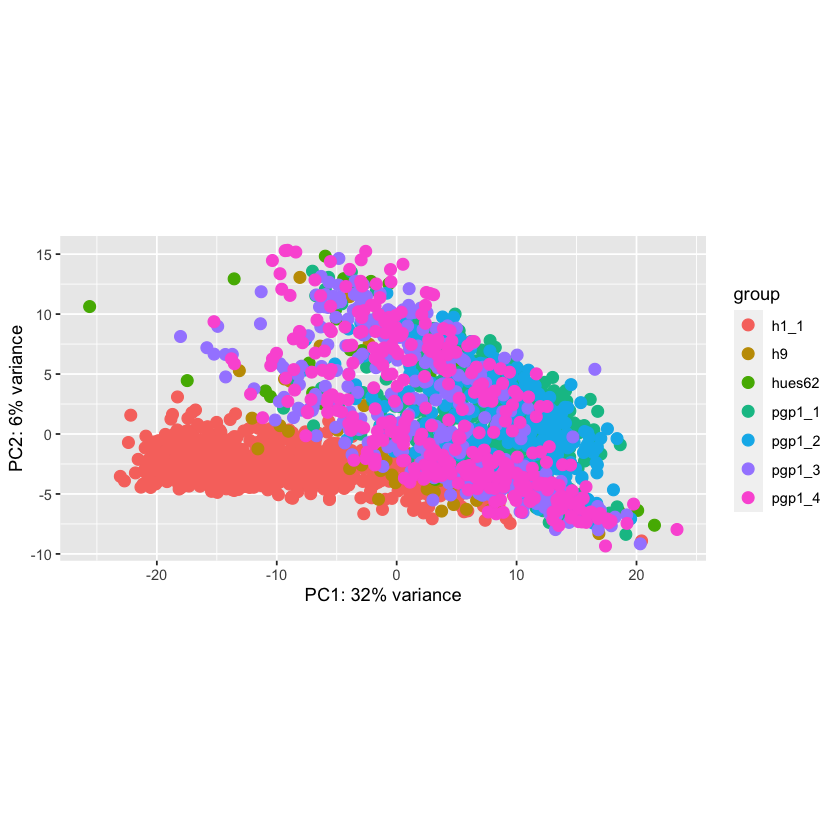

In [19]:
plotPCA(vsd_t, intgroup=c("orig.ident"))

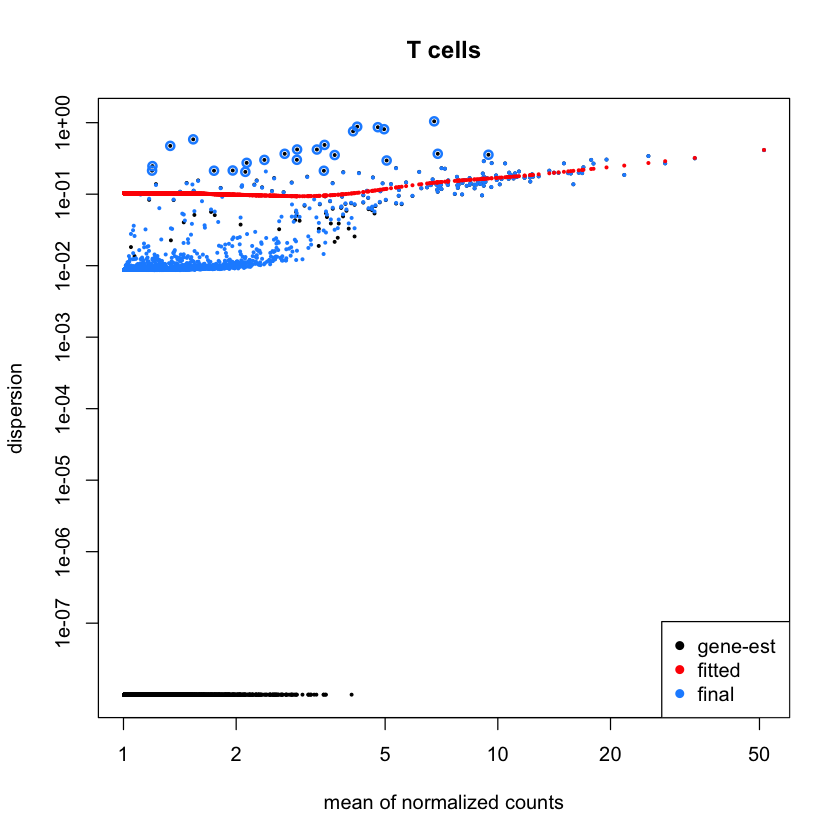

In [20]:
plotDispEsts(T_cells, main = "T cells")

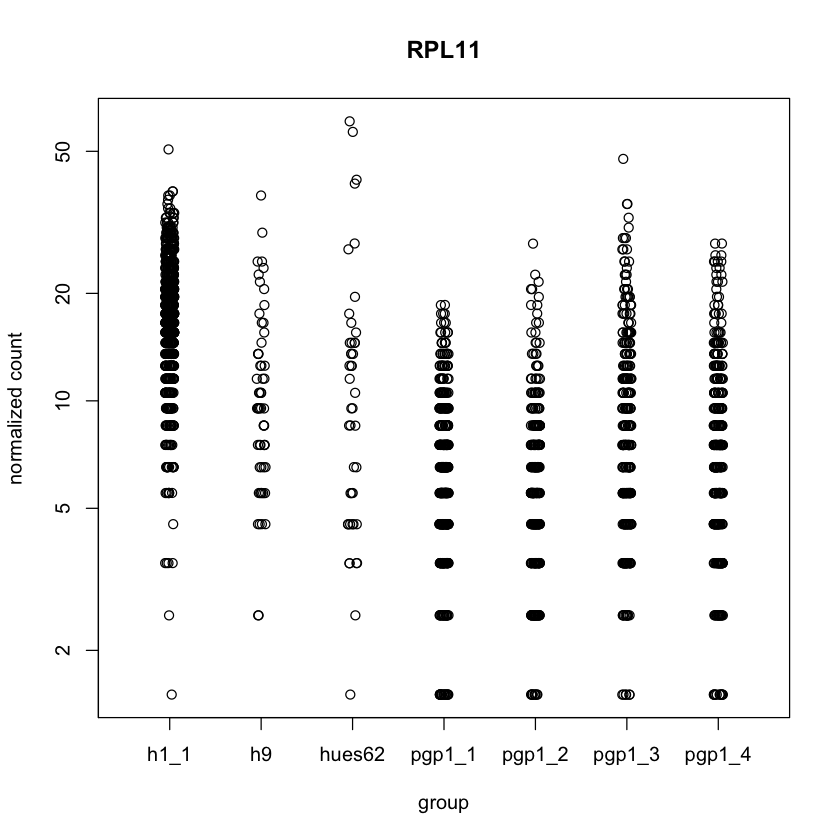

In [21]:
plotCounts(T_cells, gene=which.min(res_t$padj), intgroup="orig.ident")

### Visualizing all the cell clusters

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 7)
par(mfrow = c(5,2))

plotMA(res_tissue, ylim = c(-2,2), main = "Tissue Stem Cells")
plotMA(res_astrocytes, ylim = c(-2,2), main = "Astrocytes")
plotMA(res_chondrocytes, ylim = c(-2,2), main = "Chondrocytes")
plotMA(res_epithelial, ylim = c(-2,2), main = "Epithelial Cells")
plotMA(res_erythroblast, ylim = c(-2,2), main = "Erythroblasts")
plotMA(res_ips, ylim = c(-2,2), main = "iPS Cells")
plotMA(res_neuroepithelial, ylim = c(-2,2), main = "Neuroepithelial Cells")
plotMA(res_neurons, ylim = c(-2,2), main = "Neurons")
plotMA(res_t, ylim = c(-2,2), main = "T cells")

In [ ]:
#I tried to put titles but I couldn't - I will check it again 
options(repr.plot.width = 14, repr.plot.height = 13)
p1 = plotPCA(vsd_tissue, intgroup=c("orig.ident"))
p2 = plotPCA(vsd_astrocytes, intgroup=c("orig.ident"))
p3 = plotPCA(vsd_chondrocytes, intgroup=c("orig.ident"))
p4 = plotPCA(vsd_epithelial, intgroup=c("orig.ident"))
p5 = plotPCA(vsd_erythroblast, intgroup=c("orig.ident"))
p6 = plotPCA(vsd_ips, intgroup=c("orig.ident"))
p7 = plotPCA(vsd_neuroepithelial, intgroup=c("orig.ident"))
p8 = plotPCA(vsd_neurons, intgroup=c("orig.ident"))
p9 = plotPCA(vsd_t, intgroup=c("orig.ident"))

grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, p9 ncol = 2, nrow = 5)

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 7)
par(mfrow=c(5,2))

plotDispEsts(Tissue_stem_cells, main = "Tissue Stem Cells")
plotDispEsts(Astrocytes, main = "Astrocytes")
plotDispEsts(Chondrocytes, main = "Chondrocytes")
plotDispEsts(Epithelial_cells, main = "Epithelial Cells")
plotDispEsts(Erythroblasts, main = "Erythroblasts")
plotDispEsts(ips_cells, main = "iPS Cells")
plotDispEsts(Neuroepithelial_cells, main = "Neuroepithelial Cells")
plotDispEsts(Neurons, main = "Neurons")
plotDispEsts(T_cells, main = "T cells")

In [ ]:
#Also I am not sure exactly if its necessary to put titles since each plot indicates the gene with the smallest padj
options(repr.plot.width = 15, repr.plot.height = 7)
par(mfrow=c(5,2))

plotCounts(Tissue_stem_cells, gene=which.min(res_tissue$padj), intgroup="orig.ident")
plotCounts(Astrocytes, gene=which.min(res_astrocytes$padj), intgroup="orig.ident")
plotCounts(Chondrocytes, gene=which.min(res_chondrocytes$padj), intgroup="orig.ident")
plotCounts(Epithelial_cells, gene=which.min(res_epithelial$padj), intgroup="orig.ident")
plotCounts(Erythroblasts, gene=which.min(res_erythroblast$padj), intgroup="orig.ident")
plotCounts(ips_cells, gene=which.min(res_ips$padj), intgroup="orig.ident")
plotCounts(Neuroepithelial_cells, gene=which.min(res_neuroepithelial$padj), intgroup="orig.ident")
plotCounts(Neurons, gene=which.min(res_neurons$padj), intgroup="orig.ident")
plotCounts(T_cells, gene=which.min(res_t$padj), intgroup="orig.ident")

## Gene Enrichment Analysis

In [3]:
library(topGO)
library(ALL)
data(geneList)
data(ALL)
library(Rgraphviz)

Loading required package: graph

Loading required package: GO.db

Loading required package: AnnotationDbi


Attaching package: ‘AnnotationDbi’


The following object is masked from ‘package:dplyr’:

    select




Loading required package: SparseM


Attaching package: ‘SparseM’


The following object is masked from ‘package:base’:

    backsolve



groupGOTerms: 	GOBPTerm, GOMFTerm, GOCCTerm environments built.


Attaching package: ‘topGO’


The following object is masked from ‘package:IRanges’:

    members


Loading required package: grid


Attaching package: ‘grid’


The following object is masked from ‘package:topGO’:

    depth



Attaching package: ‘Rgraphviz’


The following objects are masked from ‘package:IRanges’:

    from, to


The following objects are masked from ‘package:S4Vectors’:

    from, to




In [4]:
affyLib <- paste(annotation(ALL), "db", sep = ".")
library(package = affyLib, character.only = TRUE)

Loading required package: org.Hs.eg.db







In [5]:
setwd("~/teratoma/res")

In [159]:
res_tissue <- readRDS(file = "./res_tissue.rds")
res_astrocytes <- readRDS(file = "./res_astrocytes.rds")
res_chondrocytes <- readRDS(file = "./res_chondrocytes.rds")
res_epithelial <- readRDS(file = "./res_epithelial.rds")
res_erythroblast <- readRDS(file = "./res_erythroblast.rds")
res_ips <- readRDS(file = "./res_ips.rds")
res_neuroepithelial <- readRDS(file = "./res_neuroepithelial.rds")
res_neurons <- readRDS(file = "./res_neurons.rds")
res_t <- readRDS(file = "./res_t.rds")

In [160]:
# Order by padj value
res_tissue_ord <- res_tissue[order(res_tissue$padj),]
res_astrocytes_ord <- res_astrocytes[order(res_astrocytes$padj),]
res_chondrocytes_ord <- res_chondrocytes[order(res_chondrocytes$padj),]
res_epithelial_ord <- res_epithelial[order(res_epithelial$padj),]
res_erythroblast_ord <- res_erythroblast[order(res_erythroblast$padj),]
res_ips_ord <- res_ips[order(res_ips$padj),]
res_neuroepithelial_ord <- res_neuroepithelial[order(res_neuroepithelial$padj),]
res_neurons_ord <- res_neurons[order(res_neurons$padj),]
res_t_ord <- res_t[order(res_t$padj),]

In [8]:
# colMap function for the plots
colMap <- function(x) {
  .col <- rep(rev(heat.colors(length(unique(x)))), time = table(x))
  return(.col[match(1:length(x), order(x))])
}

### Tissue Stem cells

In [167]:
genes <- rownames(res_tissue_ord)
p_values <- res_tissue_ord$pvalue
names(p_values) <- genes

p_values[p_values == 0] <- NA
p_values <- p_values[complete.cases(p_values)]

allGO2genes <- annFUN.org(whichOnto = "BP", feasibleGenes = NULL, mapping = "org.Hs.eg.db", ID = "symbol")
go_data <- new("topGOdata", ontology = "BP", allGenes = p_values, annot = annFUN.GO2genes, GO2genes = allGO2genes,
               geneSel = topDiffGenes, nodeSize = 10)


Building most specific GOs .....

	( 12206 GO terms found. )


Build GO DAG topology ..........

	( 15822 GO terms and 36050 relations. )


Annotating nodes ...............

	( 15441 genes annotated to the GO terms. )



In [168]:
resultFisher <- runTest(go_data, algorithm = "classic", statistic = "fisher")
resultKS <- runTest(go_data, algorithm = "classic", statistic = "ks")
resultKS.elim <- runTest(go_data, algorithm = "elim", statistic = "ks")


			 -- Classic Algorithm -- 

		 the algorithm is scoring 5711 nontrivial nodes
		 parameters: 
			 test statistic: fisher


			 -- Classic Algorithm -- 

		 the algorithm is scoring 6633 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 score order: increasing


			 -- Elim Algorithm -- 

		 the algorithm is scoring 6633 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 cutOff: 0.01
			 score order: increasing


	 Level 19:	1 nodes to be scored	(0 eliminated genes)


	 Level 18:	6 nodes to be scored	(0 eliminated genes)


	 Level 17:	11 nodes to be scored	(0 eliminated genes)


	 Level 16:	20 nodes to be scored	(0 eliminated genes)


	 Level 15:	47 nodes to be scored	(71 eliminated genes)


	 Level 14:	110 nodes to be scored	(85 eliminated genes)


	 Level 13:	167 nodes to be scored	(612 eliminated genes)


	 Level 12:	280 nodes to be scored	(2826 eliminated genes)


	 Level 11:	547 nodes to be scored	(4025 eliminated genes)


	 Level 10:	822 nodes to be scored	(5

In [169]:
results <- GenTable(go_data, classicFisher = resultFisher, 
                    classicKS = resultKS, elimKS = resultKS.elim, orderBy = "elimKS", 
                    ranksOf = "classicFisher", topNodes = 10)
results

GO.ID      Term                                        Annotated Significant
1  GO:0002181 cytoplasmic translation                      144      100        
2  GO:0006120 mitochondrial electron transport, NADH t...   43       13        
3  GO:0032981 mitochondrial respiratory chain complex ...   51       11        
4  GO:0006364 rRNA processing                              218       29        
5  GO:0043161 proteasome-mediated ubiquitin-dependent ...  403       31        
6  GO:0000398 mRNA splicing, via spliceosome               281       51        
7  GO:0045892 negative regulation of transcription, DN... 1166       92        
8  GO:0050821 protein stabilization                        177       35        
9  GO:0030199 collagen fibril organization                  58       23        
10 GO:0045893 positive regulation of transcription, DN... 1518      116        
   Expected Rank in classicFisher classicFisher classicKS elimKS 
1   8.93       1                  < 1e-30       < 1e-30   < 1e-30
2   2.67     271                  1.2e-06       7.5e-16   7.5e-16
3   3.16     550                  0.00024       2.2e-15   2.2e-15
4  13.53     481                  8.4e-05       5.1e-22   3.6e-14
5  25.00    2335                  0.12652       3.9e-26   8.6e-13
6  17.43      83                  3.1e-12       < 1e-30   1.6e-12
7  72.34    1128                  0.00935       1.6e-13   1.3e-11
8  10.98     131                  7.7e-10       2.1e-11   2.1e-11
9   3.60      59                  1.4e-13       4.5e-11   4.5e-11
10 94.18    1141                  0.00983       2.9e-13   1.0e-10

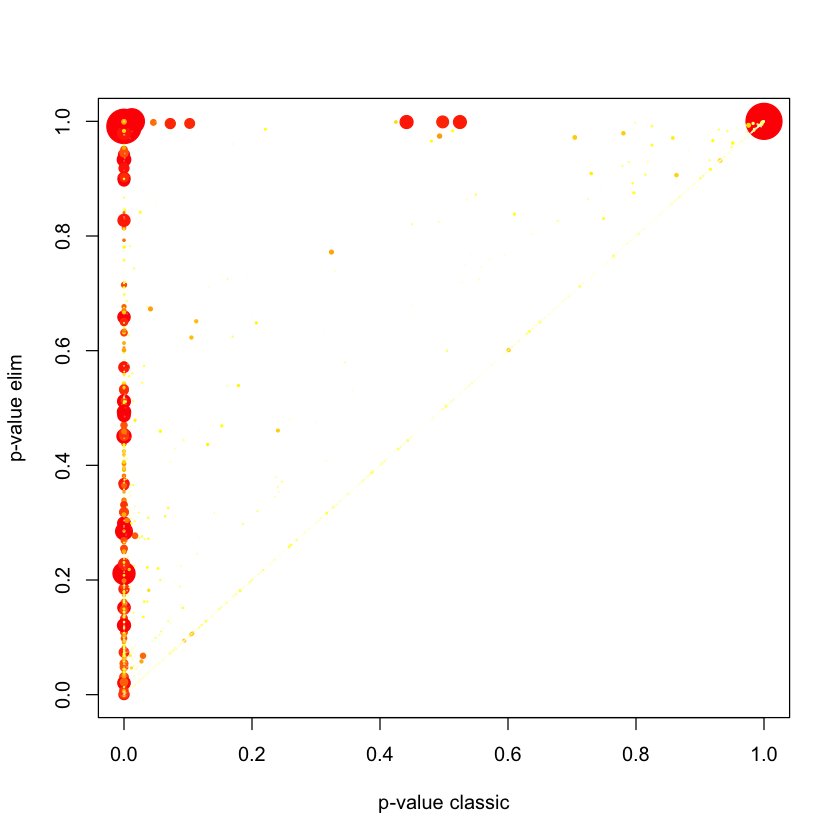

In [170]:
pValue.classic <- score(resultKS)
pValue.elim <- score(resultKS.elim)[names(pValue.classic)]
gstat <- termStat(go_data, names(pValue.classic))

gSize <- gstat$Annotated / max(gstat$Annotated) * 4
gCol <- colMap(gstat$Significant)
plot(pValue.classic, pValue.elim, xlab = "p-value classic", ylab = "p-value elim",
    pch = 19, cex = gSize, col = gCol)

In [171]:
tiff("tissue_stem_cells.tiff", width = 6, height = 6, units = 'in', res = 500)
showSigOfNodes(go_data, score(resultKS.elim), firstSigNodes = 5, useInfo = 'all')
dev.off()

$dag
A graphNEL graph with directed edges
Number of Nodes = 79 
Number of Edges = 132 

$complete.dag
[1] "A graph with 79 nodes."


pdf 
  2

### Astrocytes

In [112]:
#I didn't give different names because GO is faster than DE
genes <- rownames(res_astrocytes_ord)
p_values <- res_astrocytes_ord$pvalue
names(p_values) <- genes

p_values[p_values == 0] <- NA
p_values <- p_values[complete.cases(p_values)]

allGO2genes <- annFUN.org(whichOnto = "BP", feasibleGenes = NULL, mapping = "org.Hs.eg.db", ID = "symbol")
go_data <- new("topGOdata", ontology = "BP", allGenes = p_values, annot = annFUN.GO2genes, GO2genes = allGO2genes,
               geneSel = topDiffGenes, nodeSize = 10)


Building most specific GOs .....

	( 12196 GO terms found. )


Build GO DAG topology ..........

	( 15814 GO terms and 36029 relations. )


Annotating nodes ...............

	( 15410 genes annotated to the GO terms. )



In [113]:
# resultFisher <- runTest(go_data, algorithm = "classic", statistic = "fisher")
# resultKS <- runTest(go_data, algorithm = "classic", statistic = "ks")
resultKS.elim <- runTest(go_data, algorithm = "elim", statistic = "ks")


			 -- Elim Algorithm -- 

		 the algorithm is scoring 6626 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 cutOff: 0.01
			 score order: increasing


	 Level 19:	1 nodes to be scored	(0 eliminated genes)


	 Level 18:	6 nodes to be scored	(0 eliminated genes)


	 Level 17:	11 nodes to be scored	(0 eliminated genes)


	 Level 16:	20 nodes to be scored	(0 eliminated genes)


	 Level 15:	47 nodes to be scored	(99 eliminated genes)


	 Level 14:	110 nodes to be scored	(290 eliminated genes)


	 Level 13:	166 nodes to be scored	(736 eliminated genes)


	 Level 12:	280 nodes to be scored	(2815 eliminated genes)


	 Level 11:	545 nodes to be scored	(4501 eliminated genes)


	 Level 10:	823 nodes to be scored	(5601 eliminated genes)


	 Level 9:	1017 nodes to be scored	(6750 eliminated genes)


	 Level 8:	1008 nodes to be scored	(8258 eliminated genes)


	 Level 7:	967 nodes to be scored	(9611 eliminated genes)


	 Level 6:	768 nodes to be scored	(10421 eliminated genes)


	 Leve

In [114]:
results <- GenTable(go_data, classicFisher = resultFisher, 
                    classicKS = resultKS, elimKS = resultKS.elim, orderBy = "elimKS", 
                    ranksOf = "classicFisher", topNodes = 10)
results

GO.ID      Term                                        Annotated Significant
1  GO:0002181 cytoplasmic translation                      123       80        
2  GO:0006120 mitochondrial electron transport, NADH t...   43       26        
3  GO:0000122 negative regulation of transcription by ...  864       92        
4  GO:0000398 mRNA splicing, via spliceosome               281       71        
5  GO:0043161 proteasome-mediated ubiquitin-dependent ...  401       35        
6  GO:0032981 mitochondrial respiratory chain complex ...   51       28        
7  GO:0045944 positive regulation of transcription by ... 1125      138        
8  GO:0042776 mitochondrial ATP synthesis coupled prot...   14       13        
9  GO:0008380 RNA splicing                                 391       86        
10 GO:0050821 protein stabilization                        174       33        
   Expected Rank in classicFisher classicFisher classicKS elimKS 
1   9.89     1                    1             4.3e-25   < 1e-30
2   3.46     2                    1             0.81      4.8e-18
3  69.47     3                    1             0.53      3.7e-14
4  22.59     4                    1             0.99      6.6e-14
5  32.24     5                    1             0.92      1.1e-13
6   4.10     6                    1             0.62      1.2e-13
7  90.45     7                    1             0.22      1.9e-11
8   1.13     8                    1             0.99      4.8e-10
9  31.44     9                    1             0.98      1.9e-09
10 13.99    10                    1             0.25      2.1e-09

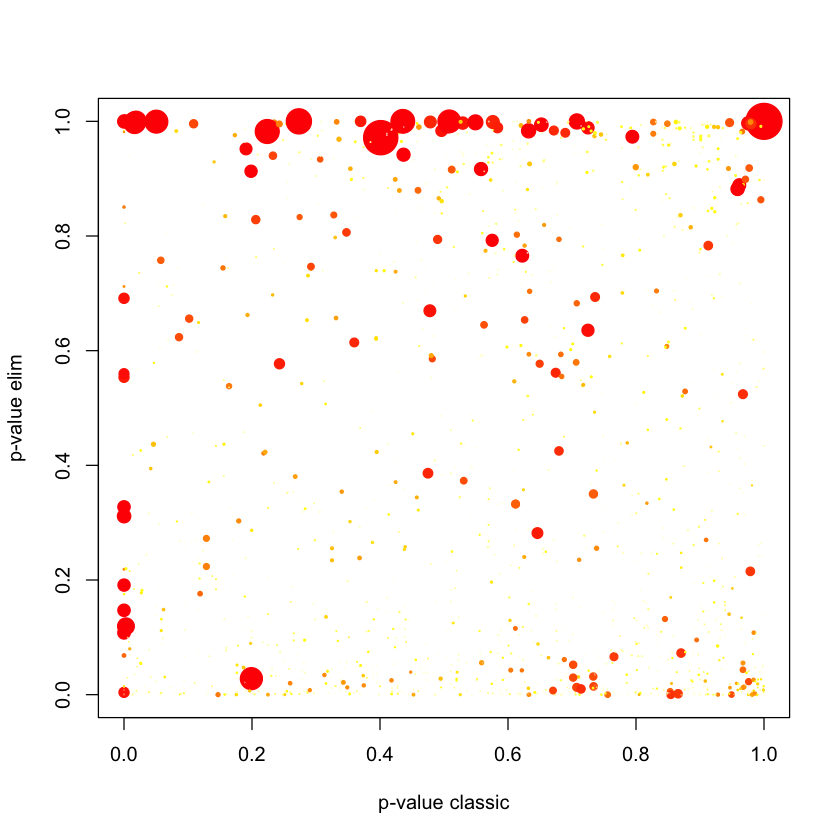

In [115]:
pValue.classic <- score(resultKS)
pValue.elim <- score(resultKS.elim)[names(pValue.classic)]
gstat <- termStat(go_data, names(pValue.classic))

gSize <- gstat$Annotated / max(gstat$Annotated) * 4
gCol <- colMap(gstat$Significant)
plot(pValue.classic, pValue.elim, xlab = "p-value classic", ylab = "p-value elim",
    pch = 19, cex = gSize, col = gCol)

In [116]:
sel.go <- names(pValue.classic)[pValue.elim < pValue.classic]
cbind(termStat(go_data, sel.go),
    elim = pValue.elim[sel.go],
    classic = pValue.classic[sel.go])

Annotated Significant Expected elim         classic   
GO:0000028  16        10          1.29    4.206476e-06 0.01608269
GO:0000070 163        16         13.11    1.533706e-02 0.90561332
GO:0000082 181        17         14.55    1.492273e-05 0.54341853
GO:0000122 864        92         69.47    3.710915e-14 0.52541713
GO:0000165 718        65         57.73    4.798450e-01 0.84801227
GO:0000209 227        14         18.25    1.607249e-04 0.83453376
GO:0000226 580        53         46.63    1.578892e-01 0.63257409
GO:0000278 831        87         66.81    5.167578e-02 0.17661344
GO:0000281  70        11          5.63    1.011234e-02 0.86998284
GO:0000375 285        71         22.91    1.252494e-02 0.99022391
GO:0000380  74        23          5.95    7.316833e-05 0.76036945
GO:0000398 281        71         22.59    6.582693e-14 0.99022391
GO:0000723 129        25         10.37    2.415309e-01 0.99135949
GO:0000819 189        20         15.20    1.811550e-03 0.86981936
GO:0000902 969       126         77.91    4.391602e-01 0.78635225
GO:0000904 685       104         55.08    1.696150e-01 0.85437814
GO:0000910 149        19         11.98    2.046898e-01 0.91619289
GO:0000956 111        17          8.92    1.408926e-02 0.78166157
GO:0001101 125        20         10.05    1.774660e-02 0.64751568
GO:0001501 484        42         38.91    1.311428e-01 0.44002635
GO:0001503 383        47         30.79    4.793590e-01 0.62378733
GO:0001525 482        53         38.75    2.788778e-01 0.55568102
GO:0001558 392        48         31.52    1.642227e-03 0.42779605
GO:0001568 646        73         51.94    1.954850e-02 0.31566274
GO:0001649 208        27         16.72    1.990802e-04 0.39827808
GO:0001654 358        46         28.78    2.674713e-01 0.56963520
GO:0001655 332        29         26.69    7.787846e-02 0.77736138
GO:0001659 171        16         13.75    6.673831e-01 0.83752757
GO:0001666 291        35         23.40    3.065016e-03 0.56876338
GO:0001667 398        45         32.00    1.183617e-01 0.62304271
⋮          ⋮         ⋮           ⋮        ⋮            ⋮         
GO:1990138  171       30          13.75   0.009016003  0.5969584 
GO:1990542   96       22           7.72   0.004953943  0.9748909 
GO:1990748  100       19           8.04   0.023345828  0.4738328 
GO:1990778  323       26          25.97   0.026412185  0.9004130 
GO:1990823   89       17           7.16   0.410778435  0.7666982 
GO:1990830   88       17           7.08   0.008755391  0.7366526 
GO:1990845  156       15          12.54   0.518594840  0.9479499 
GO:1990874   57        7           4.58   0.199818096  0.5780796 
GO:2000026 1221      126          98.17   0.540352346  0.7175607 
GO:2000027  125       15          10.05   0.387002792  0.9125924 
GO:2000045  111       12           8.92   0.020527003  0.4866020 
GO:2000112 3559      361         286.15   0.009981808  0.7141154 
GO:2000113 1384      169         111.28   0.016188008  0.3746391 
GO:2000116  219       30          17.61   0.099273736  0.1992629 
GO:2000145  899       95          72.28   0.253254145  0.4380805 
GO:2000146  269       35          21.63   0.110223711  0.3790513 
GO:2000147  521       55          41.89   0.114684507  0.4207038 
GO:2000177   84       22           6.75   0.001002054  0.6780181 
GO:2000278  103       18           8.28   0.046184427  0.8809895 
GO:2000377  143       20          11.50   0.182234669  0.8071878 
GO:2000573   66       14           5.31   0.106923559  0.6815995 
GO:2001020  213       20          17.13   0.002914465  0.2009036 
GO:2001056  139       19          11.18   0.092167005  0.5890674 
GO:2001141 3098      286         249.09   0.052182865  0.7018279 
GO:2001233  333       50          26.77   0.111257936  0.3826762 
GO:2001234  214       34          17.21   0.012135667  0.5162642 
GO:2001236  147       17          11.82   0.153432601  0.7120421 
GO:2001237   94       13           7.56   0.007007976  0.6362481 
GO:2001243   92       18           7.40   0.0015241

In [117]:
tiff("astrocytes.tiff", width = 6, height = 6, units = 'in', res = 500)
showSigOfNodes(go_data, score(resultKS.elim), firstSigNodes = 5, useInfo = 'all')
dev.off()

$dag
A graphNEL graph with directed edges
Number of Nodes = 110 
Number of Edges = 238 

$complete.dag
[1] "A graph with 110 nodes."


pdf 
  2

### Chondrocytes

In [118]:
genes <- rownames(res_chondrocytes_ord)
p_values <- res_chondrocytes_ord$pvalue
names(p_values) <- genes

p_values[p_values == 0] <- NA
p_values <- p_values[complete.cases(p_values)]

allGO2genes <- annFUN.org(whichOnto = "BP", feasibleGenes = NULL, mapping = "org.Hs.eg.db", ID = "symbol")
go_data <- new("topGOdata", ontology = "BP", allGenes = p_values, annot = annFUN.GO2genes, GO2genes = allGO2genes,
               geneSel = topDiffGenes, nodeSize = 10)


Building most specific GOs .....

	( 12174 GO terms found. )


Build GO DAG topology ..........

	( 15791 GO terms and 35975 relations. )


Annotating nodes ...............

	( 15321 genes annotated to the GO terms. )



In [119]:
resultFisher <- runTest(go_data, algorithm = "classic", statistic = "fisher")
resultKS <- runTest(go_data, algorithm = "classic", statistic = "ks")
resultKS.elim <- runTest(go_data, algorithm = "elim", statistic = "ks")


			 -- Classic Algorithm -- 

		 the algorithm is scoring 6372 nontrivial nodes
		 parameters: 
			 test statistic: fisher


			 -- Classic Algorithm -- 

		 the algorithm is scoring 6607 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 score order: increasing


			 -- Elim Algorithm -- 

		 the algorithm is scoring 6607 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 cutOff: 0.01
			 score order: increasing


	 Level 19:	1 nodes to be scored	(0 eliminated genes)


	 Level 18:	6 nodes to be scored	(0 eliminated genes)


	 Level 17:	11 nodes to be scored	(0 eliminated genes)


	 Level 16:	18 nodes to be scored	(18 eliminated genes)


	 Level 15:	47 nodes to be scored	(72 eliminated genes)


	 Level 14:	107 nodes to be scored	(231 eliminated genes)


	 Level 13:	166 nodes to be scored	(633 eliminated genes)


	 Level 12:	278 nodes to be scored	(2706 eliminated genes)


	 Level 11:	543 nodes to be scored	(4649 eliminated genes)


	 Level 10:	818 nodes to be scored	

In [120]:
results <- GenTable(go_data, classicFisher = resultFisher, 
                    classicKS = resultKS, elimKS = resultKS.elim, orderBy = "elimKS", 
                    ranksOf = "classicFisher", topNodes = 10)
results

GO.ID      Term                                        Annotated Significant
1  GO:0006120 mitochondrial electron transport, NADH t...   42       33        
2  GO:0002181 cytoplasmic translation                       95       61        
3  GO:0032981 mitochondrial respiratory chain complex ...   50       33        
4  GO:0045892 negative regulation of transcription, DN... 1157      261        
5  GO:0043161 proteasome-mediated ubiquitin-dependent ...  401       94        
6  GO:0000398 mRNA splicing, via spliceosome               279      115        
7  GO:0050821 protein stabilization                        171       55        
8  GO:0045944 positive regulation of transcription by ... 1114      244        
9  GO:0006364 rRNA processing                              203       50        
10 GO:0051301 cell division                                569      127        
   Expected Rank in classicFisher classicFisher classicKS elimKS 
1    6.74    59                   4.9e-19       4.9e-17   4.9e-17
2   15.23    16                   4.0e-26       1.1e-21   4.4e-16
3    8.02    85                   2.8e-15       2.8e-13   2.8e-13
4  185.55   181                   1.1e-09       4.3e-18   9.1e-13
5   64.31   559                   6.2e-05       9.0e-24   2.9e-12
6   44.74    26                   3.5e-24       3.4e-28   2.0e-11
7   27.42   270                   1.2e-07       1.1e-10   1.1e-10
8  178.65   250                   6.0e-08       9.5e-13   8.6e-10
9   32.55   826                   0.00097       2.7e-17   1.4e-09
10  91.25   520                   4.1e-05       3.5e-11   2.8e-09

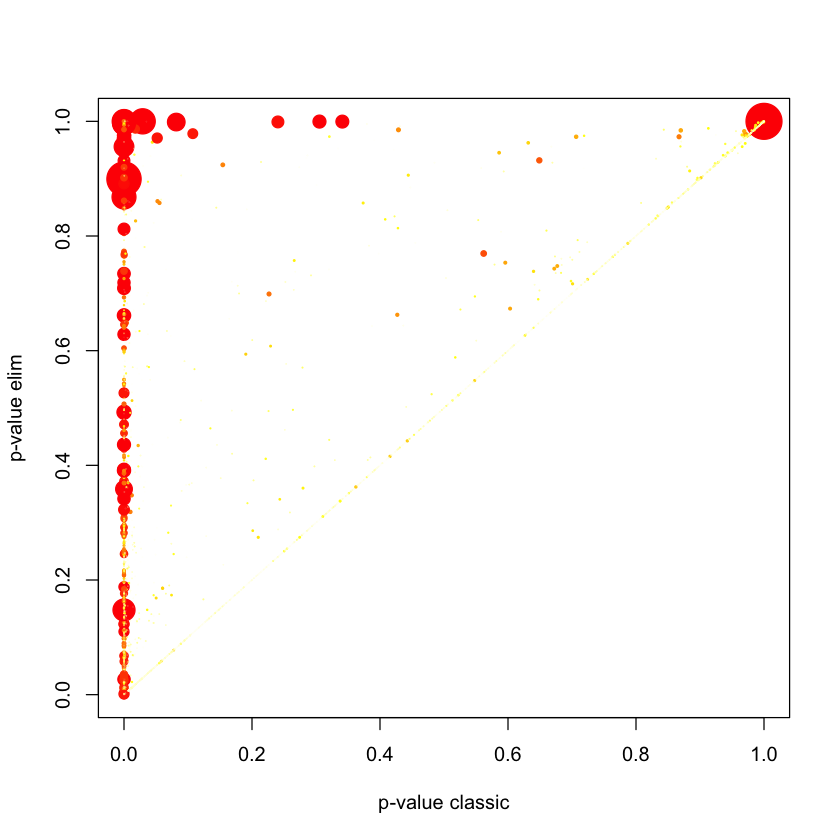

In [121]:
pValue.classic <- score(resultKS)
pValue.elim <- score(resultKS.elim)[names(pValue.classic)]
gstat <- termStat(go_data, names(pValue.classic))

gSize <- gstat$Annotated / max(gstat$Annotated) * 4
gCol <- colMap(gstat$Significant)
plot(pValue.classic, pValue.elim, xlab = "p-value classic", ylab = "p-value elim",
    pch = 19, cex = gSize, col = gCol)

In [122]:
tiff("chondrocytes.tiff", width = 6, height = 6, units = 'in', res = 500)
showSigOfNodes(go_data, score(resultKS.elim), firstSigNodes = 5, useInfo = 'all')
dev.off()

$dag
A graphNEL graph with directed edges
Number of Nodes = 112 
Number of Edges = 238 

$complete.dag
[1] "A graph with 112 nodes."


pdf 
  2

### Epithelial Cells

In [123]:
genes <- rownames(res_epithelial_ord)
p_values <- res_epithelial_ord$pvalue
names(p_values) <- genes

p_values[p_values == 0] <- NA
p_values <- p_values[complete.cases(p_values)]

allGO2genes <- annFUN.org(whichOnto = "BP", feasibleGenes = NULL, mapping = "org.Hs.eg.db", ID = "symbol")
go_data <- new("topGOdata", ontology = "BP", allGenes = p_values, annot = annFUN.GO2genes, GO2genes = allGO2genes,
               geneSel = topDiffGenes, nodeSize = 10)


Building most specific GOs .....

	( 12199 GO terms found. )


Build GO DAG topology ..........

	( 15815 GO terms and 36031 relations. )


Annotating nodes ...............

	( 15424 genes annotated to the GO terms. )



In [124]:
resultFisher <- runTest(go_data, algorithm = "classic", statistic = "fisher")
resultKS <- runTest(go_data, algorithm = "classic", statistic = "ks")
resultKS.elim <- runTest(go_data, algorithm = "elim", statistic = "ks")


			 -- Classic Algorithm -- 

		 the algorithm is scoring 6012 nontrivial nodes
		 parameters: 
			 test statistic: fisher


			 -- Classic Algorithm -- 

		 the algorithm is scoring 6627 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 score order: increasing


			 -- Elim Algorithm -- 

		 the algorithm is scoring 6627 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 cutOff: 0.01
			 score order: increasing


	 Level 19:	1 nodes to be scored	(0 eliminated genes)


	 Level 18:	6 nodes to be scored	(0 eliminated genes)


	 Level 17:	11 nodes to be scored	(0 eliminated genes)


	 Level 16:	19 nodes to be scored	(0 eliminated genes)


	 Level 15:	47 nodes to be scored	(80 eliminated genes)


	 Level 14:	110 nodes to be scored	(110 eliminated genes)


	 Level 13:	167 nodes to be scored	(677 eliminated genes)


	 Level 12:	280 nodes to be scored	(2855 eliminated genes)


	 Level 11:	546 nodes to be scored	(3999 eliminated genes)


	 Level 10:	822 nodes to be scored	(

In [125]:
results <- GenTable(go_data, classicFisher = resultFisher, 
                    classicKS = resultKS, elimKS = resultKS.elim, orderBy = "elimKS", 
                    ranksOf = "classicFisher", topNodes = 10)
results

GO.ID      Term                                        Annotated Significant
1  GO:0002181 cytoplasmic translation                      143      100        
2  GO:0006120 mitochondrial electron transport, NADH t...   43       30        
3  GO:0032981 mitochondrial respiratory chain complex ...   51       29        
4  GO:0050821 protein stabilization                        176       45        
5  GO:0006457 protein folding                              189       58        
6  GO:0051301 cell division                                576       75        
7  GO:0042776 mitochondrial ATP synthesis coupled prot...   14       13        
8  GO:0006364 rRNA processing                              218       36        
9  GO:0045892 negative regulation of transcription, DN... 1166      135        
10 GO:0000398 mRNA splicing, via spliceosome               281       64        
   Expected Rank in classicFisher classicFisher classicKS elimKS 
1   13.68     1                   < 1e-30       < 1e-30   < 1e-30
2    4.11    20                   2.2e-21       2.7e-21   2.7e-21
3    4.88    34                   4.2e-17       1.4e-14   1.4e-14
4   16.84    96                   5.4e-10       6.1e-12   6.1e-12
5   18.09    39                   2.7e-16       7.2e-19   7.4e-11
6   55.12   704                   0.00355       1.4e-13   1.6e-10
7    1.34    58                   6.9e-13       9.0e-10   9.0e-10
8   20.86   515                   0.00082       3.2e-14   1.2e-09
9  111.58   872                   0.01008       8.2e-12   3.9e-09
10  26.89    71                   3.1e-11       2.2e-23   6.9e-09

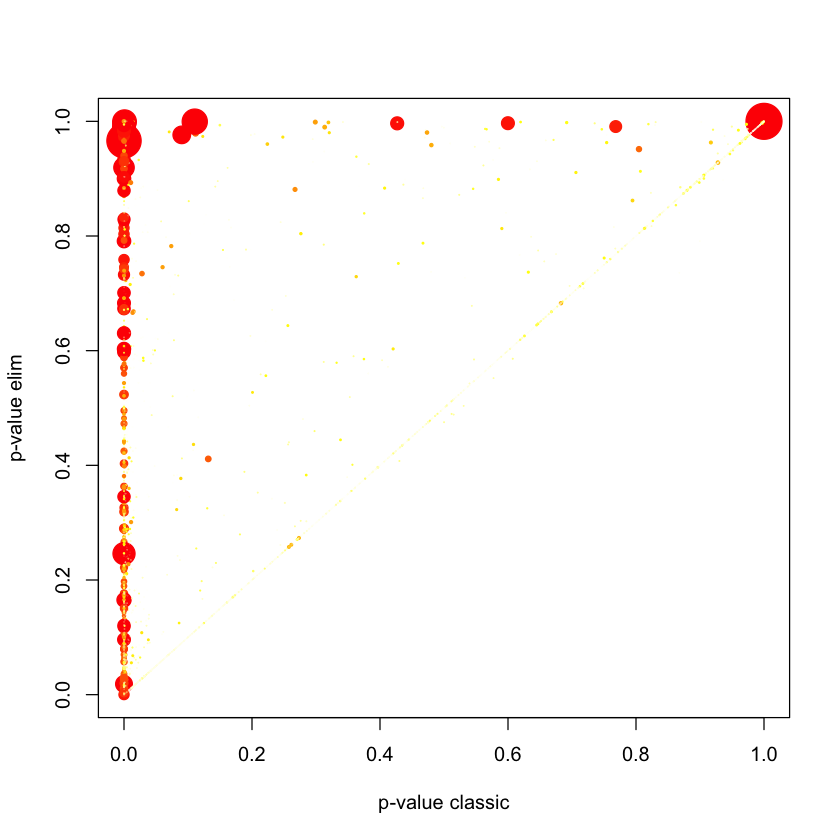

In [126]:
pValue.classic <- score(resultKS)
pValue.elim <- score(resultKS.elim)[names(pValue.classic)]
gstat <- termStat(go_data, names(pValue.classic))

gSize <- gstat$Annotated / max(gstat$Annotated) * 4
gCol <- colMap(gstat$Significant)
plot(pValue.classic, pValue.elim, xlab = "p-value classic", ylab = "p-value elim",
    pch = 19, cex = gSize, col = gCol)

In [127]:
tiff("epithelial_cells.tiff", width = 6, height = 6, units = 'in', res = 500)
showSigOfNodes(go_data, score(resultKS.elim), firstSigNodes = 5, useInfo = 'all')
dev.off()

$dag
A graphNEL graph with directed edges
Number of Nodes = 56 
Number of Edges = 86 

$complete.dag
[1] "A graph with 56 nodes."


pdf 
  2

### Erythroblasts

In [128]:
genes <- rownames(res_erythroblast_ord)
p_values <- res_erythroblast_ord$pvalue
names(p_values) <- genes

p_values[p_values == 0] <- NA
p_values <- p_values[complete.cases(p_values)]

allGO2genes <- annFUN.org(whichOnto = "BP", feasibleGenes = NULL, mapping = "org.Hs.eg.db", ID = "symbol")
go_data <- new("topGOdata", ontology = "BP", allGenes = p_values, annot = annFUN.GO2genes, GO2genes = allGO2genes,
               geneSel = topDiffGenes, nodeSize = 10)


Building most specific GOs .....

	( 12170 GO terms found. )


Build GO DAG topology ..........

	( 15793 GO terms and 35972 relations. )


Annotating nodes ...............

	( 15317 genes annotated to the GO terms. )



In [129]:
resultFisher <- runTest(go_data, algorithm = "classic", statistic = "fisher")
resultKS <- runTest(go_data, algorithm = "classic", statistic = "ks")
resultKS.elim <- runTest(go_data, algorithm = "elim", statistic = "ks")


			 -- Classic Algorithm -- 

		 the algorithm is scoring 6235 nontrivial nodes
		 parameters: 
			 test statistic: fisher


			 -- Classic Algorithm -- 

		 the algorithm is scoring 6604 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 score order: increasing


			 -- Elim Algorithm -- 

		 the algorithm is scoring 6604 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 cutOff: 0.01
			 score order: increasing


	 Level 19:	1 nodes to be scored	(0 eliminated genes)


	 Level 18:	6 nodes to be scored	(0 eliminated genes)


	 Level 17:	11 nodes to be scored	(0 eliminated genes)


	 Level 16:	19 nodes to be scored	(0 eliminated genes)


	 Level 15:	47 nodes to be scored	(80 eliminated genes)


	 Level 14:	106 nodes to be scored	(289 eliminated genes)


	 Level 13:	164 nodes to be scored	(810 eliminated genes)


	 Level 12:	278 nodes to be scored	(2864 eliminated genes)


	 Level 11:	543 nodes to be scored	(4503 eliminated genes)


	 Level 10:	819 nodes to be scored	(

In [130]:
results <- GenTable(go_data, classicFisher = resultFisher, 
                    classicKS = resultKS, elimKS = resultKS.elim, orderBy = "elimKS", 
                    ranksOf = "classicFisher", topNodes = 10)
results

GO.ID      Term                                        Annotated Significant
1  GO:0051301 cell division                                569      139        
2  GO:0002181 cytoplasmic translation                       99       69        
3  GO:0032981 mitochondrial respiratory chain complex ...   48       35        
4  GO:0006120 mitochondrial electron transport, NADH t...   40       32        
5  GO:0000398 mRNA splicing, via spliceosome               276      115        
6  GO:0006364 rRNA processing                              205       83        
7  GO:0006412 translation                                  560      235        
8  GO:0045892 negative regulation of transcription, DN... 1158      228        
9  GO:0043161 proteasome-mediated ubiquitin-dependent ...  399       84        
10 GO:0050821 protein stabilization                        170       55        
   Expected Rank in classicFisher classicFisher classicKS elimKS 
1   85.07   125                   1.0e-09       3.3e-30   9.7e-24
2   14.80    11                   < 1e-30       8.6e-29   5.8e-21
3    7.18    55                   2.7e-19       2.0e-17   2.0e-17
4    5.98    52                   7.2e-20       4.9e-17   4.9e-17
5   41.26    22                   2.3e-27       < 1e-30   6.2e-14
6   30.65    58                   3.8e-19       3.3e-27   1.8e-13
7   83.72     1                   < 1e-30       < 1e-30   2.3e-12
8  173.13   239                   3.3e-06       1.7e-18   8.9e-12
9   59.65   458                   0.00057       1.6e-20   3.2e-11
10  25.42   139                   8.0e-09       1.0e-10   1.0e-10

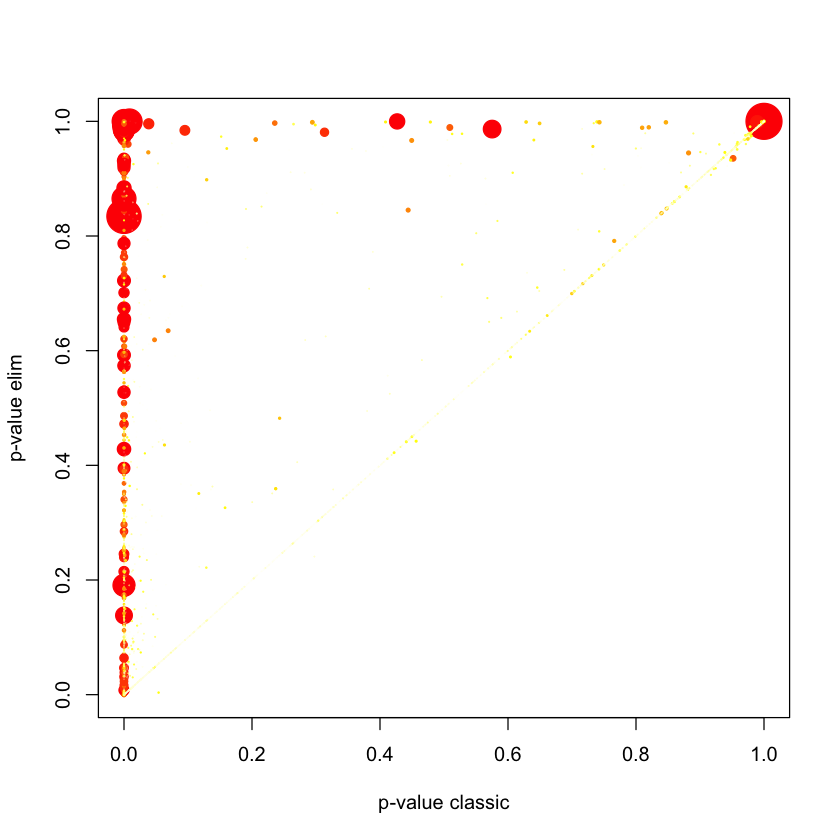

In [131]:
pValue.classic <- score(resultKS)
pValue.elim <- score(resultKS.elim)[names(pValue.classic)]
gstat <- termStat(go_data, names(pValue.classic))

gSize <- gstat$Annotated / max(gstat$Annotated) * 4
gCol <- colMap(gstat$Significant)
plot(pValue.classic, pValue.elim, xlab = "p-value classic", ylab = "p-value elim",
    pch = 19, cex = gSize, col = gCol)

In [132]:
tiff("erythroblast.tiff", width = 6, height = 6, units = 'in', res = 500)
showSigOfNodes(go_data, score(resultKS.elim), firstSigNodes = 5, useInfo = 'all')
dev.off()

$dag
A graphNEL graph with directed edges
Number of Nodes = 65 
Number of Edges = 103 

$complete.dag
[1] "A graph with 65 nodes."


pdf 
  2

### iPS Cells

In [133]:
genes <- rownames(res_ips_ord)
p_values <- res_ips_ord$pvalue
names(p_values) <- genes

p_values[p_values == 0] <- NA
p_values <- p_values[complete.cases(p_values)]

allGO2genes <- annFUN.org(whichOnto = "BP", feasibleGenes = NULL, mapping = "org.Hs.eg.db", ID = "symbol")
go_data <- new("topGOdata", ontology = "BP", allGenes = p_values, annot = annFUN.GO2genes, GO2genes = allGO2genes,
               geneSel = topDiffGenes, nodeSize = 10)


Building most specific GOs .....

	( 12198 GO terms found. )


Build GO DAG topology ..........

	( 15816 GO terms and 36033 relations. )


Annotating nodes ...............

	( 15408 genes annotated to the GO terms. )



In [134]:
resultFisher <- runTest(go_data, algorithm = "classic", statistic = "fisher")
resultKS <- runTest(go_data, algorithm = "classic", statistic = "ks")
resultKS.elim <- runTest(go_data, algorithm = "elim", statistic = "ks")


			 -- Classic Algorithm -- 

		 the algorithm is scoring 6130 nontrivial nodes
		 parameters: 
			 test statistic: fisher


			 -- Classic Algorithm -- 

		 the algorithm is scoring 6625 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 score order: increasing


			 -- Elim Algorithm -- 

		 the algorithm is scoring 6625 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 cutOff: 0.01
			 score order: increasing


	 Level 19:	1 nodes to be scored	(0 eliminated genes)


	 Level 18:	6 nodes to be scored	(0 eliminated genes)


	 Level 17:	11 nodes to be scored	(0 eliminated genes)


	 Level 16:	20 nodes to be scored	(0 eliminated genes)


	 Level 15:	47 nodes to be scored	(71 eliminated genes)


	 Level 14:	110 nodes to be scored	(180 eliminated genes)


	 Level 13:	166 nodes to be scored	(571 eliminated genes)


	 Level 12:	280 nodes to be scored	(2676 eliminated genes)


	 Level 11:	545 nodes to be scored	(4482 eliminated genes)


	 Level 10:	820 nodes to be scored	(

In [135]:
results <- GenTable(go_data, classicFisher = resultFisher, 
                    classicKS = resultKS, elimKS = resultKS.elim, orderBy = "elimKS", 
                    ranksOf = "classicFisher", topNodes = 10)
results

GO.ID      Term                                        Annotated Significant
1  GO:0002181 cytoplasmic translation                      133       96        
2  GO:0051301 cell division                                575      102        
3  GO:0006364 rRNA processing                              215       42        
4  GO:0032981 mitochondrial respiratory chain complex ...   51       29        
5  GO:0006120 mitochondrial electron transport, NADH t...   43       28        
6  GO:0045892 negative regulation of transcription, DN... 1161      177        
7  GO:0006281 DNA repair                                   495       61        
8  GO:0043161 proteasome-mediated ubiquitin-dependent ...  403       80        
9  GO:0050821 protein stabilization                        175       52        
10 GO:0006457 protein folding                              189       59        
   Expected Rank in classicFisher classicFisher classicKS elimKS 
1   14.36      2                  < 1e-30       < 1e-30   < 1e-30
2   62.10    289                  2.5e-07       < 1e-30   1.8e-25
3   23.22    576                  9.9e-05       1.6e-27   3.5e-16
4    5.51     82                  1.1e-15       4.1e-16   4.1e-16
5    4.64     68                  2.1e-17       1.3e-15   1.3e-15
6  125.38    326                  7.9e-07       5.1e-17   1.4e-13
7   53.46   2542                  0.15          1.7e-19   1.6e-11
8   43.52    254                  4.3e-08       2.9e-25   8.1e-11
9   18.90    125                  4.7e-12       8.5e-11   8.5e-11
10  20.41     93                  1.5e-14       4.4e-21   9.6e-11

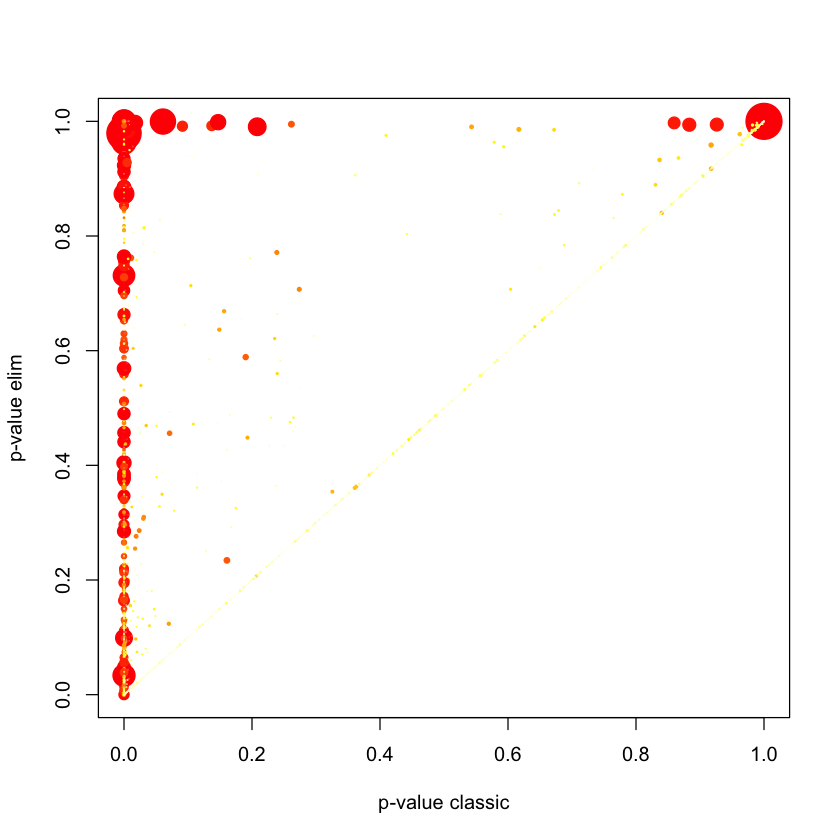

In [136]:
pValue.classic <- score(resultKS)
pValue.elim <- score(resultKS.elim)[names(pValue.classic)]
gstat <- termStat(go_data, names(pValue.classic))

gSize <- gstat$Annotated / max(gstat$Annotated) * 4
gCol <- colMap(gstat$Significant)
plot(pValue.classic, pValue.elim, xlab = "p-value classic", ylab = "p-value elim",
    pch = 19, cex = gSize, col = gCol)

In [137]:
tiff("ips_cells.tiff", width = 6, height = 6, units = 'in', res = 500)
showSigOfNodes(go_data, score(resultKS.elim), firstSigNodes = 5, useInfo = 'all')
dev.off()

$dag
A graphNEL graph with directed edges
Number of Nodes = 65 
Number of Edges = 104 

$complete.dag
[1] "A graph with 65 nodes."


pdf 
  2

### Neuroepithelial Cells

In [138]:
genes <- rownames(res_neuroepithelial_ord)
p_values <- res_neuroepithelial_ord$pvalue
names(p_values) <- genes

p_values[p_values == 0] <- NA
p_values <- p_values[complete.cases(p_values)]

allGO2genes <- annFUN.org(whichOnto = "BP", feasibleGenes = NULL, mapping = "org.Hs.eg.db", ID = "symbol")
go_data <- new("topGOdata", ontology = "BP", allGenes = p_values, annot = annFUN.GO2genes, GO2genes = allGO2genes,
               geneSel = topDiffGenes, nodeSize = 10)


Building most specific GOs .....

	( 12198 GO terms found. )


Build GO DAG topology ..........

	( 15815 GO terms and 36029 relations. )


Annotating nodes ...............

	( 15429 genes annotated to the GO terms. )



In [139]:
resultFisher <- runTest(go_data, algorithm = "classic", statistic = "fisher")
resultKS <- runTest(go_data, algorithm = "classic", statistic = "ks")
resultKS.elim <- runTest(go_data, algorithm = "elim", statistic = "ks")


			 -- Classic Algorithm -- 

		 the algorithm is scoring 5594 nontrivial nodes
		 parameters: 
			 test statistic: fisher


			 -- Classic Algorithm -- 

		 the algorithm is scoring 6627 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 score order: increasing


			 -- Elim Algorithm -- 

		 the algorithm is scoring 6627 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 cutOff: 0.01
			 score order: increasing


	 Level 19:	1 nodes to be scored	(0 eliminated genes)


	 Level 18:	6 nodes to be scored	(0 eliminated genes)


	 Level 17:	11 nodes to be scored	(0 eliminated genes)


	 Level 16:	20 nodes to be scored	(0 eliminated genes)


	 Level 15:	47 nodes to be scored	(89 eliminated genes)


	 Level 14:	110 nodes to be scored	(221 eliminated genes)


	 Level 13:	165 nodes to be scored	(733 eliminated genes)


	 Level 12:	279 nodes to be scored	(2852 eliminated genes)


	 Level 11:	547 nodes to be scored	(4465 eliminated genes)


	 Level 10:	822 nodes to be scored	(

In [140]:
results <- GenTable(go_data, classicFisher = resultFisher, 
                    classicKS = resultKS, elimKS = resultKS.elim, orderBy = "elimKS", 
                    ranksOf = "classicFisher", topNodes = 10)
results

GO.ID      Term                                        Annotated Significant
1  GO:0002181 cytoplasmic translation                     140       93         
2  GO:0006120 mitochondrial electron transport, NADH t...  43       29         
3  GO:0051301 cell division                               576       74         
4  GO:0032981 mitochondrial respiratory chain complex ...  51       30         
5  GO:0000398 mRNA splicing, via spliceosome              280       69         
6  GO:0006364 rRNA processing                             216       39         
7  GO:0050821 protein stabilization                       176       34         
8  GO:0000122 negative regulation of transcription by ... 864       67         
9  GO:0043161 proteasome-mediated ubiquitin-dependent ... 403       41         
10 GO:0042776 mitochondrial ATP synthesis coupled prot...  14       13         
   Expected Rank in classicFisher classicFisher classicKS elimKS 
1  10.40       2                  < 1e-30       < 1e-30   < 1e-30
2   3.19      25                  3.7e-23       5.8e-21   5.8e-21
3  42.78     155                  2.3e-06       1.2e-27   2.2e-19
4   3.79      29                  2.3e-21       1.8e-18   1.8e-18
5  20.80      35                  2.0e-19       < 1e-30   7.9e-14
6  16.04     108                  1.8e-07       2.3e-23   1.5e-13
7  13.07     111                  2.1e-07       3.9e-13   3.9e-13
8  64.17    2492                  0.372         1.1e-11   1.2e-10
9  29.93     790                  0.025         1.1e-23   1.4e-10
10  1.04      51                  2.6e-14       1.8e-10   1.8e-10

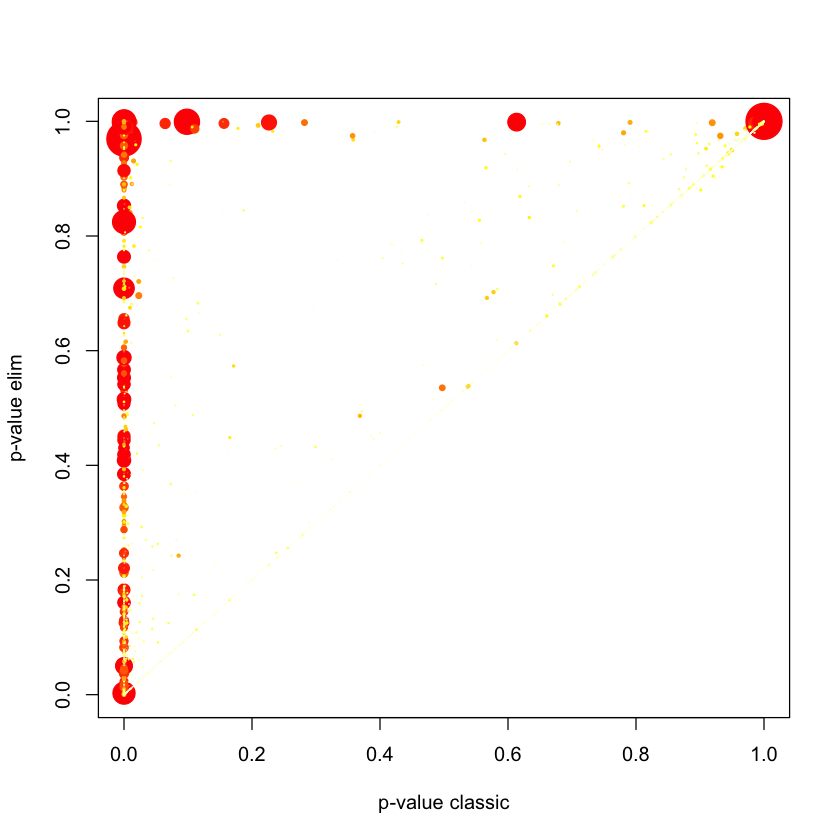

In [141]:
pValue.classic <- score(resultKS)
pValue.elim <- score(resultKS.elim)[names(pValue.classic)]
gstat <- termStat(go_data, names(pValue.classic))

gSize <- gstat$Annotated / max(gstat$Annotated) * 4
gCol <- colMap(gstat$Significant)
plot(pValue.classic, pValue.elim, xlab = "p-value classic", ylab = "p-value elim",
    pch = 19, cex = gSize, col = gCol)

In [142]:
tiff("neuroepithelial_cells.tiff", width = 6, height = 6, units = 'in', res = 500)
showSigOfNodes(go_data, score(resultKS.elim), firstSigNodes = 5, useInfo = 'all')
dev.off()

$dag
A graphNEL graph with directed edges
Number of Nodes = 65 
Number of Edges = 103 

$complete.dag
[1] "A graph with 65 nodes."


pdf 
  2

### Neurons

In [143]:
genes <- rownames(res_neurons_ord)
p_values <- res_neurons_ord$pvalue
names(p_values) <- genes

p_values[p_values == 0] <- NA
p_values <- p_values[complete.cases(p_values)]

allGO2genes <- annFUN.org(whichOnto = "BP", feasibleGenes = NULL, mapping = "org.Hs.eg.db", ID = "symbol")
go_data <- new("topGOdata", ontology = "BP", allGenes = p_values, annot = annFUN.GO2genes, GO2genes = allGO2genes,
               geneSel = topDiffGenes, nodeSize = 10)


Building most specific GOs .....

	( 12195 GO terms found. )


Build GO DAG topology ..........

	( 15811 GO terms and 36015 relations. )


Annotating nodes ...............

	( 15409 genes annotated to the GO terms. )



In [144]:
resultFisher <- runTest(go_data, algorithm = "classic", statistic = "fisher")
resultKS <- runTest(go_data, algorithm = "classic", statistic = "ks")
resultKS.elim <- runTest(go_data, algorithm = "elim", statistic = "ks")


			 -- Classic Algorithm -- 

		 the algorithm is scoring 6078 nontrivial nodes
		 parameters: 
			 test statistic: fisher


			 -- Classic Algorithm -- 

		 the algorithm is scoring 6624 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 score order: increasing


			 -- Elim Algorithm -- 

		 the algorithm is scoring 6624 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 cutOff: 0.01
			 score order: increasing


	 Level 19:	1 nodes to be scored	(0 eliminated genes)


	 Level 18:	6 nodes to be scored	(0 eliminated genes)


	 Level 17:	11 nodes to be scored	(0 eliminated genes)


	 Level 16:	20 nodes to be scored	(0 eliminated genes)


	 Level 15:	47 nodes to be scored	(134 eliminated genes)


	 Level 14:	110 nodes to be scored	(321 eliminated genes)


	 Level 13:	166 nodes to be scored	(789 eliminated genes)


	 Level 12:	280 nodes to be scored	(2839 eliminated genes)


	 Level 11:	543 nodes to be scored	(4494 eliminated genes)


	 Level 10:	823 nodes to be scored	

In [145]:
results <- GenTable(go_data, classicFisher = resultFisher, 
                    classicKS = resultKS, elimKS = resultKS.elim, orderBy = "elimKS", 
                    ranksOf = "classicFisher", topNodes = 10)
results

GO.ID      Term                                        Annotated Significant
1  GO:0002181 cytoplasmic translation                     133        94        
2  GO:0043161 proteasome-mediated ubiquitin-dependent ... 402        69        
3  GO:0006120 mitochondrial electron transport, NADH t...  43        27        
4  GO:0000122 negative regulation of transcription by ... 861       157        
5  GO:0000398 mRNA splicing, via spliceosome              280       111        
6  GO:0051301 cell division                               574       103        
7  GO:0032981 mitochondrial respiratory chain complex ...  51        25        
8  GO:0001764 neuron migration                            150        53        
9  GO:0006886 intracellular protein transport             847       130        
10 GO:0008380 RNA splicing                                390       139        
   Expected Rank in classicFisher classicFisher classicKS elimKS 
1   16.43     1                   < 1e-30       < 1e-30   < 1e-30
2   49.65   701                   0.0027        2.4e-24   1.7e-14
3    5.31   111                   9.1e-15       2.5e-14   2.5e-14
4  106.33   248                   1.9e-07       5.9e-15   3.1e-14
5   34.58    11                   < 1e-30       < 1e-30   3.4e-12
6   70.89   416                   5.0e-05       5.6e-16   3.7e-12
7    6.30   159                   1.7e-10       5.8e-11   5.8e-11
8   18.52   126                   2.6e-13       1.3e-13   1.3e-10
9  104.60   770                   0.0046        3.3e-26   2.2e-10
10  48.16     5                   < 1e-30       < 1e-30   3.6e-10

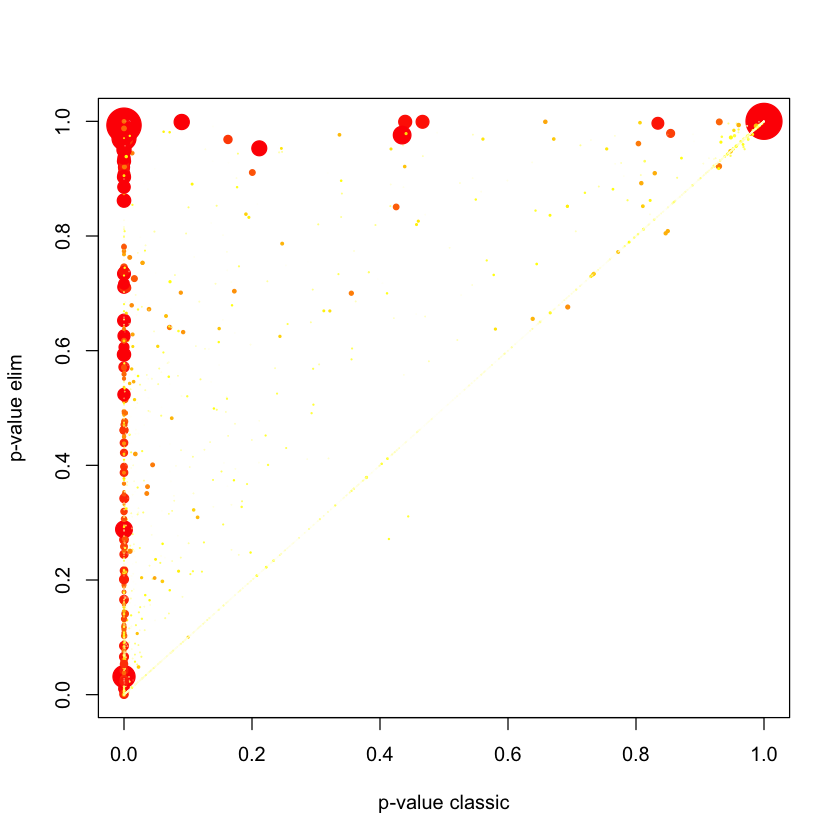

In [146]:
pValue.classic <- score(resultKS)
pValue.elim <- score(resultKS.elim)[names(pValue.classic)]
gstat <- termStat(go_data, names(pValue.classic))

gSize <- gstat$Annotated / max(gstat$Annotated) * 4
gCol <- colMap(gstat$Significant)
plot(pValue.classic, pValue.elim, xlab = "p-value classic", ylab = "p-value elim",
    pch = 19, cex = gSize, col = gCol)

In [147]:
tiff("neurons.tiff", width = 6, height = 6, units = 'in', res = 500)
showSigOfNodes(go_data, score(resultKS.elim), firstSigNodes = 5, useInfo = 'all')
dev.off()

$dag
A graphNEL graph with directed edges
Number of Nodes = 110 
Number of Edges = 238 

$complete.dag
[1] "A graph with 110 nodes."


pdf 
  2

### T Cells

In [148]:
genes <- rownames(res_t_ord)
p_values <- res_t_ord$pvalue
names(p_values) <- genes

p_values[p_values == 0] <- NA
p_values <- p_values[complete.cases(p_values)]

allGO2genes <- annFUN.org(whichOnto = "BP", feasibleGenes = NULL, mapping = "org.Hs.eg.db", ID = "symbol")
go_data <- new("topGOdata", ontology = "BP", allGenes = p_values, annot = annFUN.GO2genes, GO2genes = allGO2genes,
               geneSel = topDiffGenes, nodeSize = 10)


Building most specific GOs .....

	( 12196 GO terms found. )


Build GO DAG topology ..........

	( 15814 GO terms and 36028 relations. )


Annotating nodes ...............

	( 15415 genes annotated to the GO terms. )



In [149]:
resultFisher <- runTest(go_data, algorithm = "classic", statistic = "fisher")
resultKS <- runTest(go_data, algorithm = "classic", statistic = "ks")
resultKS.elim <- runTest(go_data, algorithm = "elim", statistic = "ks")


			 -- Classic Algorithm -- 

		 the algorithm is scoring 5906 nontrivial nodes
		 parameters: 
			 test statistic: fisher


			 -- Classic Algorithm -- 

		 the algorithm is scoring 6627 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 score order: increasing


			 -- Elim Algorithm -- 

		 the algorithm is scoring 6627 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 cutOff: 0.01
			 score order: increasing


	 Level 19:	1 nodes to be scored	(0 eliminated genes)


	 Level 18:	6 nodes to be scored	(0 eliminated genes)


	 Level 17:	11 nodes to be scored	(0 eliminated genes)


	 Level 16:	20 nodes to be scored	(0 eliminated genes)


	 Level 15:	47 nodes to be scored	(71 eliminated genes)


	 Level 14:	110 nodes to be scored	(151 eliminated genes)


	 Level 13:	166 nodes to be scored	(724 eliminated genes)


	 Level 12:	279 nodes to be scored	(2873 eliminated genes)


	 Level 11:	545 nodes to be scored	(4546 eliminated genes)


	 Level 10:	822 nodes to be scored	(

In [150]:
results <- GenTable(go_data, classicFisher = resultFisher, 
                    classicKS = resultKS, elimKS = resultKS.elim, orderBy = "elimKS", 
                    ranksOf = "classicFisher", topNodes = 10)
results

GO.ID      Term                                        Annotated Significant
1  GO:0002181 cytoplasmic translation                      128       96        
2  GO:0051301 cell division                                574      121        
3  GO:0006120 mitochondrial electron transport, NADH t...   43       32        
4  GO:0032981 mitochondrial respiratory chain complex ...   51       34        
5  GO:0006412 translation                                  594      232        
6  GO:0006364 rRNA processing                              213       75        
7  GO:0000398 mRNA splicing, via spliceosome               280       98        
8  GO:0045892 negative regulation of transcription, DN... 1166      152        
9  GO:0006457 protein folding                              188       68        
10 GO:0051028 mRNA transport                               123       21        
   Expected Rank in classicFisher classicFisher classicKS elimKS 
1   13.73     4                   < 1e-30       < 1e-30   < 1e-30
2   61.55    76                   1.1e-13       < 1e-30   3.9e-29
3    4.61    38                   1.3e-22       2.3e-19   2.3e-19
4    5.47    46                   1.9e-21       1.1e-17   1.1e-17
5   63.70     1                   < 1e-30       < 1e-30   3.4e-16
6   22.84    42                   8.8e-22       < 1e-30   1.1e-15
7   30.03    30                   7.1e-28       < 1e-30   4.8e-13
8  125.03   638                   0.0054        1.1e-18   8.8e-13
9   20.16    51                   1.3e-20       1.1e-19   6.2e-12
10  13.19   902                   0.0210        4.4e-15   2.5e-11

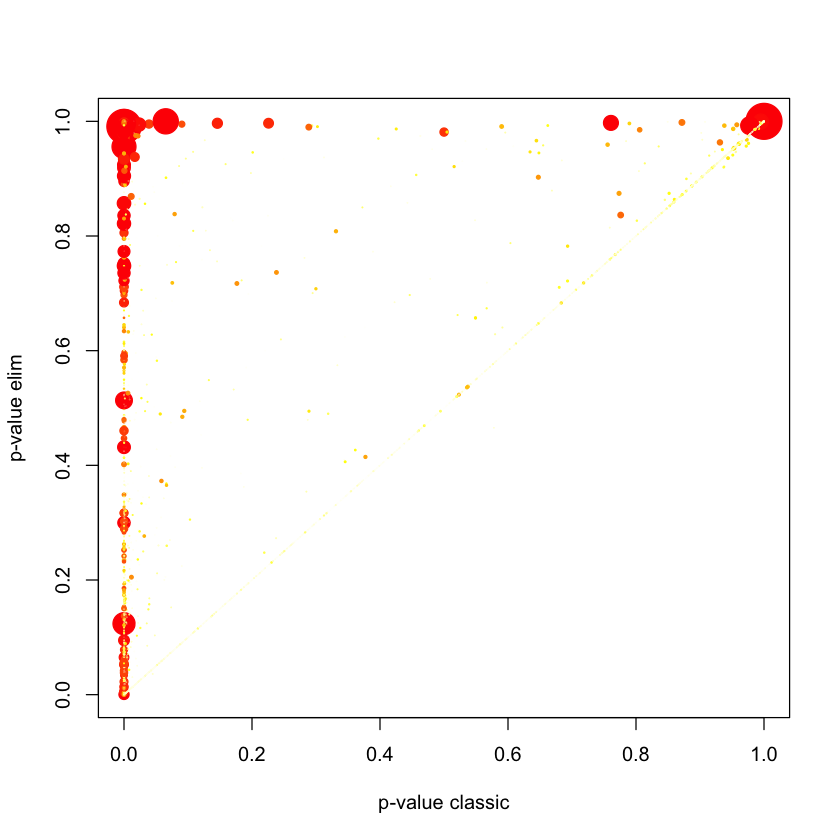

In [151]:
pValue.classic <- score(resultKS)
pValue.elim <- score(resultKS.elim)[names(pValue.classic)]
gstat <- termStat(go_data, names(pValue.classic))

gSize <- gstat$Annotated / max(gstat$Annotated) * 4
gCol <- colMap(gstat$Significant)
plot(pValue.classic, pValue.elim, xlab = "p-value classic", ylab = "p-value elim",
    pch = 19, cex = gSize, col = gCol)

In [152]:
tiff("t_cells.tiff", width = 6, height = 6, units = 'in', res = 500)
showSigOfNodes(go_data, score(resultKS.elim), firstSigNodes = 5, useInfo = 'all')
dev.off()

$dag
A graphNEL graph with directed edges
Number of Nodes = 52 
Number of Edges = 82 

$complete.dag
[1] "A graph with 52 nodes."


pdf 
  2